# Project LELEC

## Recode features and Data set

In [2]:
pip install litereval

Note: you may need to restart the kernel to use updated packages.


In [3]:
import statistics
import numpy as np
import scipy.stats
import statsmodels.api as sm
from scipy.stats import shapiro
import pandas as pd
import jupyterthemes as jt
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import defaultdict
from matplotlib.cm import ScalarMappable
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import GammaRegressor
from sklearn._loss.glm_distribution import (
    TweedieDistribution,
    NormalDistribution, PoissonDistribution,
    GammaDistribution, InverseGaussianDistribution,
)
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from yellowbrick.regressor import cooks_distance
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')

C:\Users\desktop\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [4]:
X1 = pd.read_csv('X1.csv')
Y1 = pd.read_csv('Y1.csv', header=None, names=['revenue'])
data = X1.assign(Revenue = Y1.values)
del data['is_adult']
data = data.replace(r'\N', np.nan).dropna().reset_index(drop=True)
data.runtime = data.runtime.astype(int)
data["genres"]= data["genres"].str.split(",")
data.runtime = data.runtime.astype(int)
data["Time"] = (data.release_year+1) - data.production_year
data

Unnamed: 0                                     title  \
0           2512                             Doc Hollywood   
1           5795                            Ballets Russes   
2             38  Cirque du Freak: The Vampire's Assistant   
3           8056                                  Deadfall   
4           6753                                 They Live   
...          ...                                       ...   
3623         668                      Flags of Our Fathers   
3624         223                             Office Killer   
3625        4459                        He Was a Quiet Man   
3626        1517                   Dr. Jekyll and Ms. Hyde   
3627        5439                              Factory Girl   

                                                img_url  \
0     https://m.media-amazon.com/images/M/MV5BNTcwMj...   
1     https://m.media-amazon.com/images/M/MV5BMTIyND...   
2     https://m.media-amazon.com/images/M/MV5BMTI1ND...   
3     https://m.media-amazon.com/images/M/MV5BMTg2OD...   
4     https://m.media-amazon.com/images/M/MV5BMTQ3Mj...   
...                                                 ...   
3623  https://m.media-amazon.com/images/M/MV5BMTU2Mj...   
3624  https://m.media-amazon.com/images/M/MV5BNDg2NT...   
3625  https://m.media-amazon.com/images/M/MV5BMTUzMT...   
3626  https://m.media-amazon.com/images/M/MV5BMDc3Y2...   
3627  https://m.media-amazon.com/images/M/MV5BYTQ5ZT...   

                                            description  ratings   n_votes  \
0     Doc Hollywood: Directed by Michael Caton-Jones...      6.2   33519.0   
1     Ballets Russes: Directed by Daniel Geller, Day...      7.7     647.0   
2     Cirque du Freak: The Vampire's Assistant: Dire...      5.8   43497.0   
3     Deadfall: Directed by Jerry Hopper. With Van J...      7.7      16.0   
4     They Live: Directed by John Carpenter. With Ro...      7.3  111600.0   
...                                                 ...      ...       ...   
3623  Flags of Our Fathers: Directed by Clint Eastwo...      7.1  118129.0   
3624  Office Killer: Directed by Cindy Sherman. With...      5.1    1938.0   
3625  He Was a Quiet Man: Directed by Frank A. Cappe...      6.8   22004.0   
3626  Dr. Jekyll and Ms. Hyde: Directed by David Pri...      4.5    2653.0   
3627  Factory Girl: Directed by George Hickenlooper....      6.5   20789.0   

      production_year  runtime                         genres  release_year  \
0                1991      104       [Comedy, Drama, Romance]        1991.0   
1                2005      118  [Documentary, History, Music]        2005.0   
2                2009      119   [Action, Adventure, Fantasy]        2009.0   
3                1959       30                      [Western]        1993.0   
4                1988       94       [Action, Horror, Sci-Fi]        1988.0   
...               ...      ...                            ...           ...   
3623             2006      135     [Action, Adventure, Drama]        2006.0   
3624             1997       82        [Comedy, Crime, Horror]        1997.0   
3625             2007      100     [Drama, Romance, Thriller]        2007.0   
3626             1995      100      [Comedy, Romance, Sci-Fi]        1995.0   
3627             2006      100             [Biography, Drama]        2006.0   

      studio                                     img_embeddings  \
0         WB  [0.47755364, 0.8723433, 1.2153144, 0.3793078, ...   
1      Zeit.  [0.26525393, 2.4802532, 0.84571683, 0.21649377...   
2       Uni.  [0.06563655, 1.2579643, 0.25442713, 0.3307045,...   
3      Trim.  [0.23510928, 4.0279293, 0.6071904, 0.2641873, ...   
4       Uni.  [0.47165212, 1.9936308, 1.0524175, 0.4242929, ...   
...      ...                                                ...   
3623    P/DW  [0.25949064, 0.68048173, 0.008968297, 0.816912...   
3624  Strand  [0.3261535, 1.4046001, 0.28850305, 0.13665438,...   
3625  Mitro.  [0.37281433, 1.357696, 1.0473248, 0.39829102, ...

In [5]:
def compute_rmse(predict, target):
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)

## Description statistics

In [6]:
data.describe().round(1)

Unnamed: 0  ratings    n_votes  production_year  runtime  release_year  \
count      3628.0   3628.0     3628.0           3628.0   3628.0        3628.0   
mean       4532.3      6.5    24979.0           1997.6     88.3        2000.1   
std        2623.2      1.2   104423.9             11.9     37.8          10.1   
min           1.0      1.9        5.0           1916.0      2.0        1921.0   
25%        2261.2      5.8      162.0           1993.0     78.0        1994.0   
50%        4570.0      6.5     1335.0           2001.0     93.0        2002.0   
75%        6755.5      7.3     9057.2           2006.0    105.0        2007.0   
max        9152.0      9.9  2369294.0           2021.0    566.0        2018.0   

           Revenue    Time  
count       3628.0  3628.0  
mean    27574554.2     3.4  
std     66829224.2    12.4  
min          130.4   -75.0  
25%        48795.2     1.0  
50%       671926.6     1.0  
75%     24585756.1     2.0  
max    820701278.5    96.0

## Plots

In [7]:
from ast import literal_eval
array = []
text = pd.DataFrame(data["text_embeddings"])
for i in range(3628):
    array.append(literal_eval(text["text_embeddings"].iloc[i]))
array = np.array(array)

[0.69452159 0.10615464 0.03474217]
[174.53640255  68.23585383  39.03656612]


C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory lea

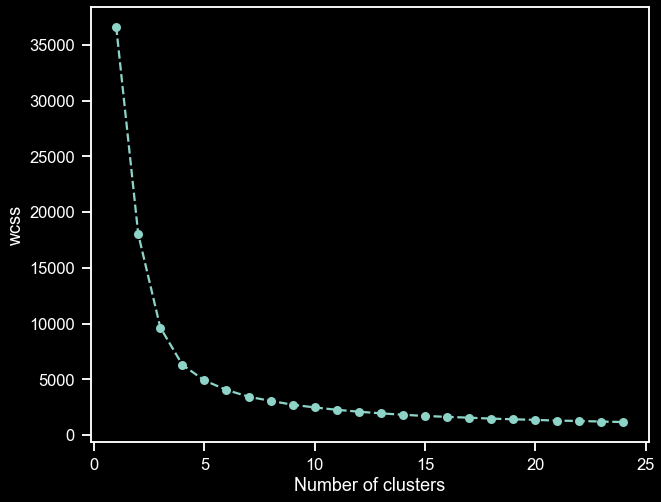

C:\Users\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca =PCA(n_components=3).fit(array)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
text = pca.transform(array)
wcss = []
for i in range(1,25):
    kmean_pca = KMeans(n_clusters =i, init = 'k-means++', random_state=42)
    kmean_pca.fit(text)
    wcss.append(kmean_pca.inertia_)
plt.figure(figsize = (10,8))
plt.plot(range(1,25), wcss, marker = "o",linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()
kmean_pca = KMeans(n_clusters =4, init = 'k-means++', random_state=42)
kmean_pca.fit(text)

In [9]:
data_embedding = pd.concat([data, pd.DataFrame(text)], axis =1)
data_embedding.columns.values[-3: ,] = ["Comp1_txt", "Comp2_txt", "Comp3_txt"]
data_embedding["cluster_txt"] = kmean_pca.labels_
data_embedding["segment"] = data_embedding["cluster_txt"].map({0:'first', 1:'second',2:'third',3:'fourth'})
data_embedding

Unnamed: 0                                     title  \
0           2512                             Doc Hollywood   
1           5795                            Ballets Russes   
2             38  Cirque du Freak: The Vampire's Assistant   
3           8056                                  Deadfall   
4           6753                                 They Live   
...          ...                                       ...   
3623         668                      Flags of Our Fathers   
3624         223                             Office Killer   
3625        4459                        He Was a Quiet Man   
3626        1517                   Dr. Jekyll and Ms. Hyde   
3627        5439                              Factory Girl   

                                                img_url  \
0     https://m.media-amazon.com/images/M/MV5BNTcwMj...   
1     https://m.media-amazon.com/images/M/MV5BMTIyND...   
2     https://m.media-amazon.com/images/M/MV5BMTI1ND...   
3     https://m.media-amazon.com/images/M/MV5BMTg2OD...   
4     https://m.media-amazon.com/images/M/MV5BMTQ3Mj...   
...                                                 ...   
3623  https://m.media-amazon.com/images/M/MV5BMTU2Mj...   
3624  https://m.media-amazon.com/images/M/MV5BNDg2NT...   
3625  https://m.media-amazon.com/images/M/MV5BMTUzMT...   
3626  https://m.media-amazon.com/images/M/MV5BMDc3Y2...   
3627  https://m.media-amazon.com/images/M/MV5BYTQ5ZT...   

                                            description  ratings   n_votes  \
0     Doc Hollywood: Directed by Michael Caton-Jones...      6.2   33519.0   
1     Ballets Russes: Directed by Daniel Geller, Day...      7.7     647.0   
2     Cirque du Freak: The Vampire's Assistant: Dire...      5.8   43497.0   
3     Deadfall: Directed by Jerry Hopper. With Van J...      7.7      16.0   
4     They Live: Directed by John Carpenter. With Ro...      7.3  111600.0   
...                                                 ...      ...       ...   
3623  Flags of Our Fathers: Directed by Clint Eastwo...      7.1  118129.0   
3624  Office Killer: Directed by Cindy Sherman. With...      5.1    1938.0   
3625  He Was a Quiet Man: Directed by Frank A. Cappe...      6.8   22004.0   
3626  Dr. Jekyll and Ms. Hyde: Directed by David Pri...      4.5    2653.0   
3627  Factory Girl: Directed by George Hickenlooper....      6.5   20789.0   

      production_year  runtime                         genres  release_year  \
0                1991      104       [Comedy, Drama, Romance]        1991.0   
1                2005      118  [Documentary, History, Music]        2005.0   
2                2009      119   [Action, Adventure, Fantasy]        2009.0   
3                1959       30                      [Western]        1993.0   
4                1988       94       [Action, Horror, Sci-Fi]        1988.0   
...               ...      ...                            ...           ...   
3623             2006      135     [Action, Adventure, Drama]        2006.0   
3624             1997       82        [Comedy, Crime, Horror]        1997.0   
3625             2007      100     [Drama, Romance, Thriller]        2007.0   
3626             1995      100      [Comedy, Romance, Sci-Fi]        1995.0   
3627             2006      100             [Biography, Drama]        2006.0   

      studio                                     img_embeddings  \
0         WB  [0.47755364, 0.8723433, 1.2153144, 0.3793078, ...   
1      Zeit.  [0.26525393, 2.4802532, 0.84571683, 0.21649377...   
2       Uni.  [0.06563655, 1.2579643, 0.25442713, 0.3307045,...   
3      Trim.  [0.23510928, 4.0279293, 0.6071904, 0.2641873, ...   
4       Uni.  [0.47165212, 1.9936308, 1.0524175, 0.4242929, ...   
...      ...                                                ...   
3623    P/DW  [0.25949064, 0.68048173, 0.008968297, 0.816912...   
3624  Strand  [0.3261535, 1.4046001, 0.28850305, 0.13665438,...   
3625  Mitro.  [0.37281433, 1.357696, 1.0473248, 0.39829102, ...

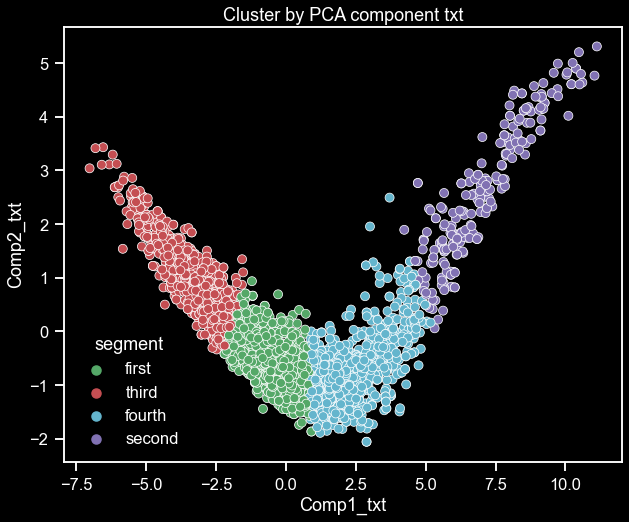

In [10]:
x_axis = data_embedding["Comp1_txt"]
y_axis = data_embedding["Comp2_txt"]
z_axis = data_embedding["Comp3_txt"]
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue =data_embedding["segment"], palette = ['g', 'r', 'c', 'm'])
plt.title("Cluster by PCA component txt")
plt.show()

Text(0.5, 0, 'Comp3')

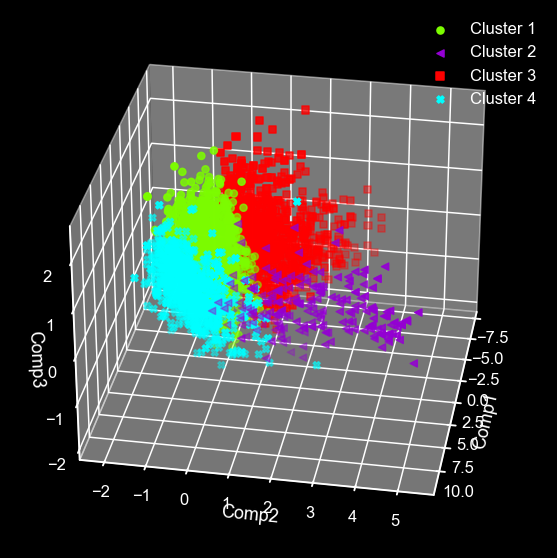

In [11]:
x1 = data_embedding[data_embedding['cluster_txt'] == 0]["Comp1_txt"]
y1 = data_embedding[data_embedding['cluster_txt'] == 0]["Comp2_txt"]
z1 = data_embedding[data_embedding['cluster_txt'] == 0]["Comp3_txt"]

x2 = data_embedding[data_embedding['cluster_txt'] == 1]["Comp1_txt"]
y2 = data_embedding[data_embedding['cluster_txt'] == 1]["Comp2_txt"]
z2 = data_embedding[data_embedding['cluster_txt'] == 1]["Comp3_txt"]

x3 = data_embedding[data_embedding['cluster_txt'] == 2]["Comp1_txt"]
y3 = data_embedding[data_embedding['cluster_txt'] == 2]["Comp2_txt"]
z3 = data_embedding[data_embedding['cluster_txt'] == 2]["Comp3_txt"]

x4 = data_embedding[data_embedding['cluster_txt'] == 3]["Comp1_txt"]
y4 = data_embedding[data_embedding['cluster_txt'] == 3]["Comp2_txt"]
z4 = data_embedding[data_embedding['cluster_txt'] == 3]["Comp3_txt"]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 10)

ax.scatter3D(x1, y1, z1, s=50, color='lawngreen', marker='o', label='Cluster 1')
ax.scatter3D(x2, y2, z2, s=50, color='darkviolet', marker='<', label='Cluster 2')
ax.scatter3D(x3, y3, z3, s=50, color='red', marker = "s", label='Cluster 3')
ax.scatter3D(x4, y4, z4, s=50, color='cyan', marker = "X", label='Cluster 4')
ax.legend(loc=1)
ax.set_xlabel('Comp1')
ax.set_ylabel('Comp2')
ax.set_zlabel('Comp3')

In [12]:
array = []
img = pd.DataFrame(data["img_embeddings"])
for i in range(3628):
    array.append(literal_eval(img["img_embeddings"].iloc[i]))
array = np.array(array)

In [13]:
standardized = StandardScaler().fit_transform(array)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1)

embs = tsne.fit_transform(standardized)

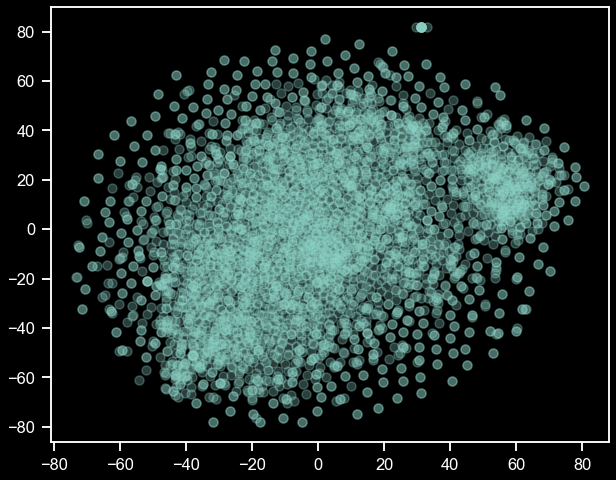

In [15]:
data_embedding['Dim1_img'] = embs[:, 0]
data_embedding['Dim2_img'] = embs[:, 1]
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)

ax.scatter(data_embedding.Dim1_img, data_embedding.Dim2_img, alpha=.3);

In [16]:
df = data_embedding



def plot_bg(bg_alpha=.01, figsize=(13, 9), emb_2d=None):
    """Create and return a plot of all our movie embeddings with very low opacity.
    (Intended to be used as a basis for further - more prominent - plotting of a 
    subset of movies. Having the overall shape of the map space in the background is
    useful for context.)
    """
    if emb_2d is None:
        emb_2d = embs
    fig, ax = plt.subplots(figsize=figsize)
    X = emb_2d[:, 0]
    Y = emb_2d[:, 1]
    ax.scatter(X, Y, alpha=bg_alpha)
    return ax

def annotate_sample(n, n_ratings_thresh=0):
    """Plot our embeddings with a random sample of n movies annotated.
    Only selects movies where the number of ratings is at least n_ratings_thresh.
    """
    sample = data_embedding[data_embedding.n_ratings >= n_ratings_thresh].sample(
        n, random_state=1)
    plot_with_annotations(sample.index)

def plot_by_title_pattern(pattern, **kwargs):
    """Plot all movies whose titles match the given regex pattern.
    """
    match = df[df.title.str.contains(pattern)]
    return plot_with_annotations(match.index, **kwargs)

def add_annotations(ax, label_indices, emb_2d=None, **kwargs):
    if emb_2d is None:
        emb_2d = embs
    X = emb_2d[label_indices, 0]
    Y = emb_2d[label_indices, 1]
    ax.scatter(X, Y, **kwargs)

def plot_with_annotations(label_indices, text=True, labels=None, alpha=1, **kwargs):
    ax = plot_bg(**kwargs)
    Xlabeled = embs[label_indices, 0]
    Ylabeled = embs[label_indices, 1]
    if labels is not None:
        for x, y, label in zip(Xlabeled, Ylabeled, labels):
            ax.scatter(x, y, alpha=alpha, label=label, marker='1',
                       s=90,
                      )
        fig.legend()
    else:
        ax.scatter(Xlabeled, Ylabeled, alpha=alpha, color='orange')
    
    if text:
        # TODO: Add abbreviated title column
        titles = data_embedding.loc[label_indices, 'title'].values
        texts = []
        for label, x, y in zip(titles, Xlabeled, Ylabeled):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, 
                    #expand_text=(1.01, 1.05),
                    arrowprops=dict(arrowstyle='->', color='red'),
                   )
    return ax

FS = (13, 9)
def plot_region(x0, x1, y0, y1, text=True):
    """Plot the region of the mapping space bounded by the given x and y limits.
    """
    fig, ax = plt.subplots(figsize=FS)
    pts = df[
        (df.x >= x0) & (df.x <= x1)
        & (df.y >= y0) & (df.y <= y1)
    ]
    ax.scatter(pts.x, pts.y, alpha=.6)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    if text:
        texts = []
        for label, x, y in zip(pts.title.values, pts.x.values, pts.y.values):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, expand_text=(1.01, 1.05))
    return ax

def plot_region_around(title, margin=5, **kwargs):
    """Plot the region of the mapping space in the neighbourhood of the the movie with
    the given title. The margin parameter controls the size of the neighbourhood around
    the movie.
    """
    xmargin = ymargin = margin
    match = df[df.title == title]
    assert len(match) == 1
    row = match.iloc[0]
    return plot_region(row.x-xmargin, row.x+xmargin, row.y-ymargin, row.y+ymargin, **kwargs)

<AxesSubplot:>

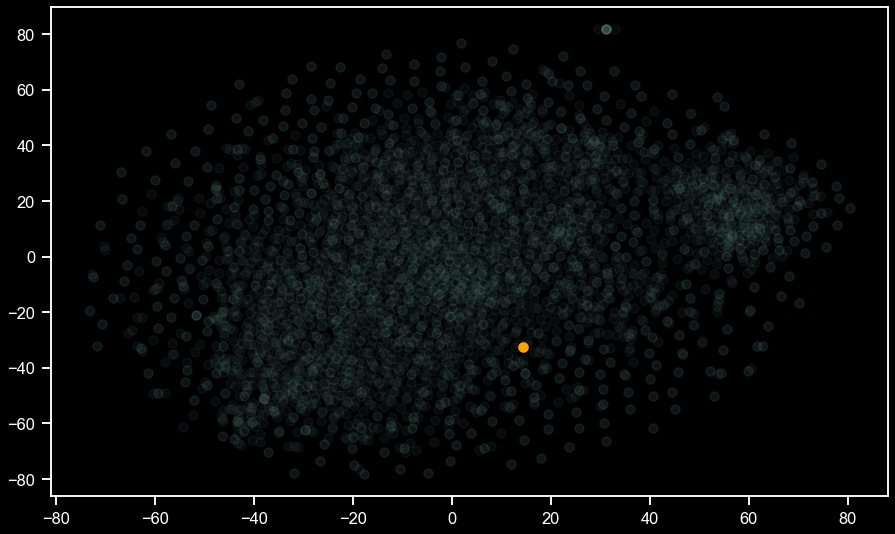

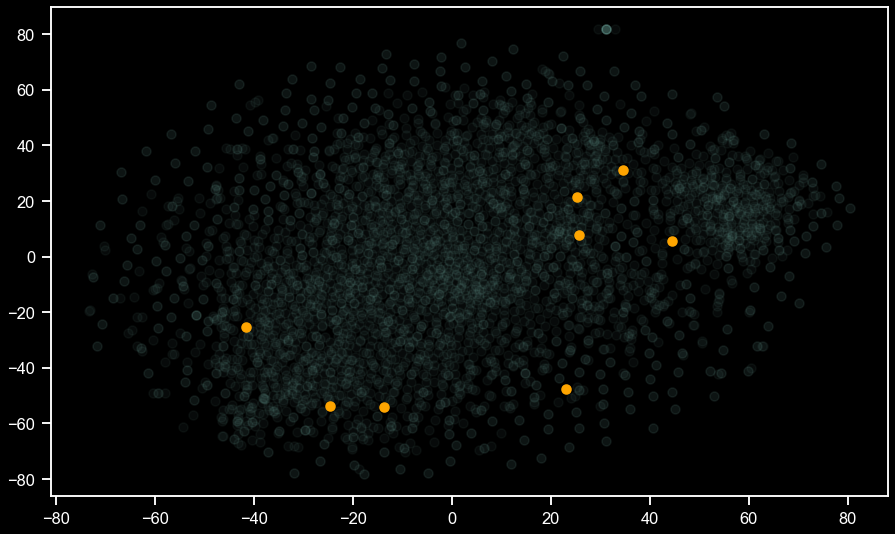

In [17]:
plot_by_title_pattern('Harry Potter', figsize=(15, 9), bg_alpha=.05, text=False)
plot_by_title_pattern('war', figsize=(15, 9), bg_alpha=.05, text=False)

In [18]:
df["genres"].loc[1].index

<function list.index(value, start=0, stop=9223372036854775807, /)>

<AxesSubplot:>

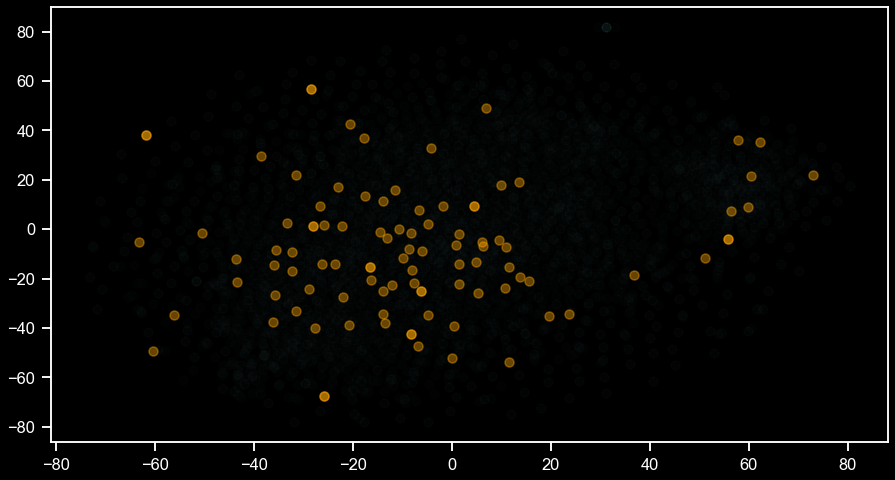

In [19]:
index = []
for  i in range(3628):
    if "History" in df["genres"].loc[i]:
        index.append(i)
plot_with_annotations(index, text=False, alpha=.4, figsize=(15, 8))

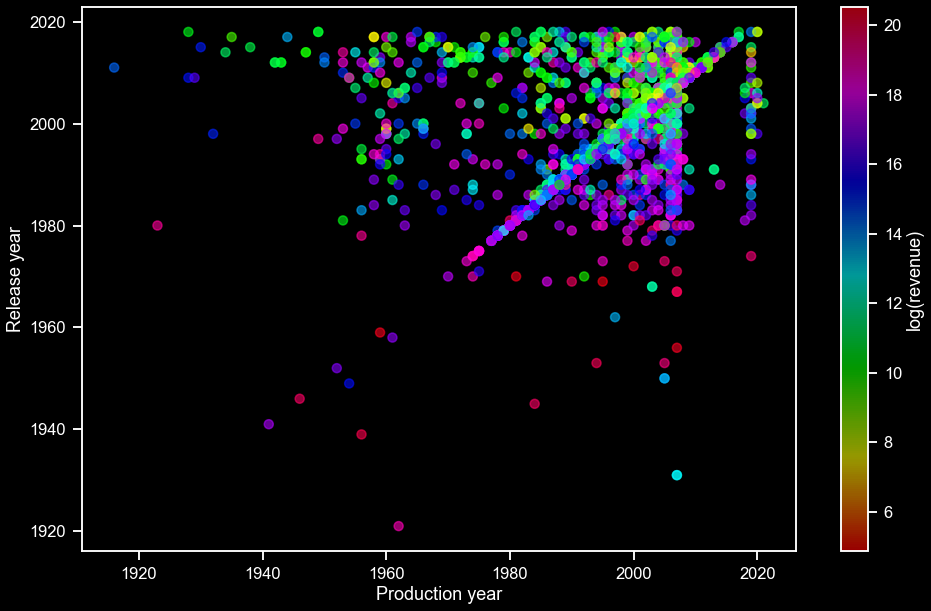

In [20]:
plt.figure(figsize=(16, 10))
Revenuel = np.log(data.Revenue)

plt.scatter(data.production_year,data.release_year, c = Revenuel, cmap='hsv', alpha = 0.6)
plt.colorbar(label = "log(revenue)")
plt.xlabel('Production year')
plt.ylabel('Release year')
plt.show()

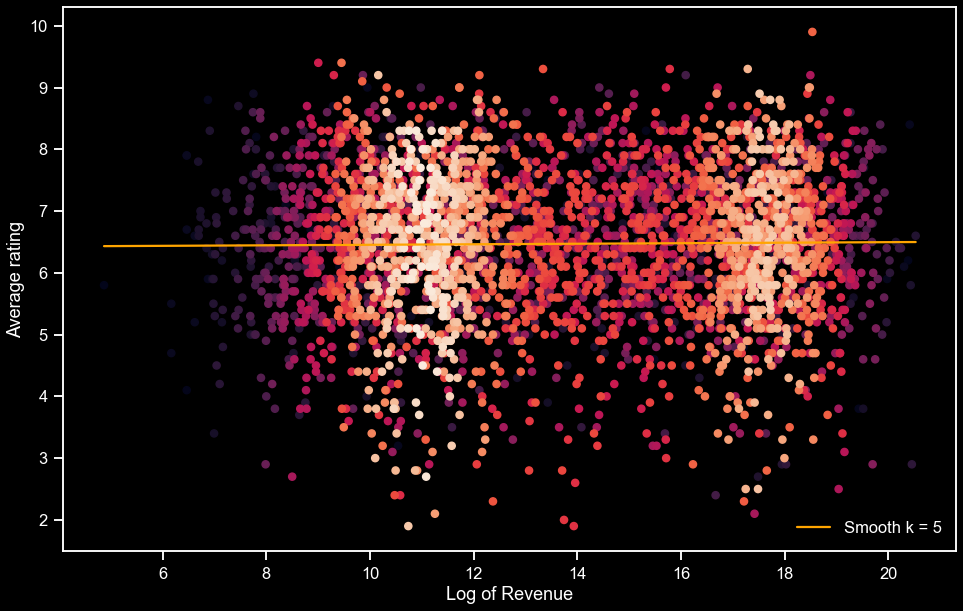

In [21]:
Revenuel = np.log(data.Revenue)

xy = np.vstack([data.ratings,Revenuel])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
data.ratings, Revenuel, z = data.ratings[idx], Revenuel[idx], z[idx]

sort_indexes  = sorted(range(len(Revenuel)), key=lambda k: Revenuel[k])
sorted_Revenuel = sorted(Revenuel)
    
coeff = np.polyfit(sorted_Revenuel, data.ratings, 1)
x = np.linspace(sorted_Revenuel[0], sorted_Revenuel[-1], num = 100)
Polynomial = np.polyval(coeff, x)

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Revenuel, data.ratings, c=z, s=50)
plt.plot(x, Polynomial, '-', label = 'Smooth k = 5', color='orange') 
plt.xlabel('Log of Revenue')
plt.legend(loc='lower right')
plt.ylabel('Average rating')
plt.show()

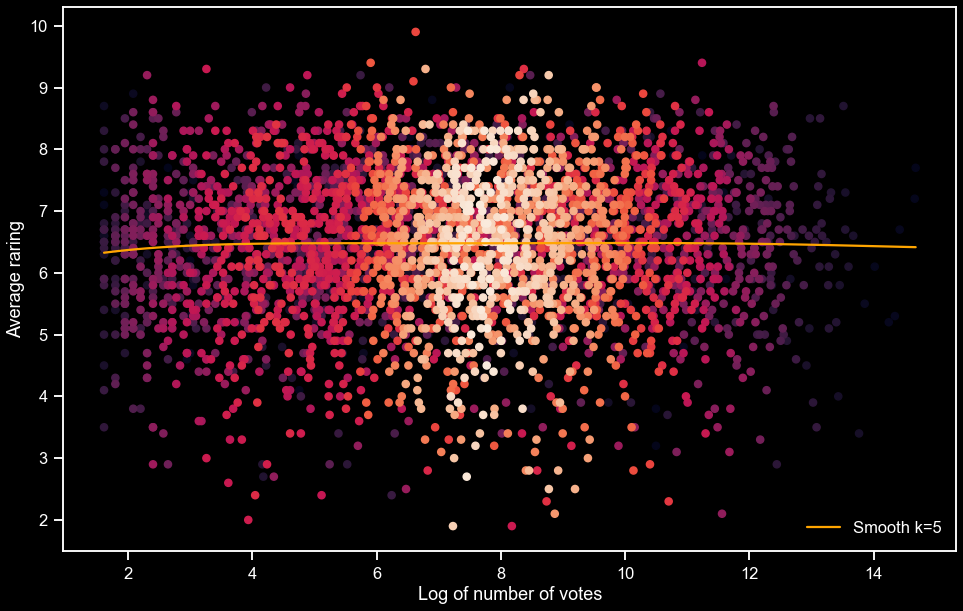

In [22]:
n_votesl = np.log(data.n_votes)

xy = np.vstack([data.ratings,n_votesl])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
data.ratings, n_votesl, z = data.ratings[idx], n_votesl[idx], z[idx]

sort_indexes  = sorted(range(len(n_votesl)), key=lambda k: n_votesl[k])
sorted_n_votesl = sorted(n_votesl)
    
coeff = np.polyfit(sorted_n_votesl, data.ratings, 5)
x = np.linspace(sorted_n_votesl[0], sorted_n_votesl[-1], num = 100)
Polynomial = np.polyval(coeff, x)


fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(n_votesl, data.ratings, c=z, s=50)
plt.plot(x, Polynomial, '-', label = 'Smooth k=5', color='orange') 
plt.xlabel('Log of number of votes')
plt.legend(loc='lower right')
plt.ylabel('Average raring')
plt.show()

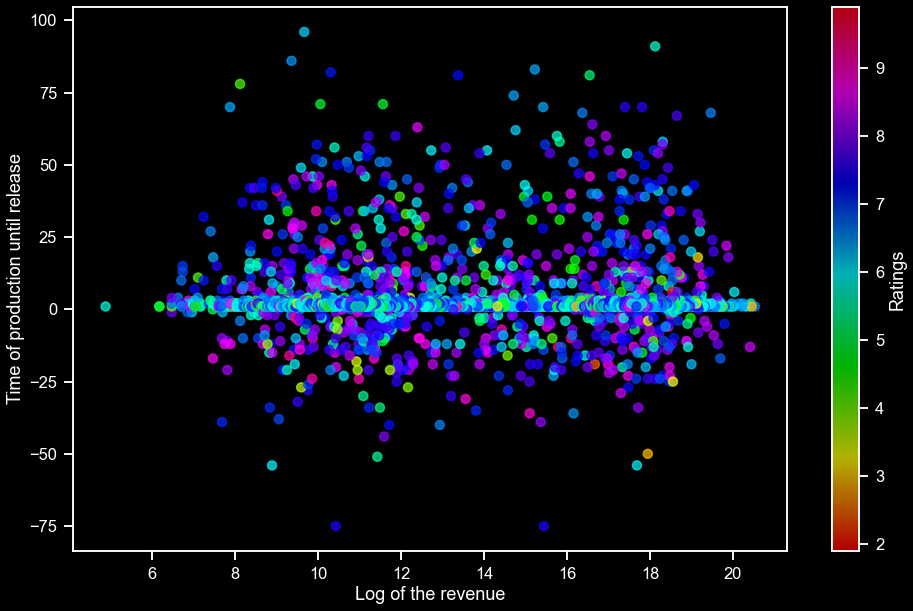

In [23]:
plt.figure(figsize=(16, 10))

plt.scatter(Revenuel,data.Time, c = data.ratings, cmap='hsv', alpha = 0.7)
plt.colorbar(label = "Ratings")
plt.xlabel('Log of the revenue')
plt.ylabel('Time of production until release')
plt.show()

C:\Users\desktop\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\desktop\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


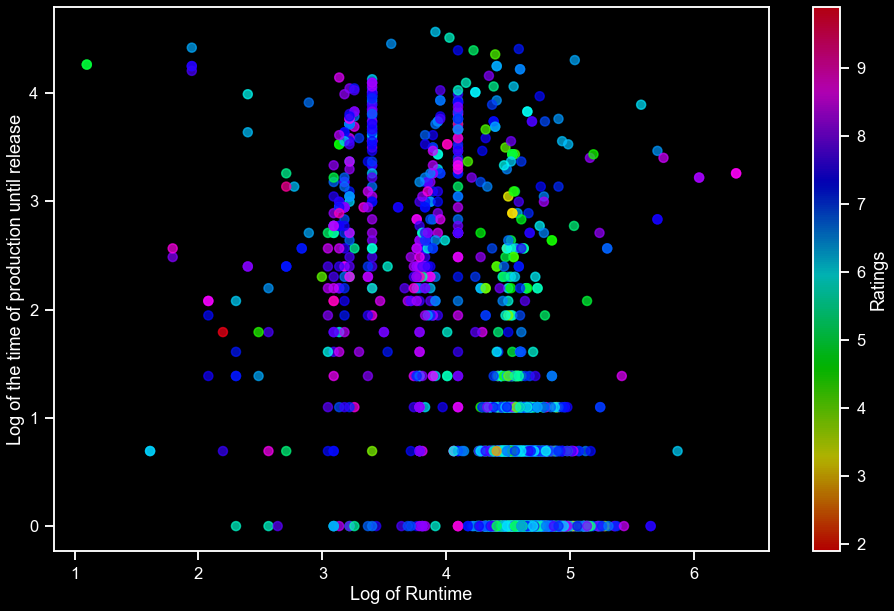

In [24]:
plt.figure(figsize=(16, 10))

runtimel = np.log(data.runtime)
timel = np.log(data.Time)

plt.scatter(runtimel,timel, c = data.ratings, cmap='hsv', alpha = 0.7)
plt.colorbar(label = "Ratings")
plt.xlabel('Log of Runtime')
plt.ylabel('Log of the time of production until release')
plt.show()

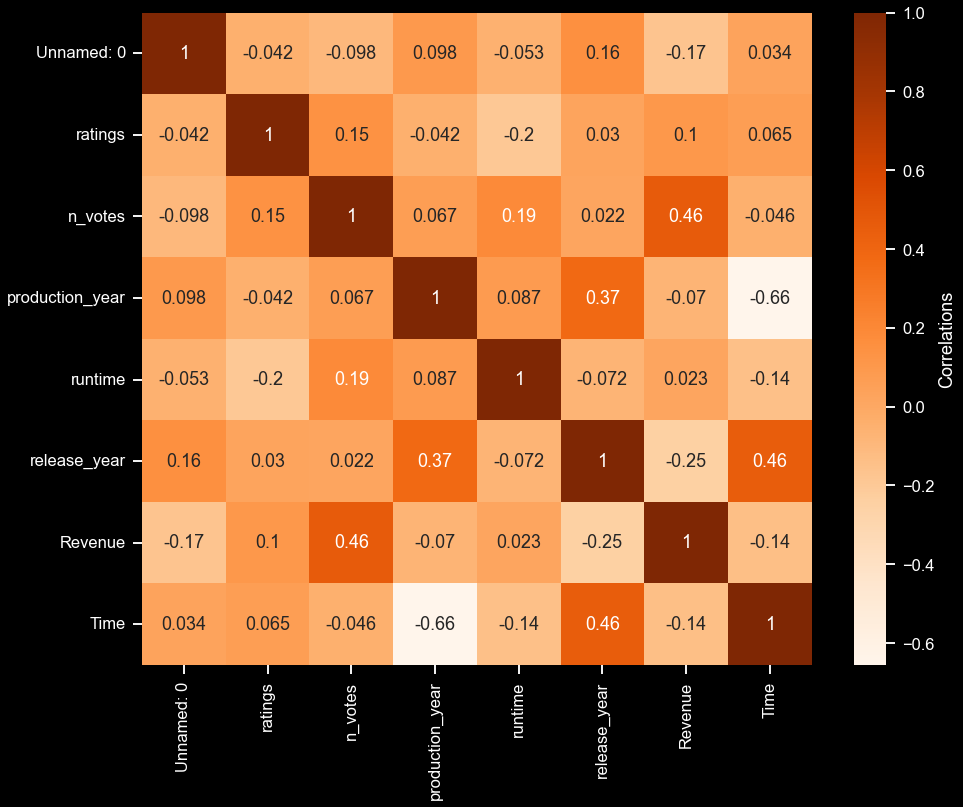

In [25]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 12))


heat_map = sns.heatmap(corr_matrix, annot=True, cmap = "Oranges", cbar_kws={'label': 'Correlations'})
plt.show()

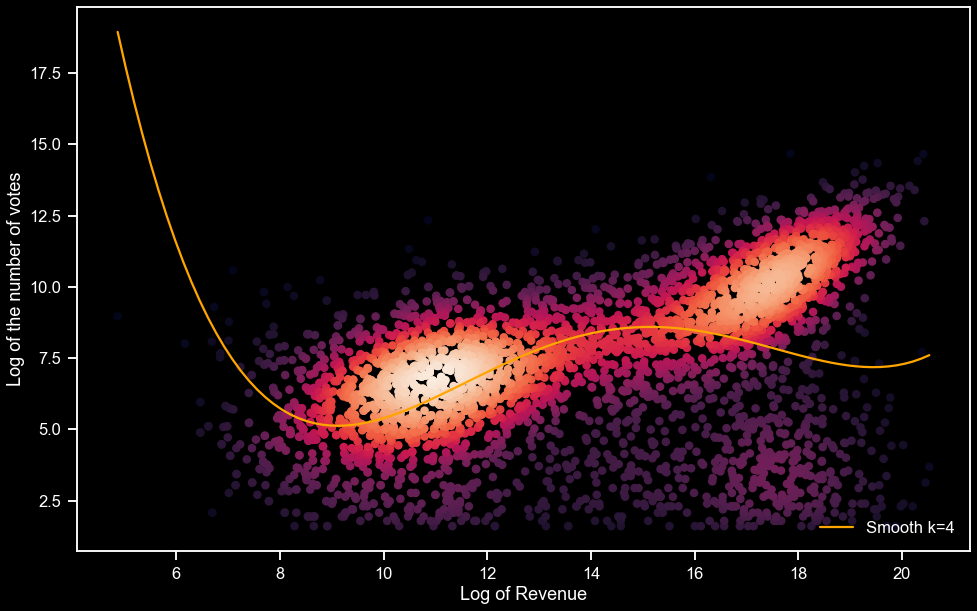

In [26]:
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')

Revenuel = np.log(data.Revenue)
nvotesl = np.log(data.n_votes)

xy = np.vstack([nvotesl,Revenuel])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
nvotesl, Revenuel, z = nvotesl[idx], Revenuel[idx], z[idx]

sort_indexes  = sorted(range(len(Revenuel)), key=lambda k: Revenuel[k])
sorted_Revenuel = sorted(Revenuel)
    
coeff = np.polyfit(sorted_Revenuel, nvotesl, 4)
x = np.linspace(sorted_Revenuel[0], sorted_Revenuel[-1], num = 100)
Polynomial = np.polyval(coeff, x)

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(Revenuel, nvotesl, c=z, s=50)
plt.plot(x, Polynomial, '-', label = 'Smooth k=4', color='orange') 
plt.xlabel('Log of Revenue')
plt.legend(loc='lower right')
plt.ylabel('Log of the number of votes')
plt.show()

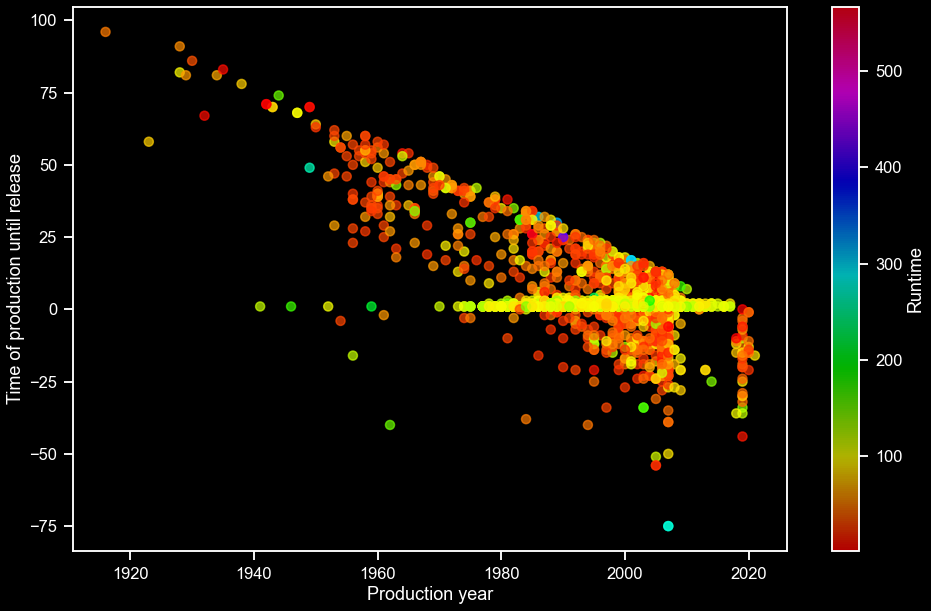

In [27]:
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')

plt.figure(figsize=(16, 10))

plt.scatter(data.production_year,data.Time, c = data.runtime, cmap='hsv', alpha = 0.7)
plt.colorbar(label = "Runtime")

plt.xlabel('Production year')
plt.ylabel('Time of production until release')
plt.show()

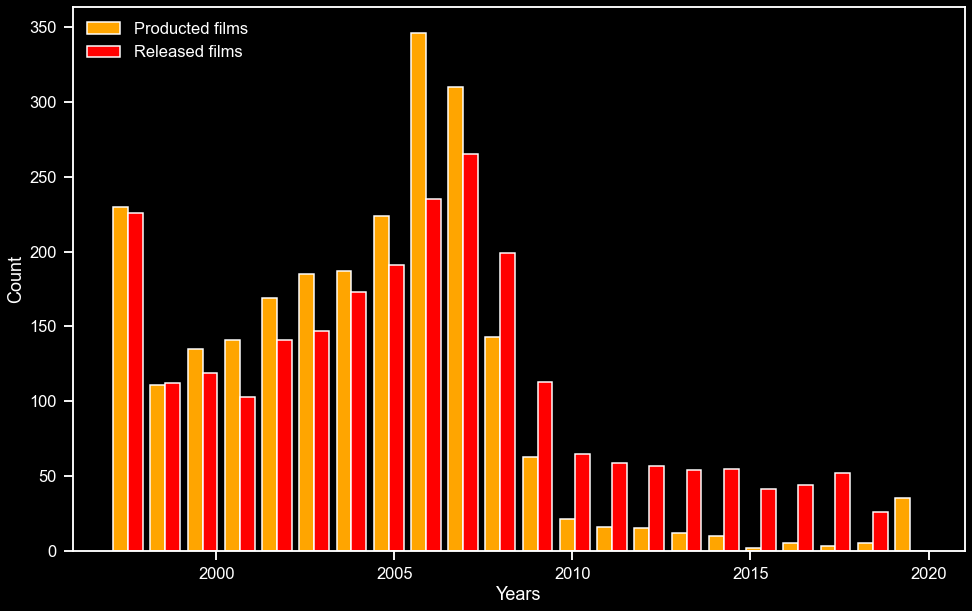

In [28]:
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')
bins = np.linspace(1997, 2020, 23)
plt.figure(figsize=(16, 10))
plt.hist([data.production_year,data.release_year],bins,color=['Orange', 'Red'],
         label=["Producted films","Released films"])
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Revenue', ylabel='Density'>

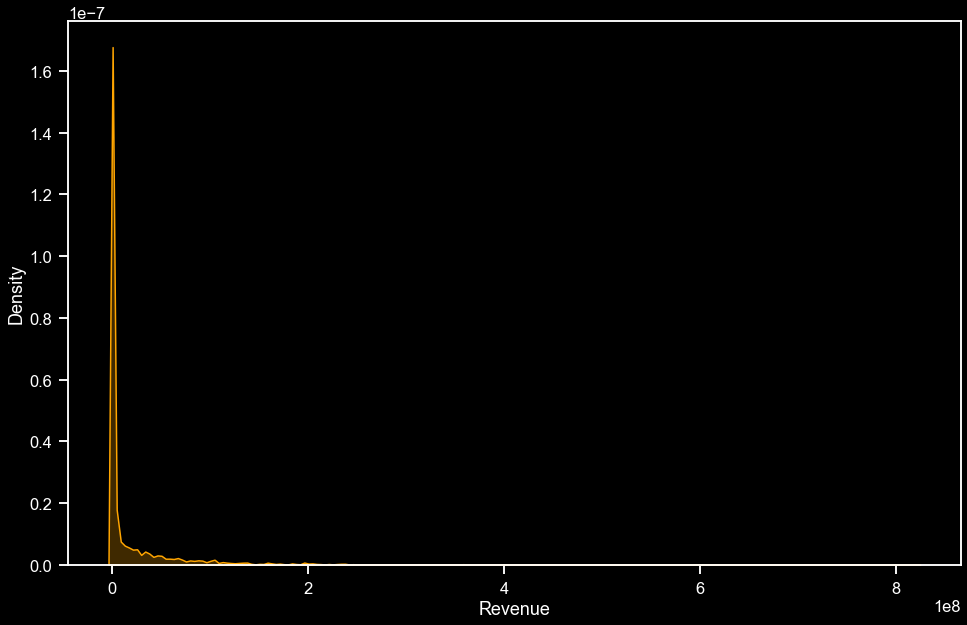

In [29]:
plt.figure(figsize=(16, 10))

sns.kdeplot(data.Revenue, bw_adjust=0.1, color = 'Orange', fill = True)

<AxesSubplot:xlabel='Revenue', ylabel='Density'>

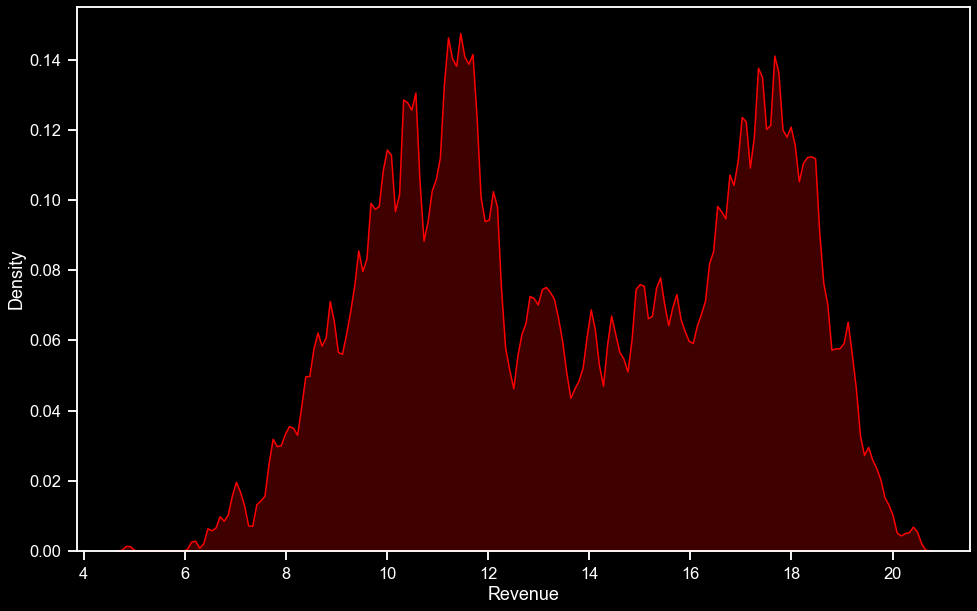

In [30]:
plt.figure(figsize=(16, 10))

sns.kdeplot(Revenuel, bw_adjust=0.1, color = 'Red', fill = True)


In [31]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
get_best_distribution(data.Revenue)

p value for norm = 0.0


C:\Users\desktop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 3.246010782731099e-79
p value for weibull_max = 0.0
p value for weibull_min = 1.4630720215448767e-81
p value for pareto = 3.574912972266957e-288


C:\Users\desktop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for genextreme = 0.0
Best fitting distribution: exponweib
Best p value: 3.246010782731099e-79
Parameters for the best fit: (1.0136707448598712, 0.3461390189978185, 130.38694638694633, 5734382.782155642)


('exponweib',
 3.246010782731099e-79,
 (1.0136707448598712,
  0.3461390189978185,
  130.38694638694633,
  5734382.782155642))

No handles with labels found to put in legend.


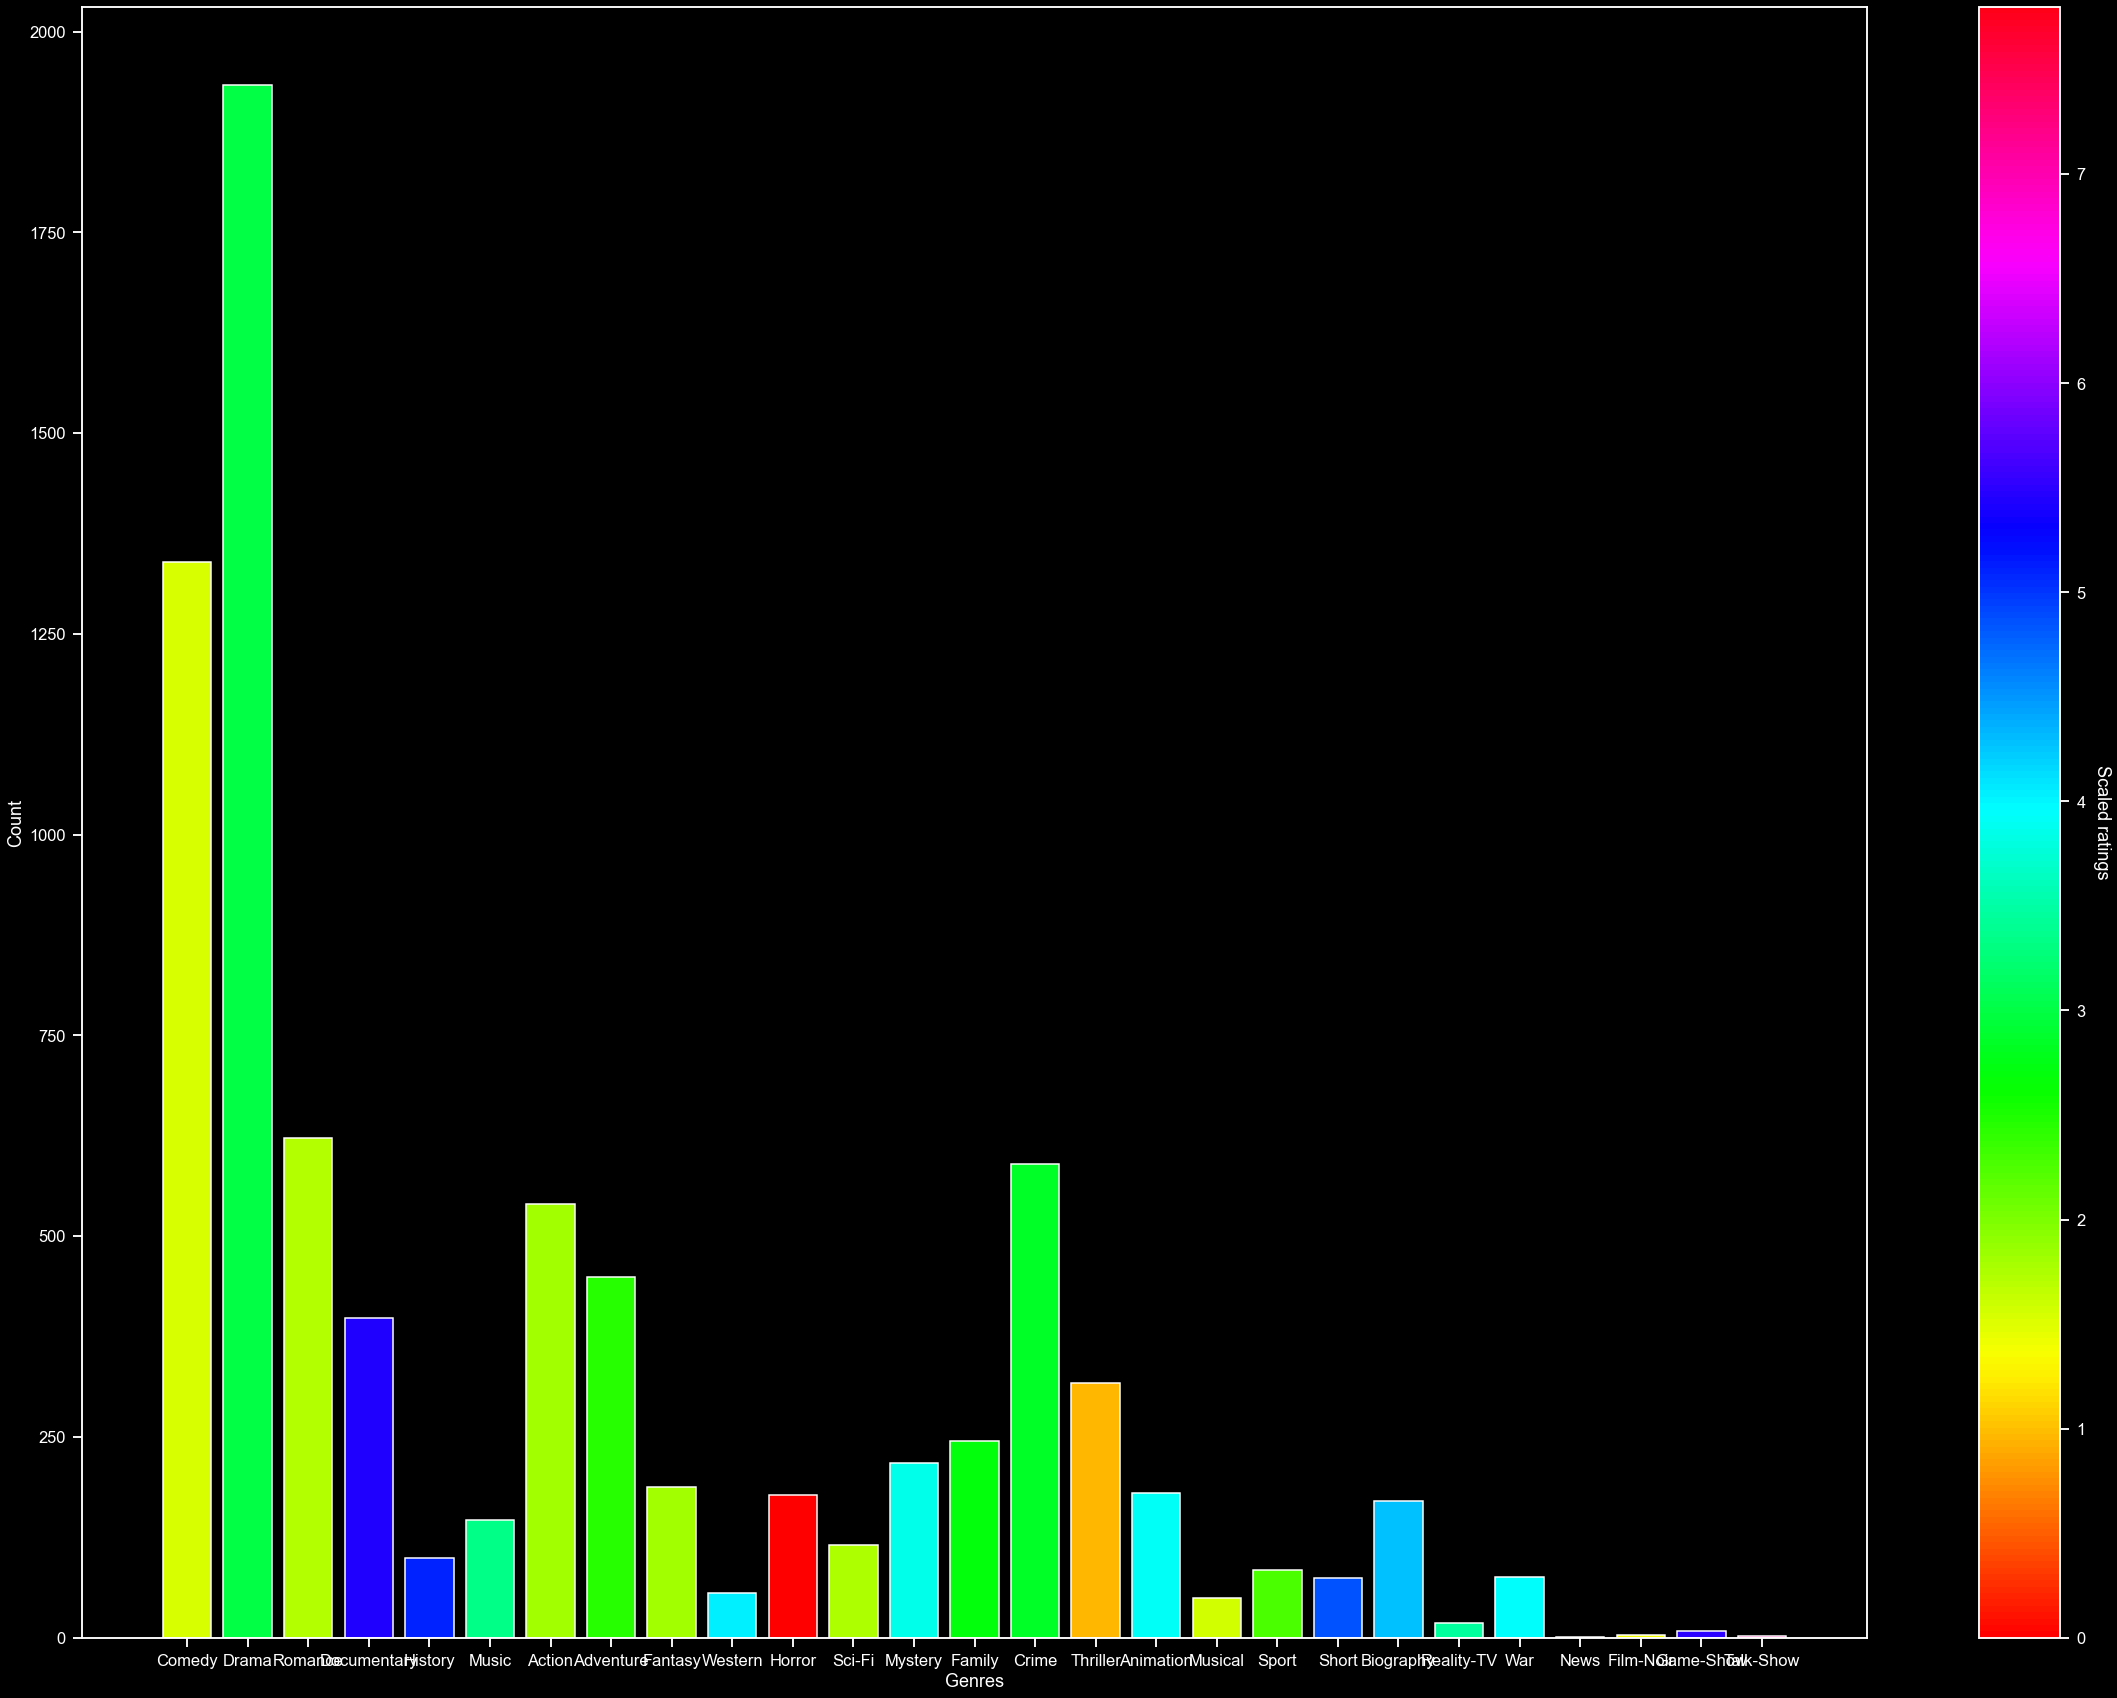

In [32]:
plt.figure(figsize=(40, 30))
genrescount = defaultdict(dict)

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("hsv")


for i in range(len(data)):
    for j in data.genres[i]:
        if j in genrescount:
            genrescount[j]['count'] += 1
            genrescount[j]['rating'] += data.ratings[i]
        else:
            genrescount[j]['count'] = 1
            genrescount[j]['rating'] = data.ratings[i]
for i in genrescount:
    genrescount[i]['rating'] = genrescount[i]['rating']/genrescount[i]['count']

genres = []
count = []
ratings = []

for key in genrescount.keys():
    genres.append(key)
    count.append(genrescount[key]['count'])
    ratings.append(genrescount[key]['rating'])

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(ratings)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Scaled ratings', rotation=270,labelpad=25)

plt.bar(genres, count, color = my_cmap(rescale(ratings)))
plt.legend(loc='upper left')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

## Recode dummy for genre

In [33]:
genrescount.keys()
for i in genrescount.keys():
    data[i] = 0
for i in range(len(data)):
    for j in data.genres[i]:
        data.loc[i,j] = 1

In [34]:
DATAMLP = data.copy(deep=True)

In [35]:
datalinear = data.copy(deep = True)
del datalinear['title']
del datalinear['img_url']
del datalinear['description']
del datalinear['img_embeddings']
del datalinear['text_embeddings']


In [36]:
datalinear

Unnamed: 0  ratings   n_votes  production_year  runtime  \
0           2512      6.2   33519.0             1991      104   
1           5795      7.7     647.0             2005      118   
2             38      5.8   43497.0             2009      119   
3           8056      7.7      16.0             1959       30   
4           6753      7.3  111600.0             1988       94   
...          ...      ...       ...              ...      ...   
3623         668      7.1  118129.0             2006      135   
3624         223      5.1    1938.0             1997       82   
3625        4459      6.8   22004.0             2007      100   
3626        1517      4.5    2653.0             1995      100   
3627        5439      6.5   20789.0             2006      100   

                             genres  release_year  studio       Revenue  Time  \
0          [Comedy, Drama, Romance]        1991.0      WB  1.185182e+08   1.0   
1     [Documentary, History, Music]        2005.0   Zeit.  1.229829e+06   1.0   
2      [Action, Adventure, Fantasy]        2009.0    Uni.  1.903583e+07   1.0   
3                         [Western]        1993.0   Trim.  3.742445e+04  35.0   
4          [Action, Horror, Sci-Fi]        1988.0    Uni.  3.237387e+07   1.0   
...                             ...           ...     ...           ...   ...   
3623     [Action, Adventure, Drama]        2006.0    P/DW  4.907014e+07   1.0   
3624        [Comedy, Crime, Horror]        1997.0  Strand  1.395034e+05   1.0   
3625     [Drama, Romance, Thriller]        2007.0  Mitro.  3.452419e+03   1.0   
3626      [Comedy, Romance, Sci-Fi]        1995.0    Sav.  5.337487e+06   1.0   
3627             [Biography, Drama]        2006.0   MGM/W  2.446384e+06   1.0   

      ...  Musical  Sport  Short  Biography  Reality-TV  War  News  Film-Noir  \
0     ...        0      0      0          0           0    0     0          0   
1     ...        0      0      0          0           0    0     0          0   
2     ...        0      0      0          0           0    0     0          0   
3     ...        0      0      0          0           0    0     0          0   
4     ...        0      0      0          0           0    0     0          0   
...   ...      ...    ...    ...        ...         ...  ...   ...        ...   
3623  ...        0      0      0          0           0    0     0          0   
3624  ...        0      0      0          0           0    0     0          0   
3625  ...        0      0      0          0           0    0     0          0   
3626  ...        0      0      0          0           0    0     0          0   
3627  ...        0      0      0          1           0    0     0          0   

      Game-Show  Talk-Show  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
3623          0          0  
3624          0          0  
3625          0          0  
3626          0          0  
3627          0          0  

[3628 rows x 37 columns]

## Check if we can recode studios levels

In [37]:
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) == 1:
         group.append(i)
dataindependent = datalinear.replace(group, "Independent")
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 40:
         group.append(i)
dataindependent = dataindependent.replace(group, "Small")
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 100:
         group.append(i)
dataindependent = dataindependent.replace(group, "Middle")
group = []
groups = datalinear.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 200:
         group.append(i)
dataindependent = dataindependent.replace(group, "Leader")
print(dataindependent.groupby('studio').apply(len))



studio
Independent     188
Leader         1000
Middle          708
Small          1732
dtype: int64


## Dummy variables for studio

In [38]:
studio =  dataindependent['studio'].unique()
for i in studio:
    dataindependent[i] = 0
for i in range(len(dataindependent)):
        dataindependent.loc[i,dataindependent.studio[i]] = 1

In [39]:
dataindependent

Unnamed: 0  ratings   n_votes  production_year  runtime  \
0           2512      6.2   33519.0             1991      104   
1           5795      7.7     647.0             2005      118   
2             38      5.8   43497.0             2009      119   
3           8056      7.7      16.0             1959       30   
4           6753      7.3  111600.0             1988       94   
...          ...      ...       ...              ...      ...   
3623         668      7.1  118129.0             2006      135   
3624         223      5.1    1938.0             1997       82   
3625        4459      6.8   22004.0             2007      100   
3626        1517      4.5    2653.0             1995      100   
3627        5439      6.5   20789.0             2006      100   

                             genres  release_year       studio       Revenue  \
0          [Comedy, Drama, Romance]        1991.0       Leader  1.185182e+08   
1     [Documentary, History, Music]        2005.0        Small  1.229829e+06   
2      [Action, Adventure, Fantasy]        2009.0       Leader  1.903583e+07   
3                         [Western]        1993.0        Small  3.742445e+04   
4          [Action, Horror, Sci-Fi]        1988.0       Leader  3.237387e+07   
...                             ...           ...          ...           ...   
3623     [Action, Adventure, Drama]        2006.0        Small  4.907014e+07   
3624        [Comedy, Crime, Horror]        1997.0       Middle  1.395034e+05   
3625     [Drama, Romance, Thriller]        2007.0  Independent  3.452419e+03   
3626      [Comedy, Romance, Sci-Fi]        1995.0        Small  5.337487e+06   
3627             [Biography, Drama]        2006.0        Small  2.446384e+06   

      Time  ...  Reality-TV  War  News  Film-Noir  Game-Show  Talk-Show  \
0      1.0  ...           0    0     0          0          0          0   
1      1.0  ...           0    0     0          0          0          0   
2      1.0  ...           0    0     0          0          0          0   
3     35.0  ...           0    0     0          0          0          0   
4      1.0  ...           0    0     0          0          0          0   
...    ...  ...         ...  ...   ...        ...        ...        ...   
3623   1.0  ...           0    0     0          0          0          0   
3624   1.0  ...           0    0     0          0          0          0   
3625   1.0  ...           0    0     0          0          0          0   
3626   1.0  ...           0    0     0          0          0          0   
3627   1.0  ...           0    0     0          0          0          0   

      Leader  Small  Middle  Independent  
0          1      0       0            0  
1          0      1       0            0  
2          1      0       0            0  
3          0      1       0            0  
4          1      0       0            0  
...      ...    ...     ...          ...  
3623       0      1       0            0  
3624       0      0       1            0  
3625       0      0       0            1  
3626       0      1       0            0  
3627       0      1       0            0  

[3628 rows x 41 columns]

<Figure size 2880x2160 with 0 Axes>

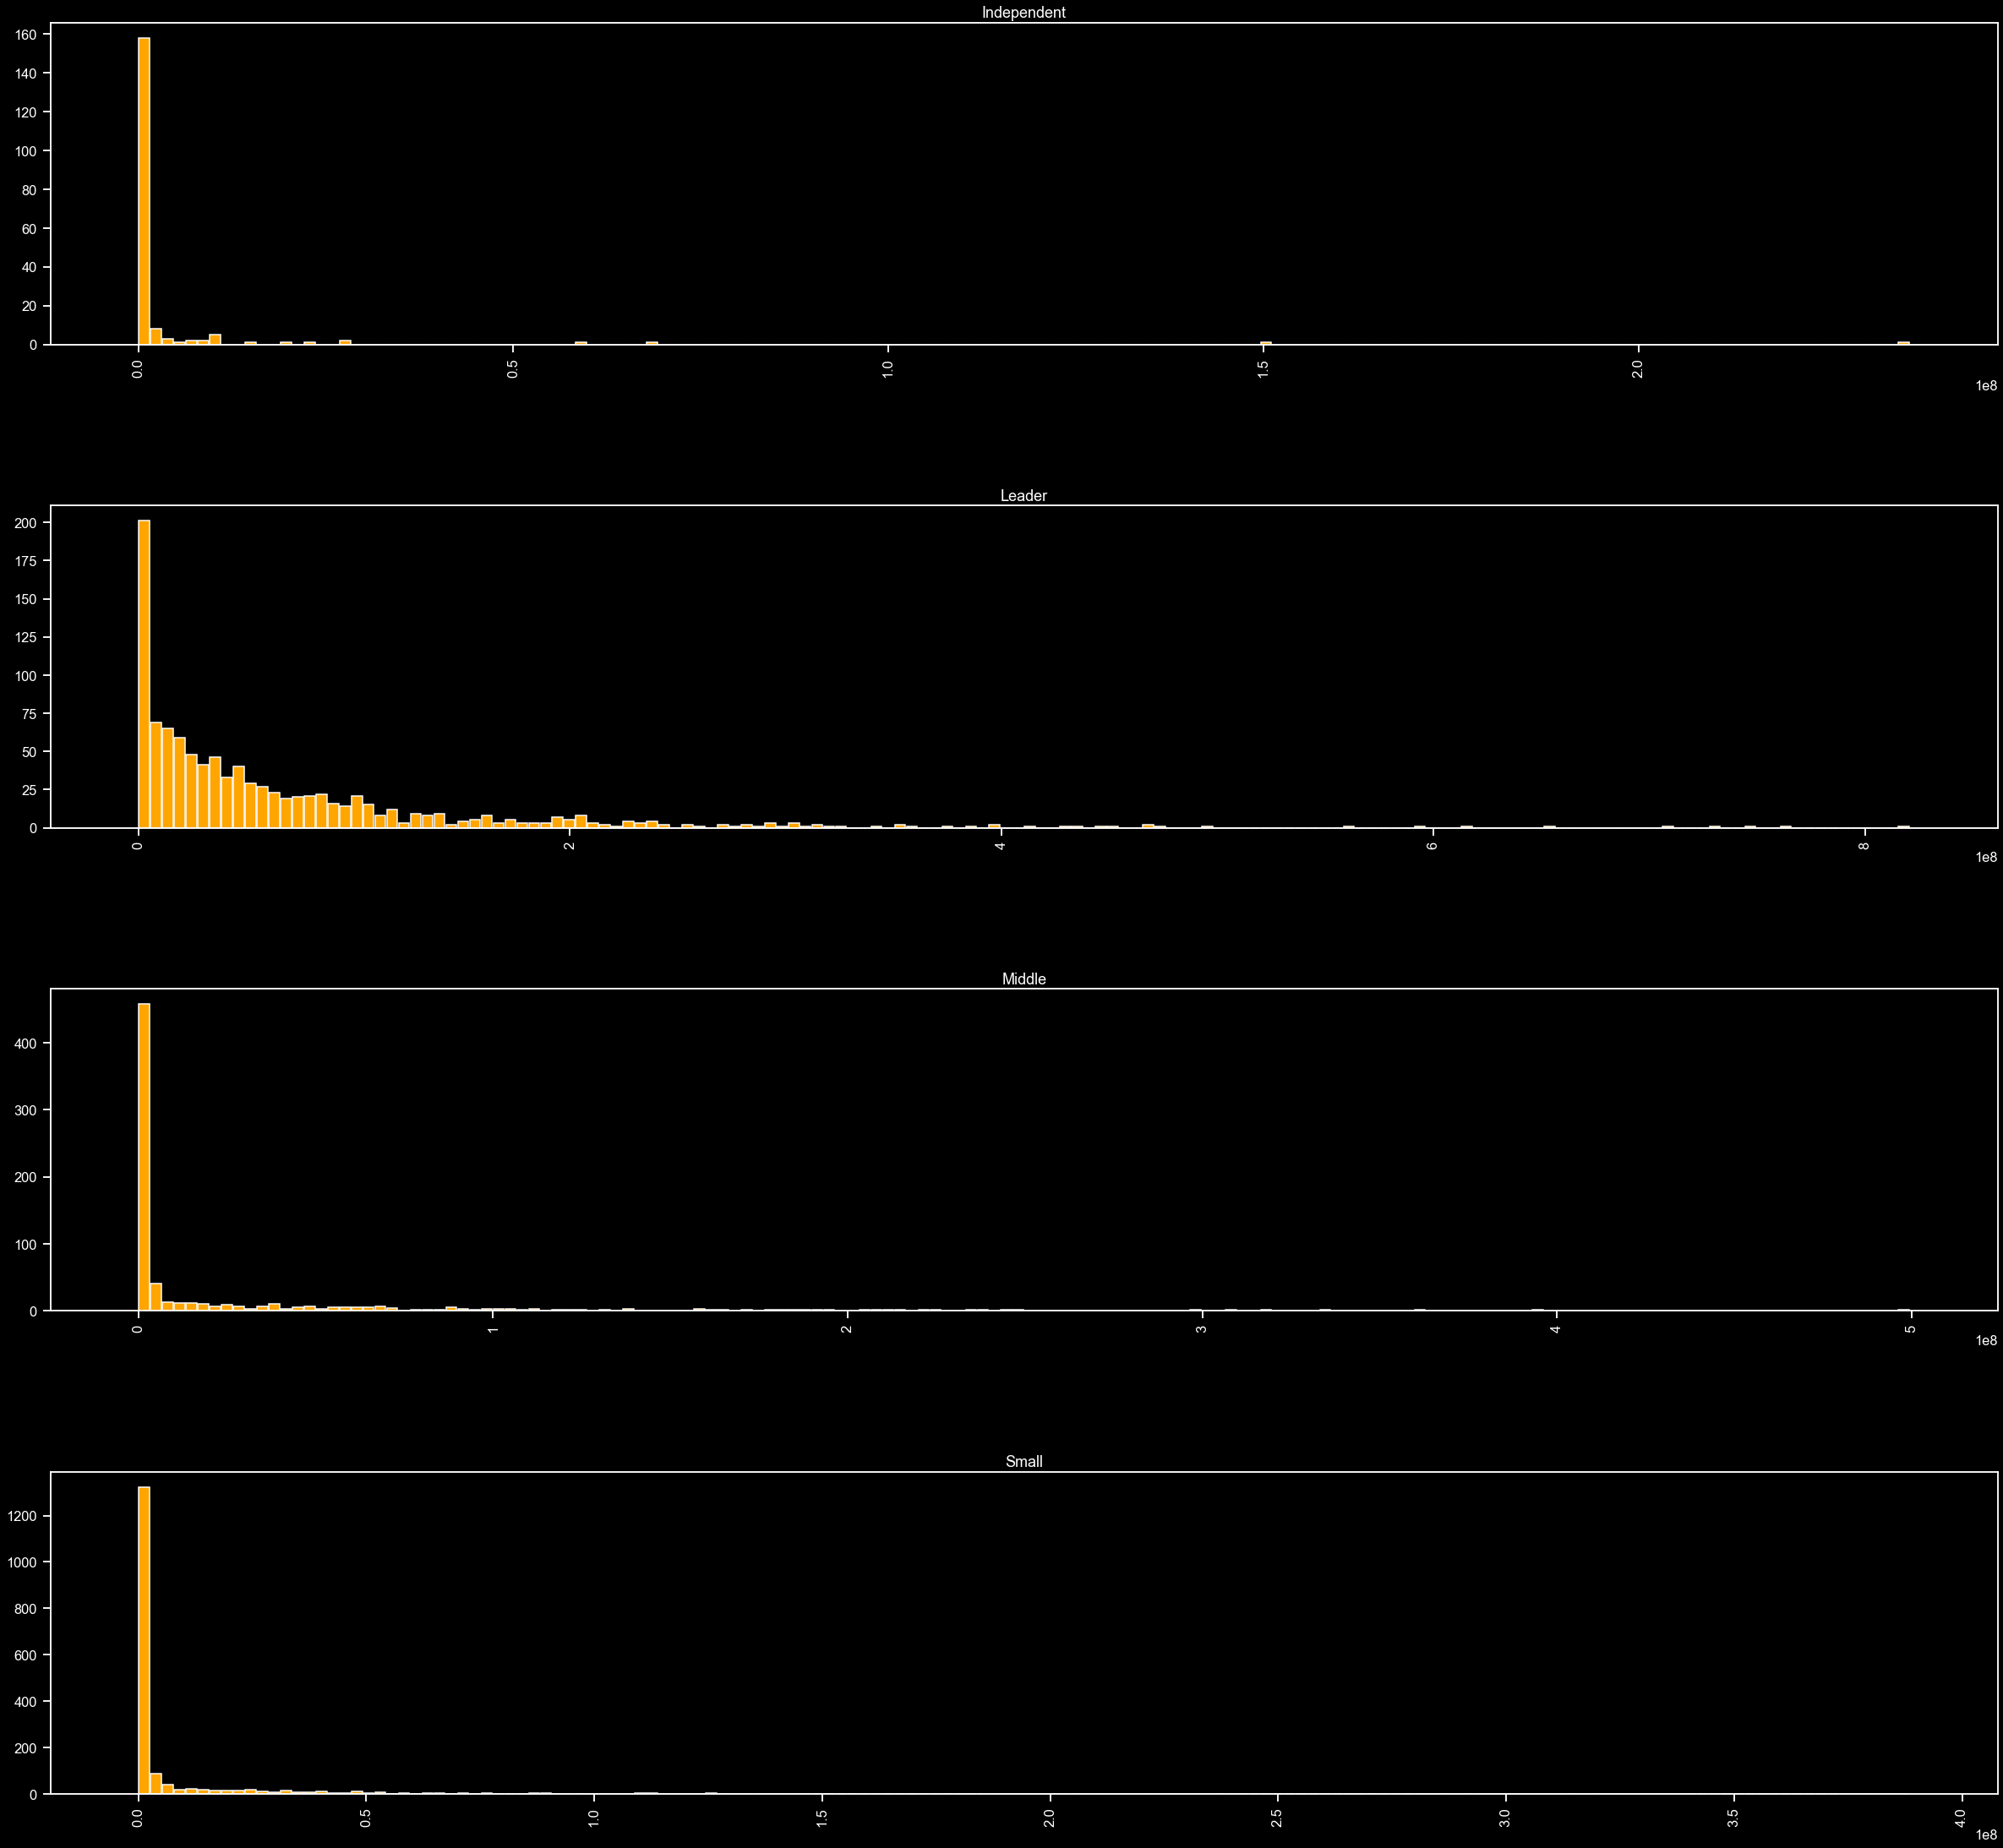

In [40]:
plt.figure(figsize=(40, 30))

dataindependent.hist(column = 'Revenue', by = 'studio', 
                     figsize=(40, 60), bins=150, color = 'Orange',
                    rwidth = 0.9, layout = (6,1), grid=False)
plt.show()

In [41]:
import researchpy as rp
import scipy.stats as stats
rp.summary_cont(dataindependent.groupby(["studio"])["Revenue"])

N          Mean            SD            SE     95% Conf.  \
studio                                                                      
Independent   188  4.129719e+06  2.158923e+07  1.574557e+06  1.023542e+06   
Leader       1000  6.727455e+07  9.911060e+07  3.134152e+06  6.112428e+07   
Middle        708  2.304262e+07  5.515449e+07  2.072833e+06  1.897297e+07   
Small        1732  9.050444e+06  3.277520e+07  7.875377e+05  7.505818e+06   

                 Interval  
studio                     
Independent  7.235895e+06  
Leader       7.342483e+07  
Middle       2.711226e+07  
Small        1.059507e+07

Text(0, 0.5, 'Revenue')

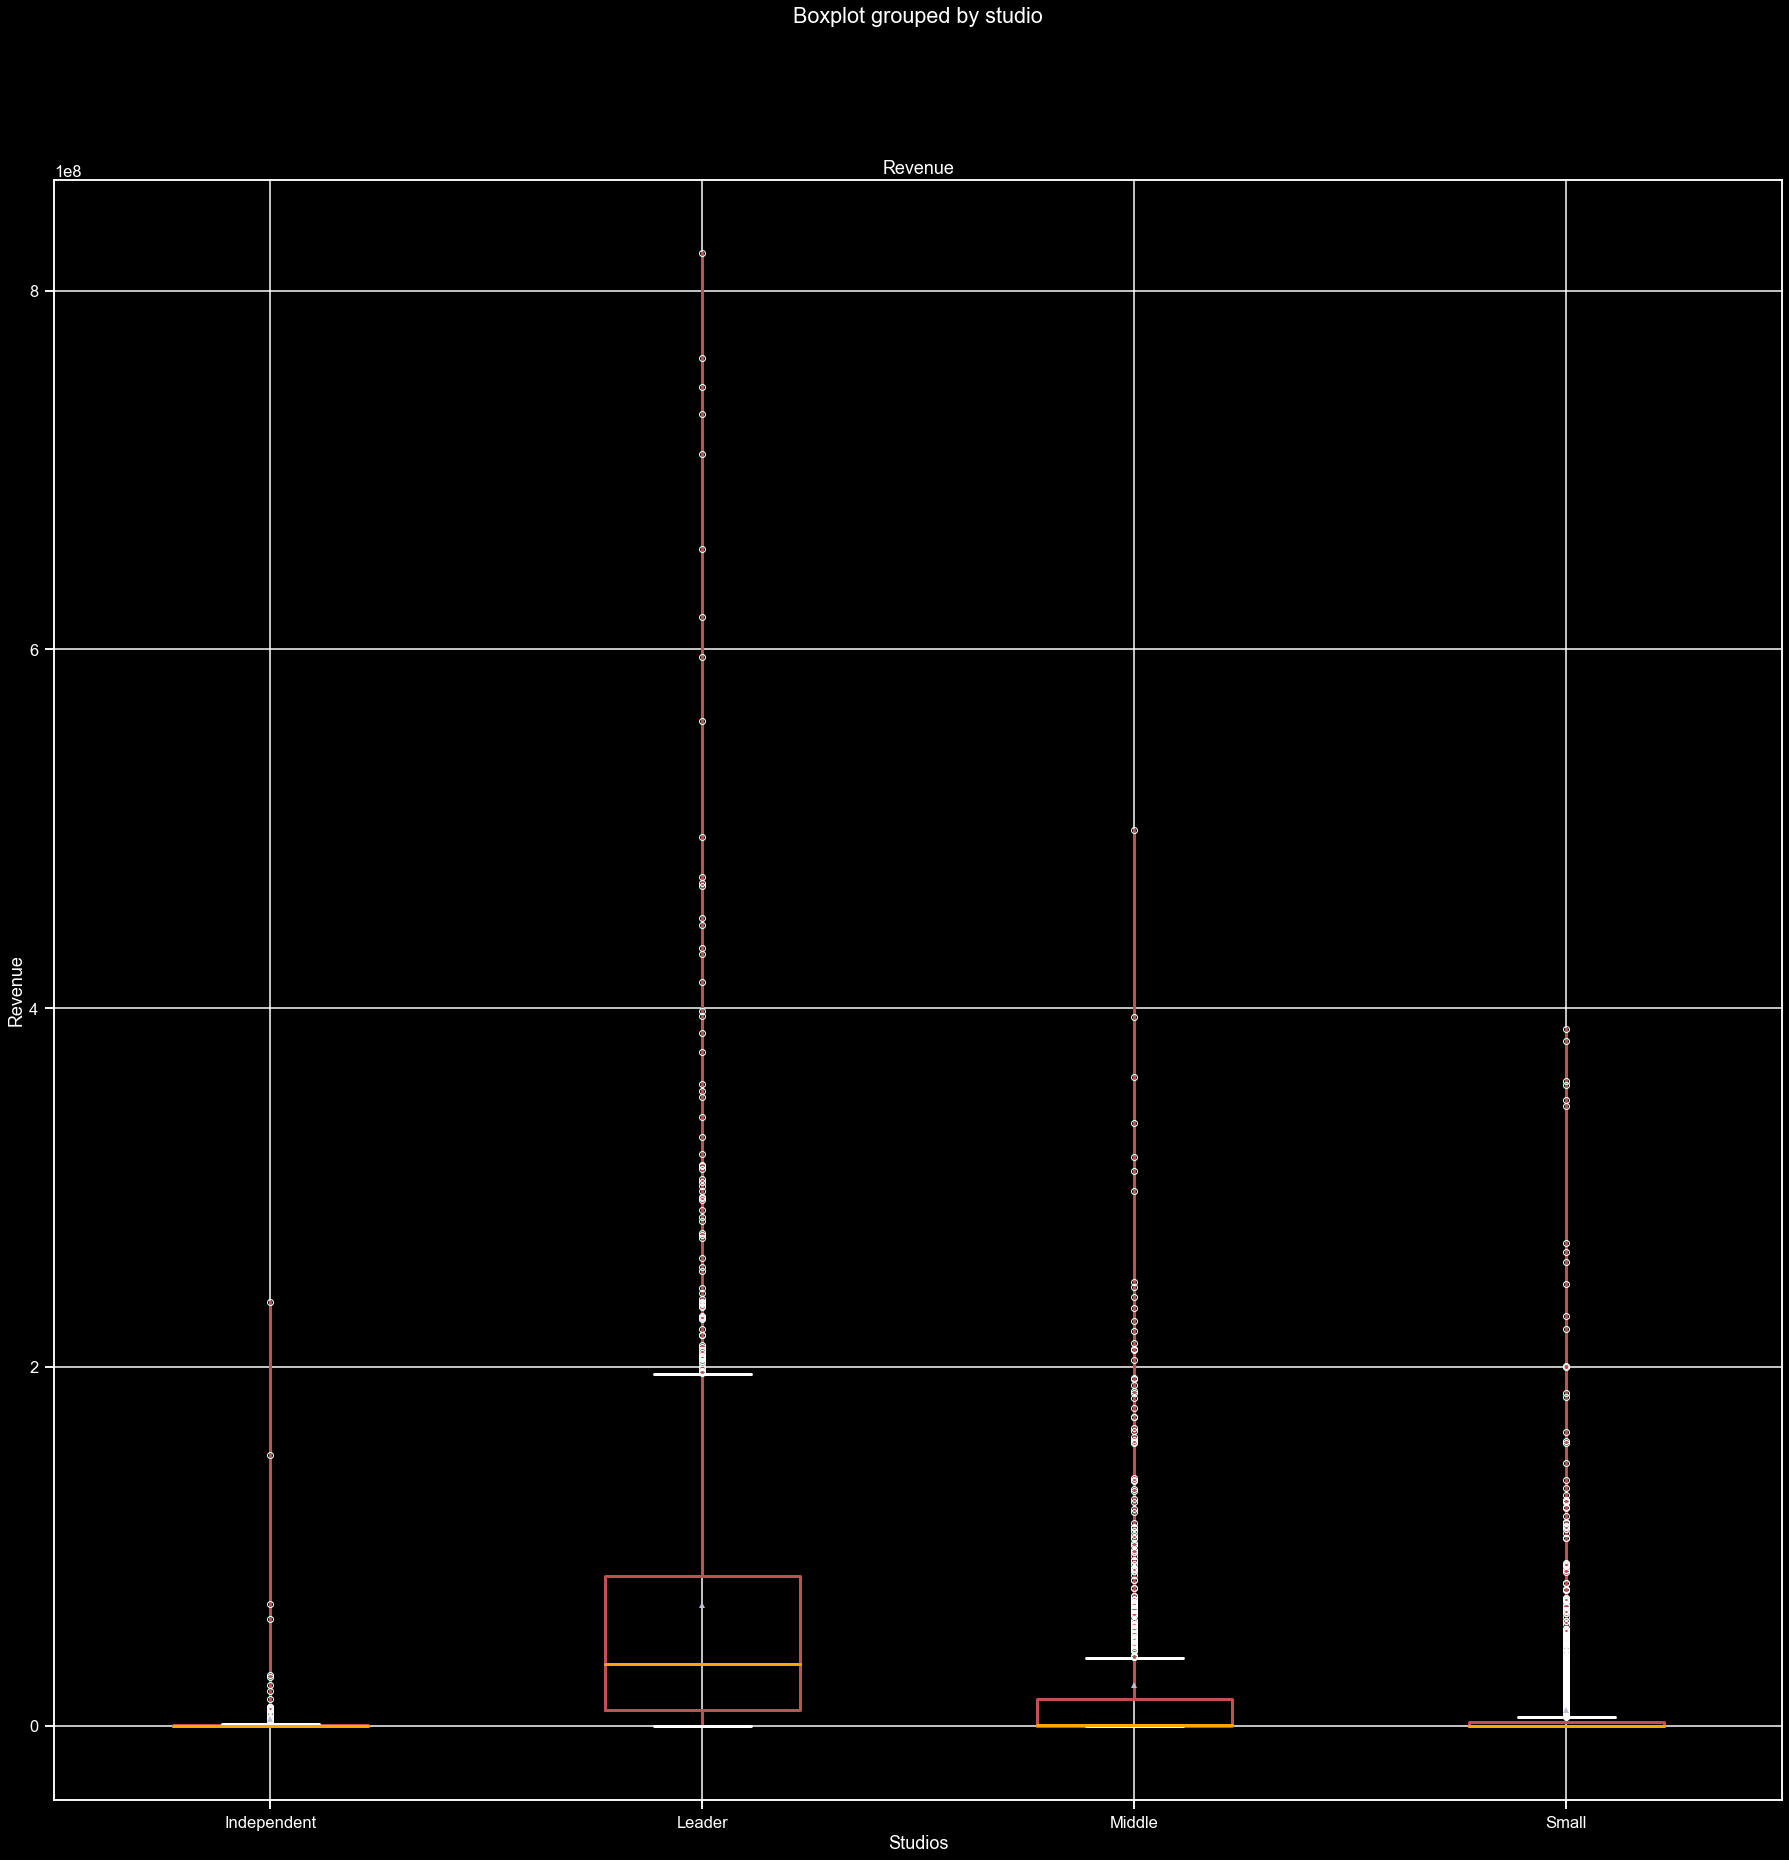

In [42]:
boxplot = dataindependent.boxplot(["Revenue"], by = ["studio"],
                                  boxprops=dict(linestyle='-', linewidth=3, color="r"),
                                  flierprops=dict(linestyle='-', linewidth=3,color="r"),
                                  medianprops=dict(linestyle='-', linewidth=3,color="orange"),
                                  whiskerprops=dict(linestyle='-', linewidth=3,color="r"),
                                  capprops=dict(linestyle='-', linewidth=3),
                     figsize = (30, 30),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Studios")
boxplot.set_ylabel("Revenue")

## Linear model, Ridge,Lasso, Elasticnet

In [43]:
del dataindependent['genres']
datamixed = dataindependent.copy(deep=True)
del dataindependent['studio']

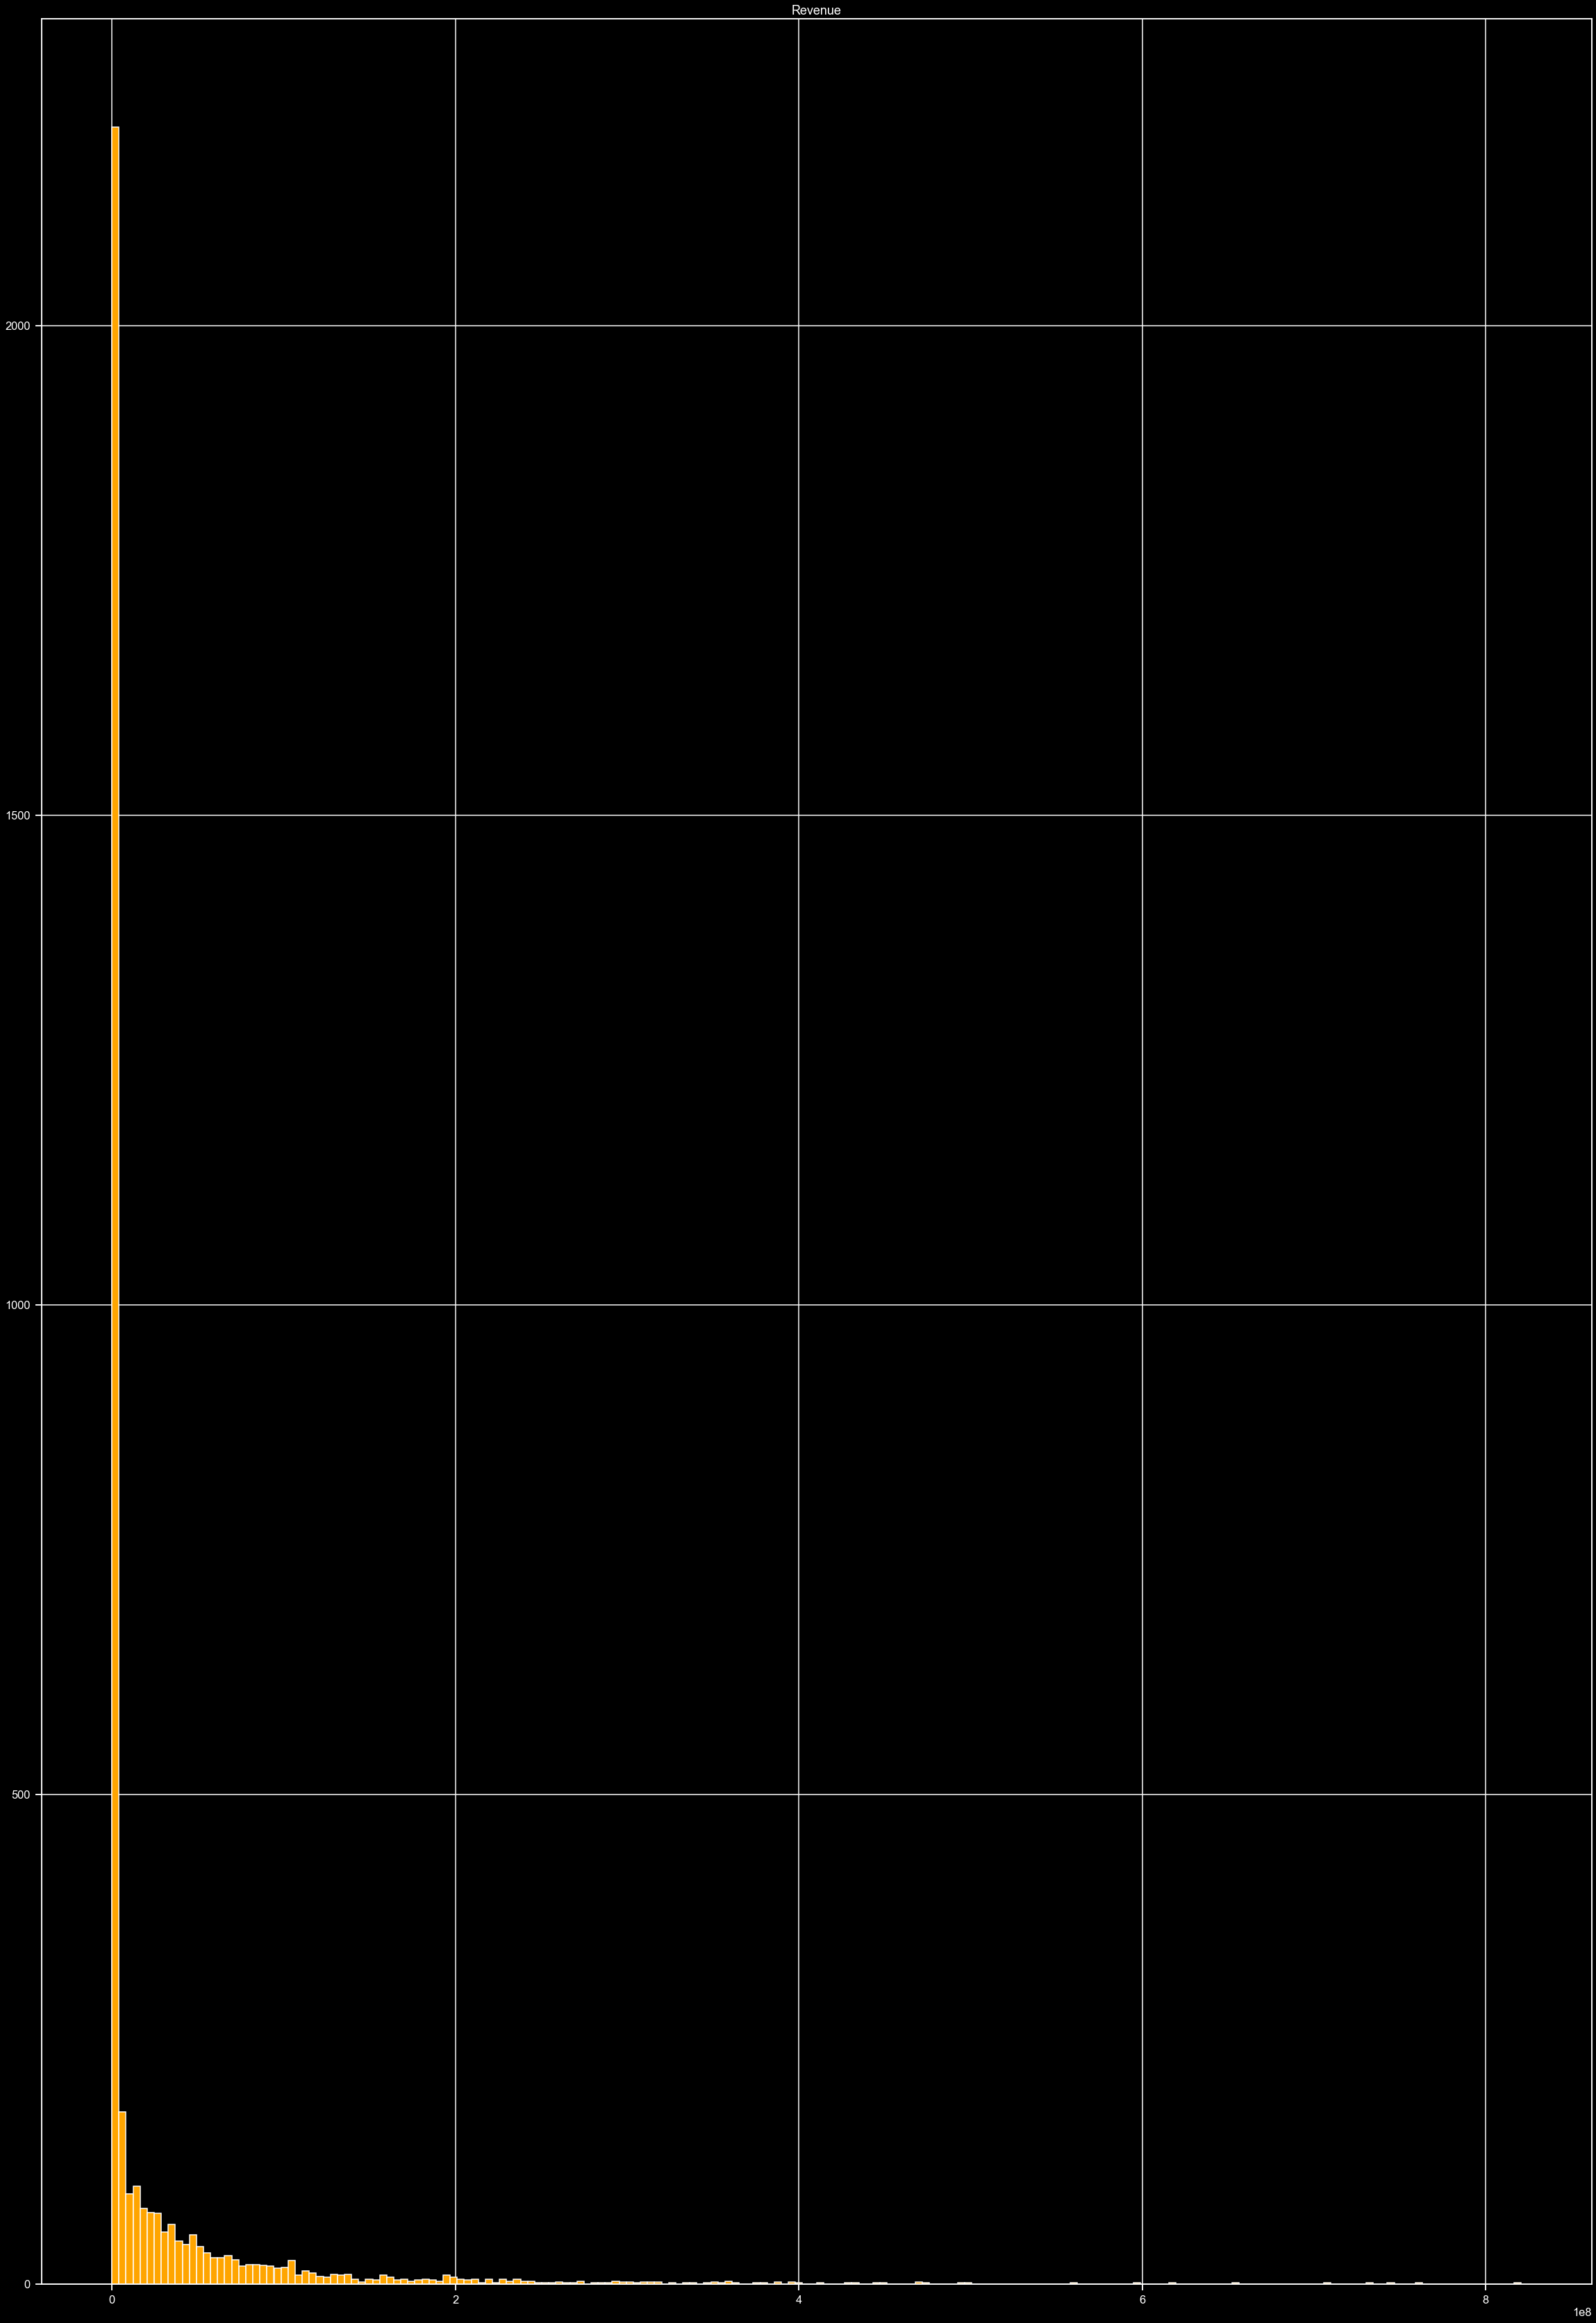

In [44]:
dataindependent.hist(column = 'Revenue', 
                     figsize=(40, 60), bins=200, color = 'Orange')
plt.show()

### Train and Test sets

In [45]:
X = dataindependent.drop("Revenue", axis= 1)
Y = dataindependent["Revenue"]
scaler = StandardScaler()
dataindependent2 = scaler.fit_transform(dataindependent)
dataindependentScaled = pd.DataFrame(dataindependent2, columns = dataindependent.columns.values)
X = dataindependentScaled.drop("Revenue", axis= 1)
Y = dataindependentScaled["Revenue"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

### Linear model

In [46]:
def fit_predict_with_features(X_train,Y_train, X_test, selected_features):
    X_train_filtered = X_train[selected_features]
    X_test_filtered = X_test[selected_features]
    
    linear_regression_m = LinearRegression()
    linear_regression_m.fit(X_train_filtered,Y_train)
    y_pred = linear_regression_m.predict(X_test_filtered)
    
    return y_pred

In [47]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_train_lr= lr.predict(Xtrain)
print("RMSE for train")
print(compute_rmse(pred_train_lr,Ytrain))
print("Idem verif")
print(np.sqrt(mean_squared_error(Ytrain,pred_train_lr)))
print("R-squared for train")
print(r2_score(Ytrain, pred_train_lr))

pred_test_lr= lr.predict(Xtest)
print("RMSE for test")
print(np.sqrt(mean_squared_error(Ytest,pred_test_lr))) 
print("R-squared for test")
print(r2_score(Ytest, pred_test_lr))

RMSE for train
0.8020842178411478
Idem verif
0.8020842178411478
R-squared for train
0.3694500736642987
RMSE for test
0.8196546182774038
R-squared for test
0.2688317663284653


### Ridge

In [48]:
from pylab import *
from patsy import dmatrices

dataindependent2= dataindependent.drop("Revenue", axis=1)

vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dataindependent2.values,i) for i in range(dataindependent2.shape[1])]
vif["features"]=dataindependent2.columns
vif

C:\Users\desktop\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor         features
0     1.087749       Unnamed: 0
1     1.305978          ratings
2     1.186067          n_votes
3          inf  production_year
4     1.467713          runtime
5          inf     release_year
6          inf             Time
7     1.768791           Comedy
8     1.988806            Drama
9     1.209145          Romance
10    2.154687      Documentary
11    1.115854          History
12    1.078564            Music
13    1.377652           Action
14    1.397675        Adventure
15    1.097155          Fantasy
16    1.177880          Western
17    1.160986           Horror
18    1.102280           Sci-Fi
19    1.128691          Mystery
20    1.146496           Family
21    1.270409            Crime
22    1.241189         Thriller
23    1.268838        Animation
24    1.025641          Musical
25    1.042290            Sport
26    1.168377            Short
27    1.115042        Biography
28    1.159830       Reality-TV
29    1.054683              War
30    1.004365             News
31    1.025625        Film-Noir
32    1.136953        Game-Show
33    1.015310        Talk-Show
34         inf           Leader
35         inf            Small
36         inf           Middle
37         inf      Independent

Text(0.5, 1.0, 'Ridge Coefficients vs Regularization Parameters')

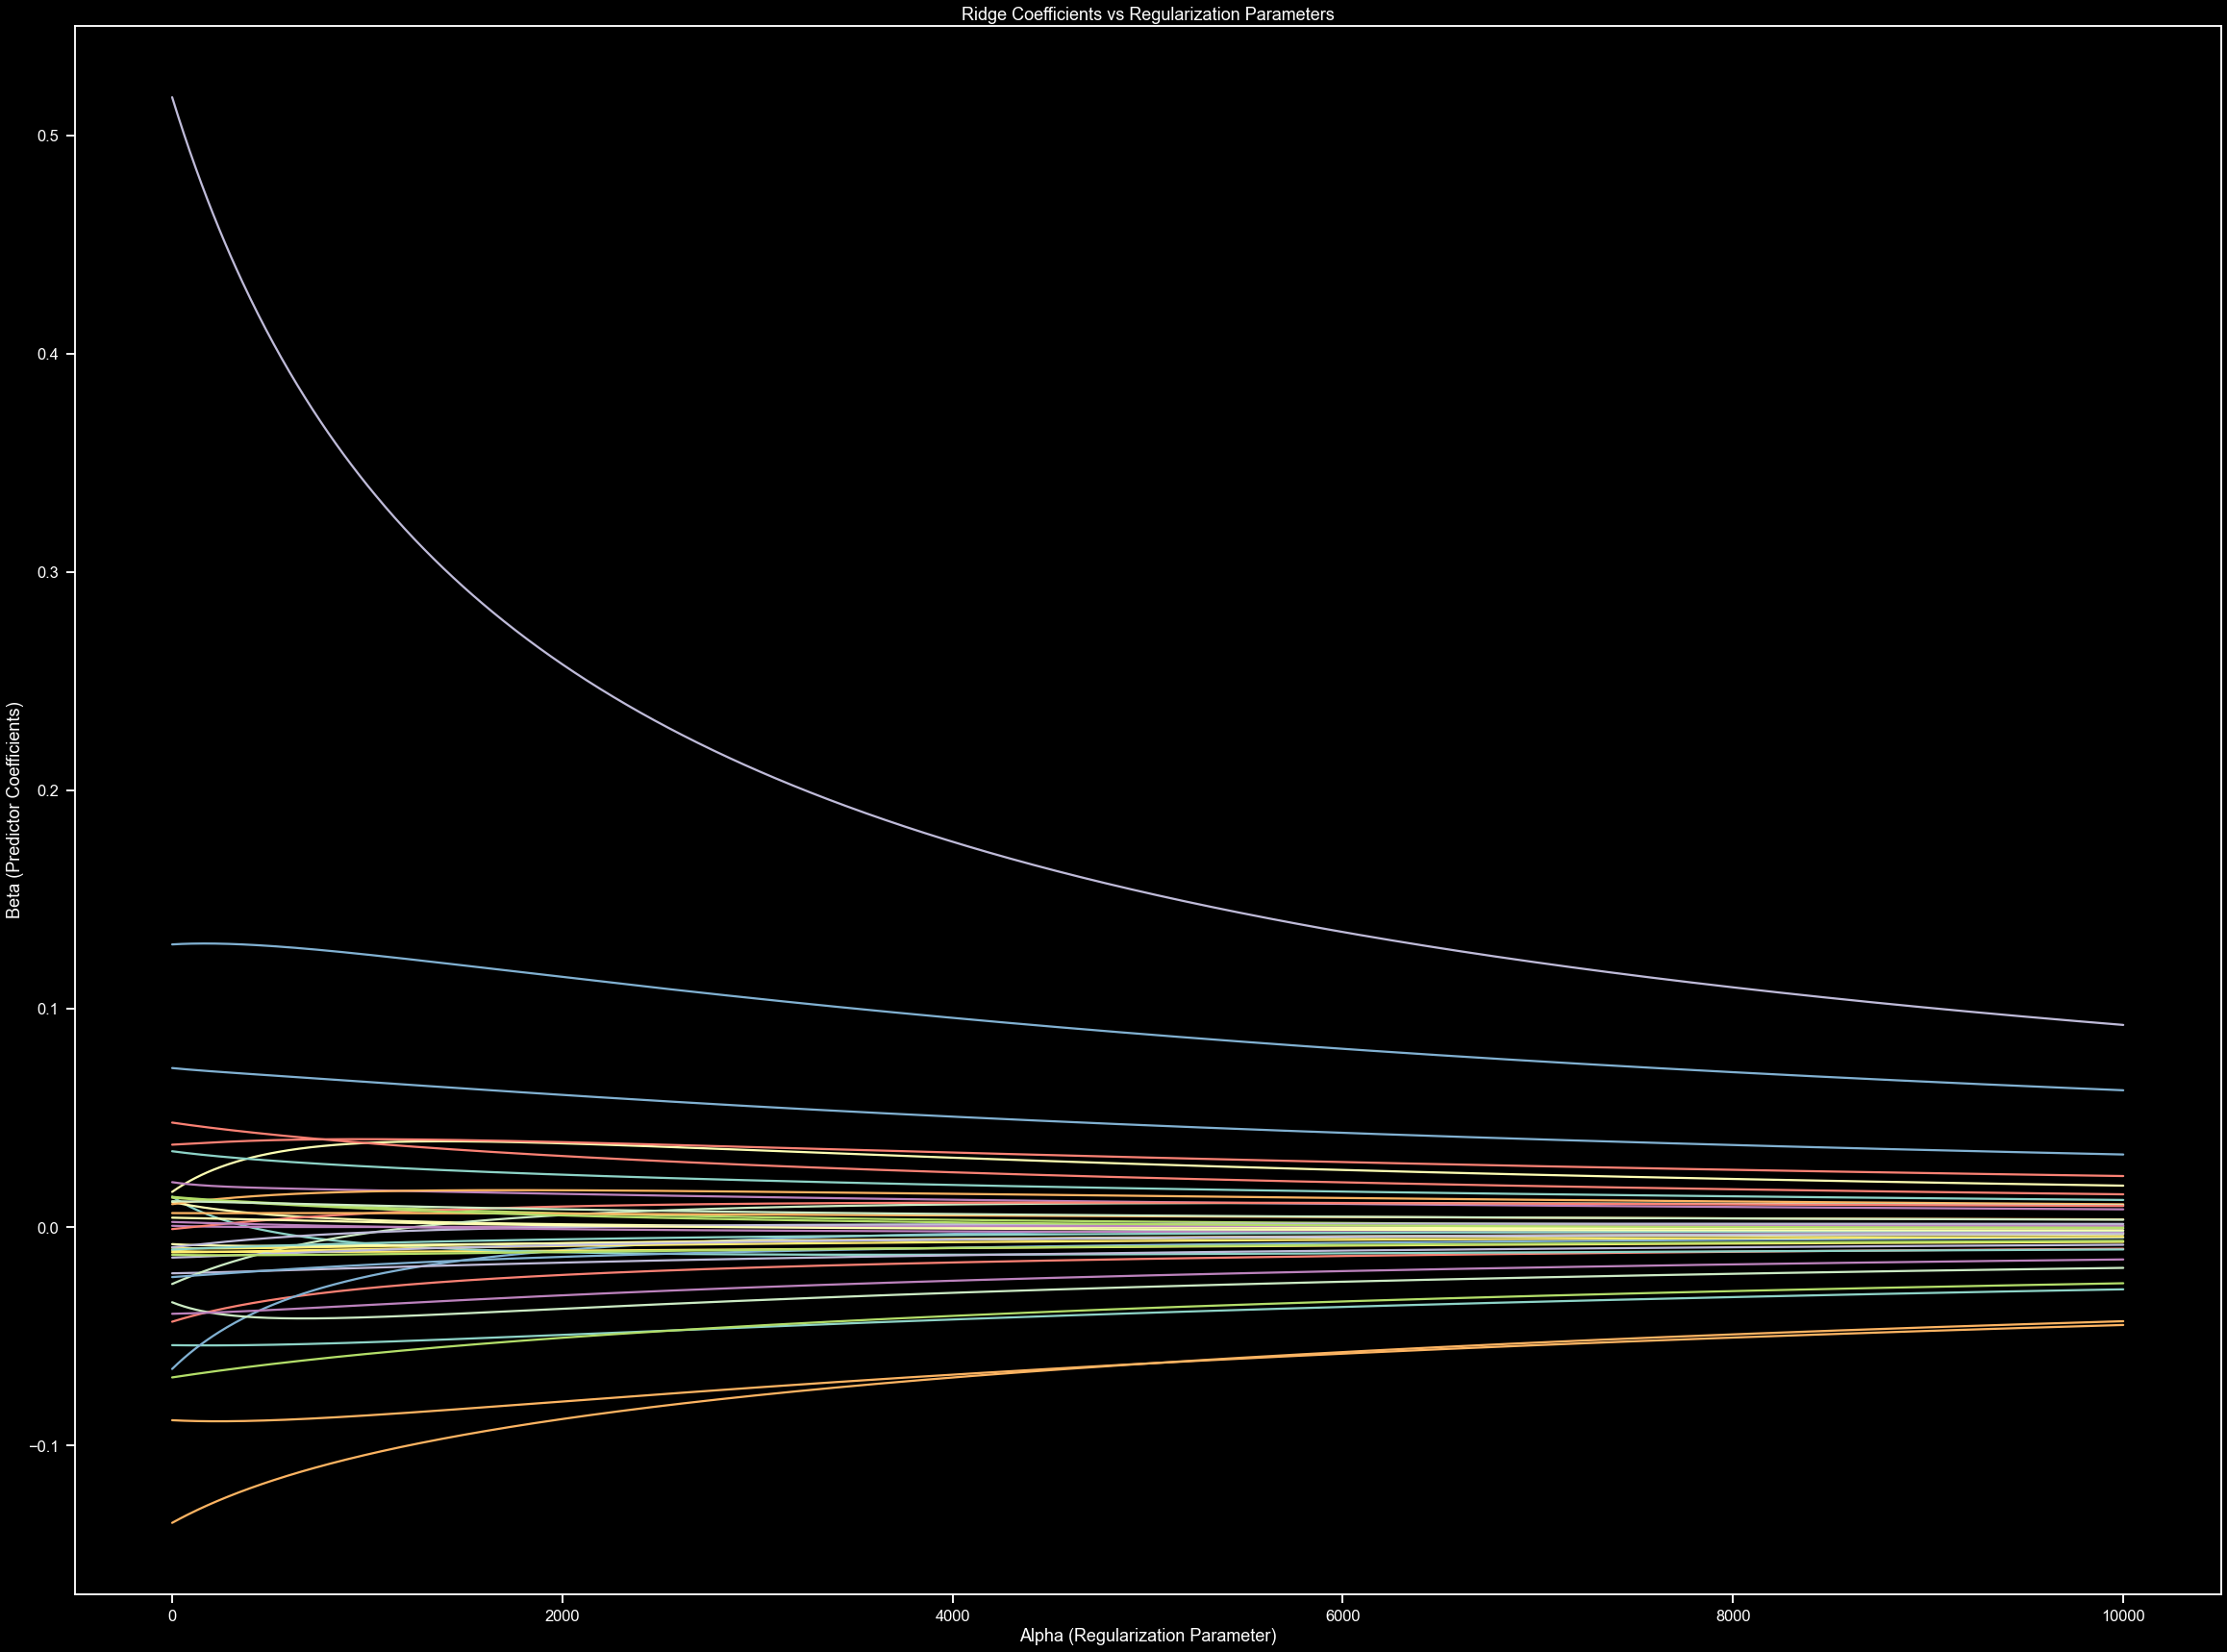

In [49]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
coef=[]
alphas = np.linspace(0.001,10000,1000)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(Xtrain,Ytrain)
  coef.append(ridgereg.coef_)
###Make plot of Beta as a function of Alpha
fig=plt.figure(figsize=(40, 30))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')

In [50]:
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)
    

In [51]:
Rid = Ridge(alpha=0.01, max_iter=100000, tol=1e-8, fit_intercept=True, normalize=True)
Rid.fit(Xtrain, Ytrain)
Rid.get_params(deep=True)
result = regression_analysis(Xtrain, Ytrain, Rid)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     46.62
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          8.52e-256
Time:                        14:04:55   Log-Likelihood:                -3477.8
No. Observations:                2902   AIC:                             7030.
Df Residuals:                    2865   BIC:                             7251.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0083      0.015      0.550      0.582      -0.021       0.038
Unnamed: 0         -0.0539      0.016     -3.448      0.001      -0.085      -0.023
ratings             0.0176      0.017      1.021      0.308      -0.016       0.051
n_votes             0.5114      0.019     26.734      0.000       0.474       0.549
production_year    -0.0417      0.010     -3.981      0.000      -0.062      -0.021
runtime            -0.0628      0.018     -3.570      0.000      -0.097      -0.028
release_year       -0.1348      0.012    -11.088      0.000      -0.159      -0.111
Time               -0.0674      0.010     -6.920      0.000      -0.086      -0.048
Comedy              0.0203      0.020      1.017      0.309      -0.019       0.060
Drama              -0.0351      0.021     -1.659      0.097      -0.077       0.006
Romance            -0.0109      0.016     -0.662      0.508      -0.043       0.021
Documentary         0.0127      0.022      0.579      0.562      -0.030       0.056
History             0.0112      0.015      0.719      0.472      -0.019       0.042
Music              -0.0210      0.016     -1.345      0.179      -0.052       0.010
Action              0.0379      0.018      2.142      0.032       0.003       0.073
Adventure           0.0726      0.018      4.085      0.000       0.038       0.107
Fantasy             0.0109      0.016      0.676      0.499      -0.021       0.042
Western             0.0137      0.016      0.848      0.396      -0.018       0.046
Horror              0.0006      0.016      0.039      0.969      -0.030       0.032
Sci-Fi             -0.0250      0.015     -1.626      0.104      -0.055       0.005
Mystery            -0.0094      0.016     -0.583      0.560      -0.041       0.022
Family              0.0346      0.016      2.110      0.035       0.002       0.067
Crime              -0.0078      0.017     -0.453      0.650      -0.041       0.026
Thriller           -0.0089      0.017     -0.530      0.596      -0.042       0.024
Animation          -0.0005      0.017     -0.030      0.976      -0.033       0.032
Musical            -0.0226      0.014     -1.588      0.112      -0.050       0.005
Sport               0.0065      0.016      0.413      0.680      -0.024       0.038
Short               0.0134      0.016      0.818      0.414      -0.019       0.045
Biography           0.0024      0.016      0.150      0.881      -0.029       0.033
Reality-TV          0.0119      0.016      0.745      0.456      -0.019       0.043
War                -0.0115      0.015     -0.763      0.446      -0.041       0.018
News               -0.0100      0.013     -0.748      0.455      -0.036       0.016
Film-Noir           0.0043      0.014      0.319      0.750      -0.022       0.031
Game-Show          -0.0137      0.015     -0.946      0.344

In [52]:
print(result.aic)

7029.619363511283


### LASSO

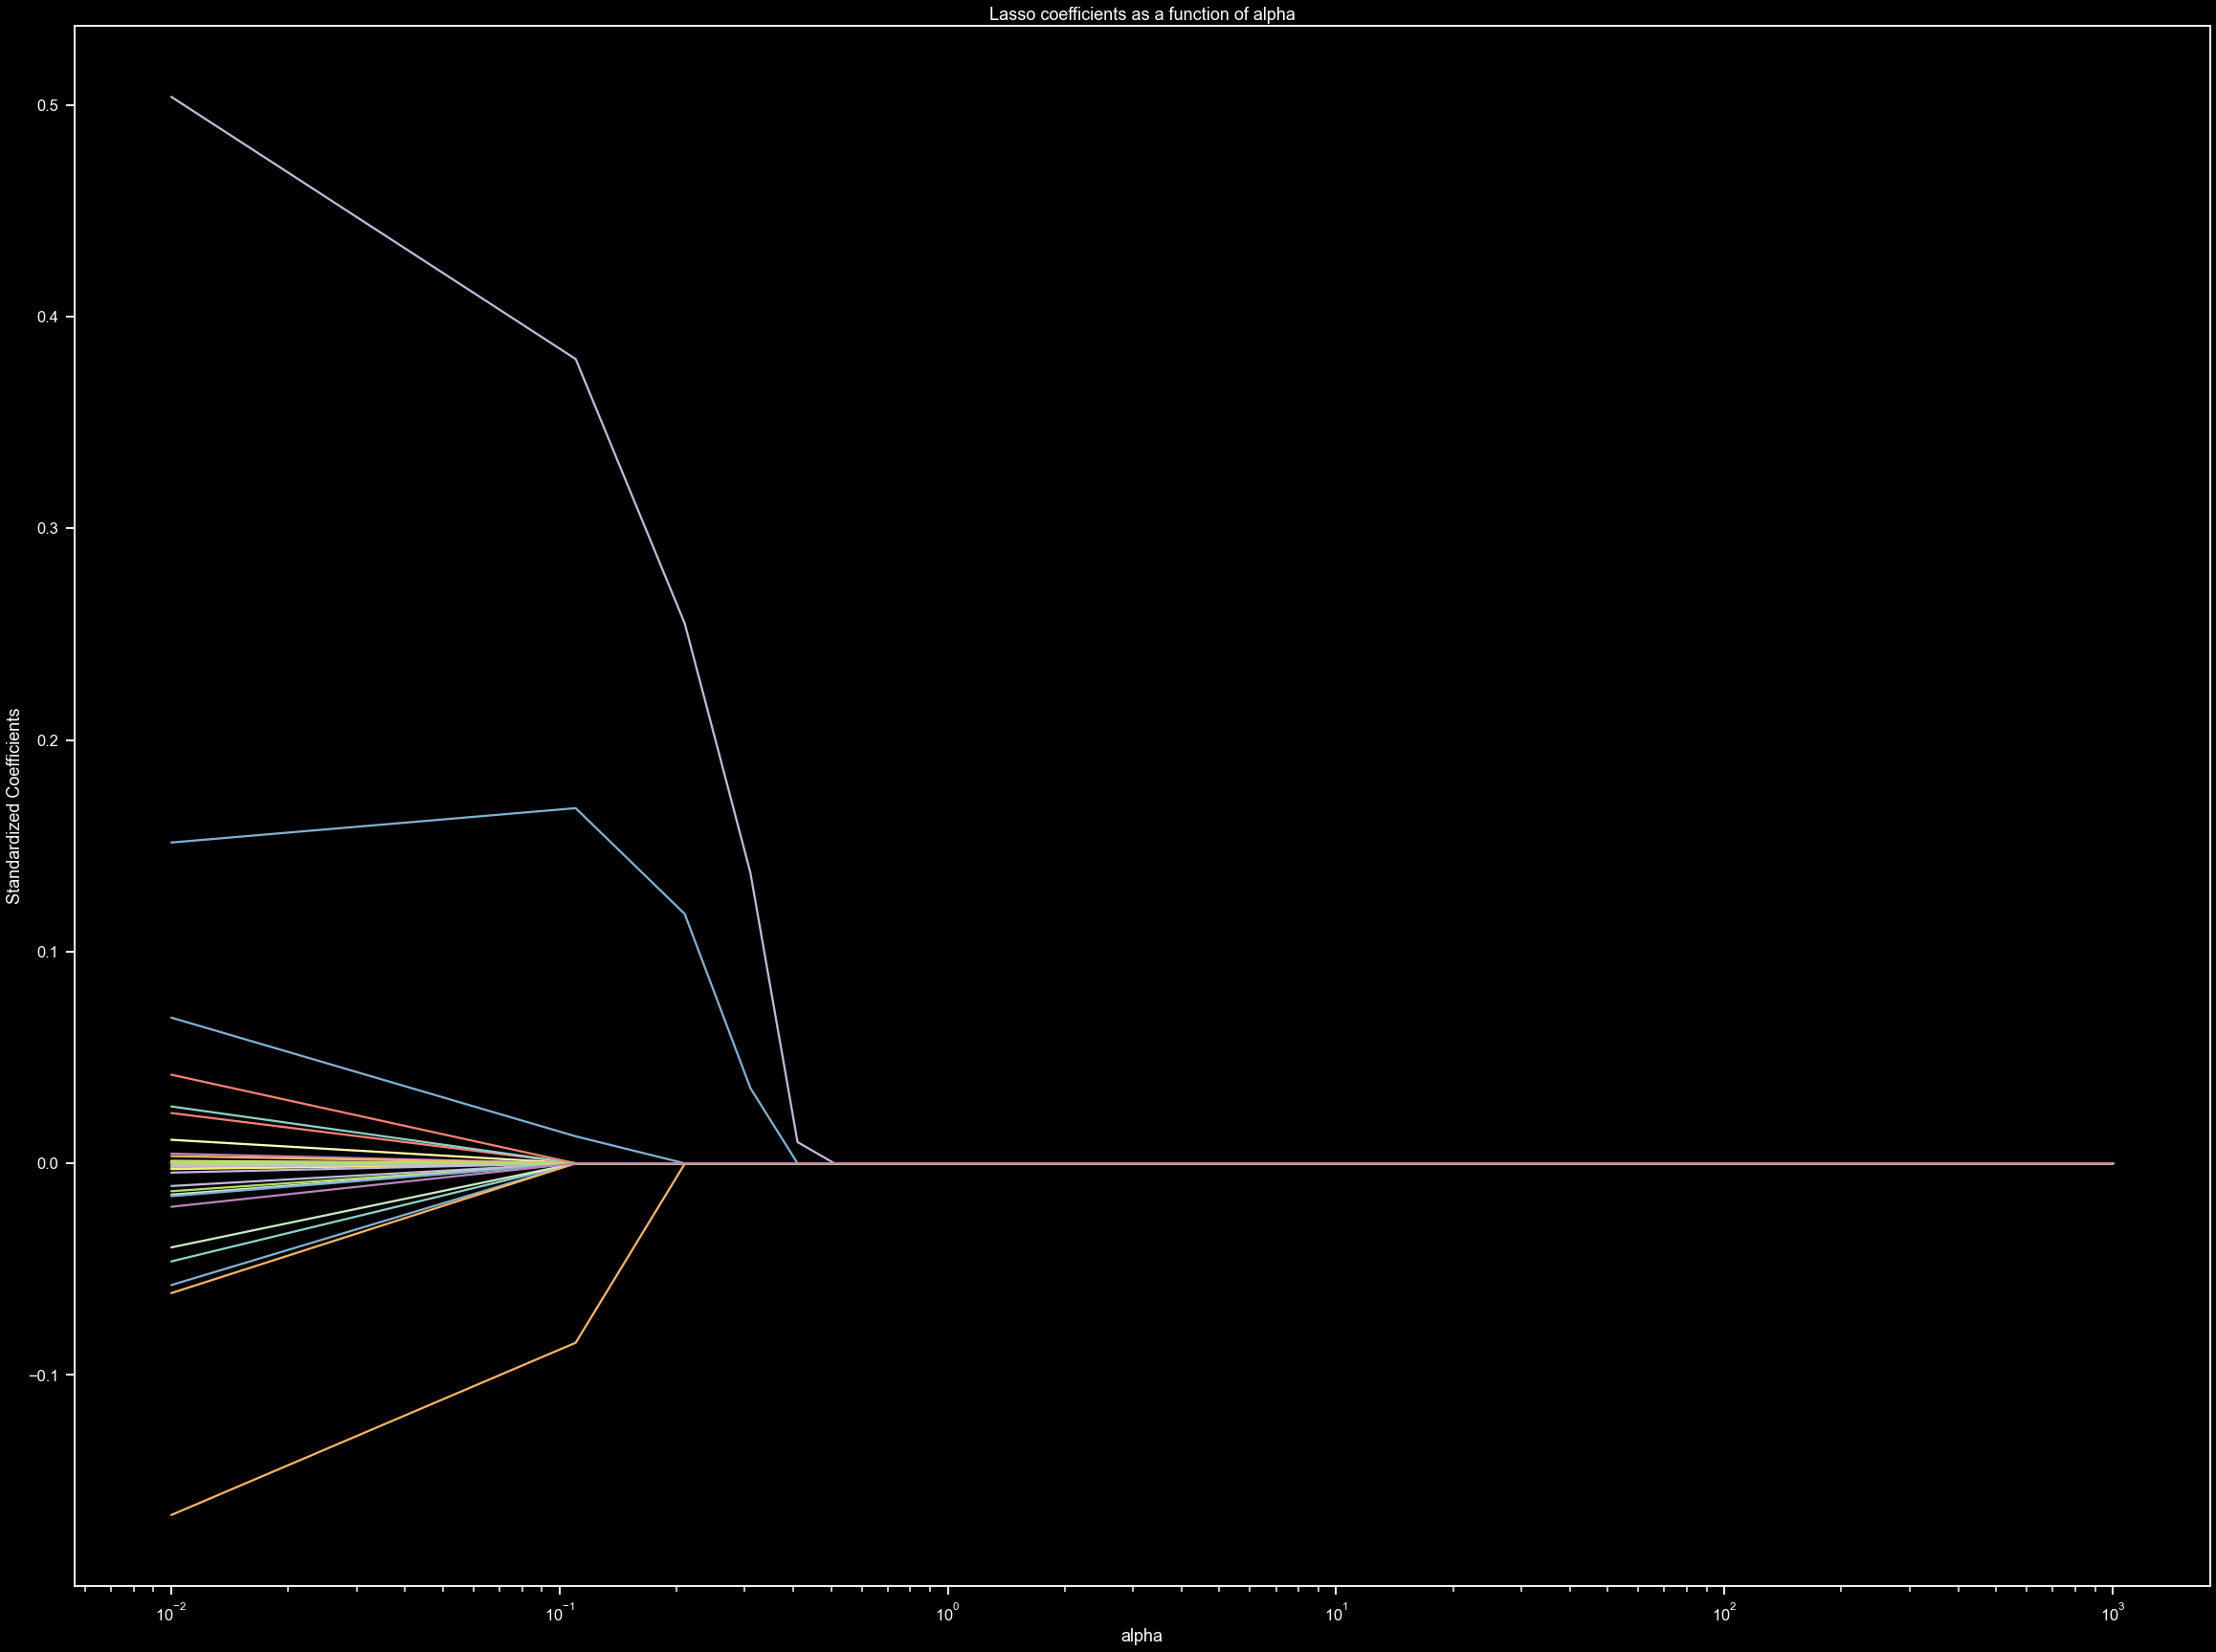

In [53]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

alphas = np.linspace(0.01,1000,10000)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xtrain, Ytrain)
    coefs.append(lasso.coef_)
fig=plt.figure(figsize=(40, 30))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [54]:

# define model
model = LassoCV(cv=20, max_iter=10000, random_state=0)
# fit model
model.fit(Xtrain, Ytrain)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.012750


In [55]:
LAS = Lasso(alpha=0.01)
LAS.fit(Xtrain, Ytrain)
print('R squared training set', round(LAS.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(LAS.score(Xtest, Ytest)*100, 2))

R squared training set 36.69
R squared test set 28.45


In [56]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = LAS.predict(Xtrain)
mse_train = mean_squared_error(Ytrain, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = LAS.predict(Xtest)
mse_test =mean_squared_error(Ytest, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.65
MSE test set 0.66


In [57]:
print(pd.DataFrame(list(zip(LAS.coef_, X))))

           0                1
0  -0.046339       Unnamed: 0
1   0.011117          ratings
2   0.503807          n_votes
3   0.000000  production_year
4  -0.057512          runtime
5  -0.166126     release_year
6  -0.013180             Time
7   0.004572           Comedy
8  -0.039715            Drama
9  -0.002723          Romance
10  0.000000      Documentary
11  0.001135          History
12 -0.010714            Music
13  0.023761           Action
14  0.068834        Adventure
15  0.003379          Fantasy
16  0.000000          Western
17 -0.000000           Horror
18 -0.014791           Sci-Fi
19 -0.002460          Mystery
20  0.026873           Family
21 -0.000000            Crime
22 -0.004381         Thriller
23  0.000000        Animation
24 -0.015521          Musical
25  0.000000            Sport
26  0.000837            Short
27  0.000000        Biography
28  0.000000       Reality-TV
29 -0.001357              War
30 -0.001463             News
31  0.000000        Film-Noir
32 -0.0015

(0.00034272692634795083,
 0.6838301204671811,
 0.08827669331144206,
 2.494421323254187)

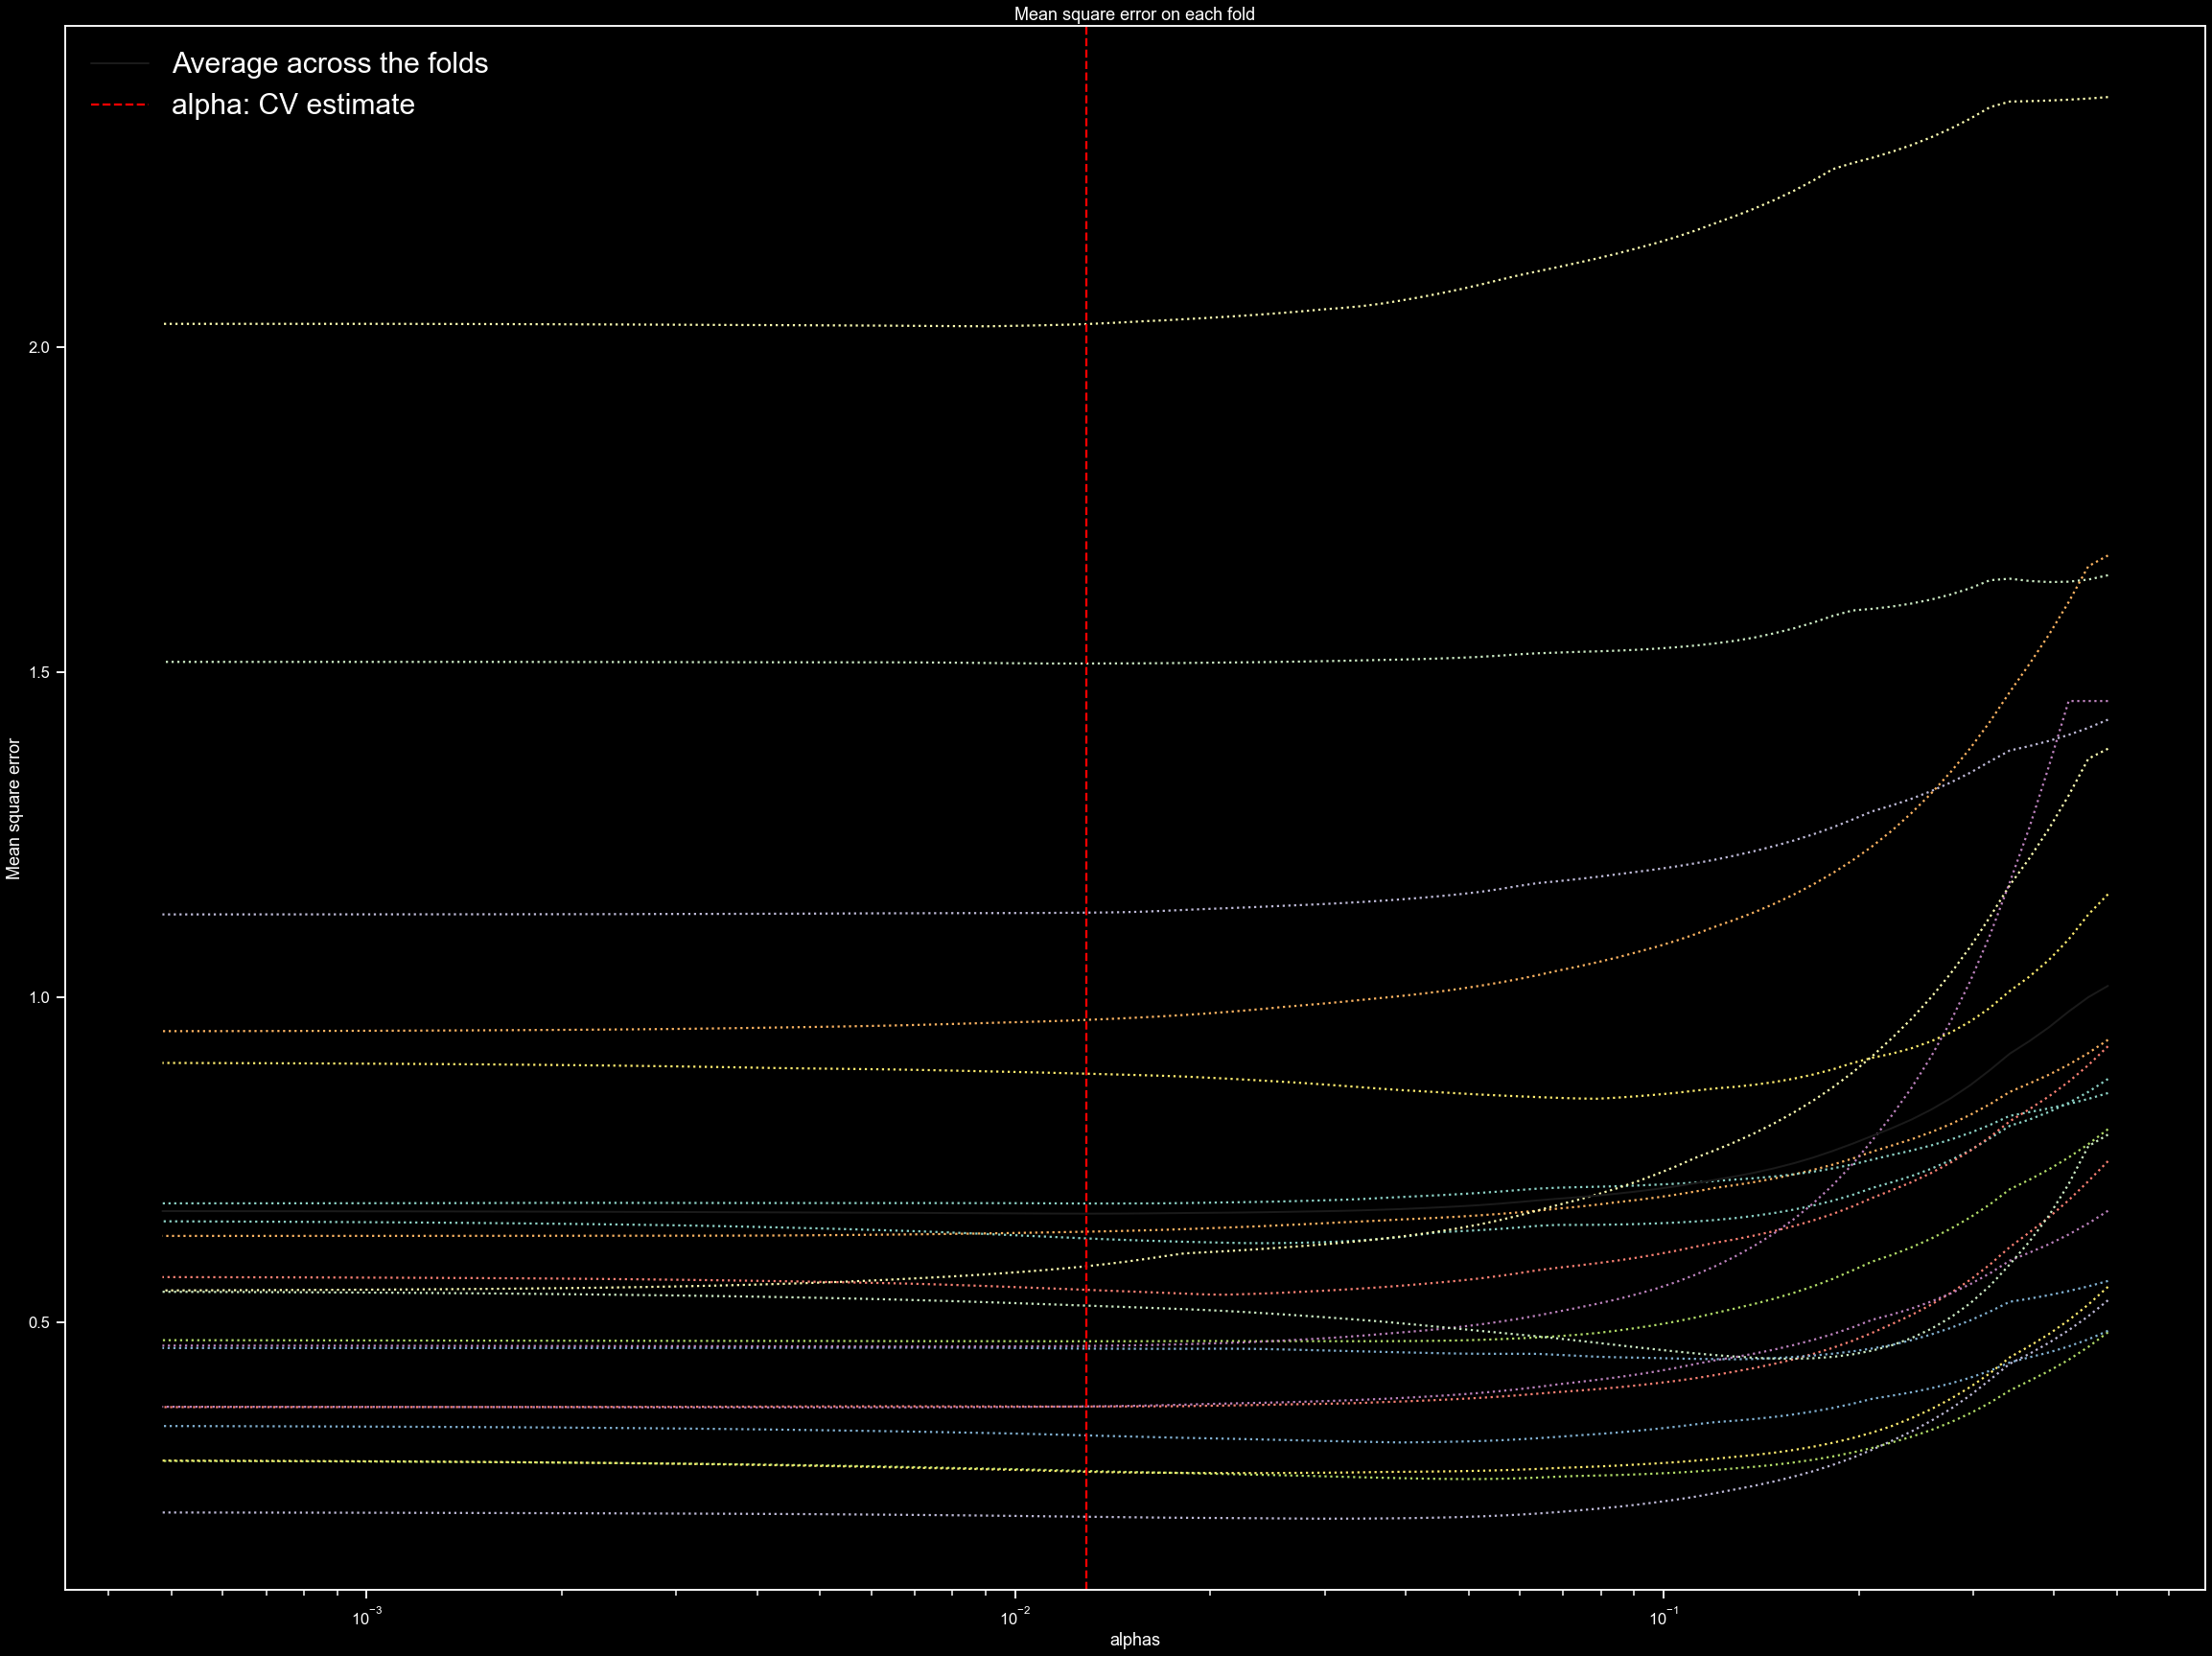

In [58]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(Xtrain, Ytrain)

lasso = model[-1]
fig=plt.figure(figsize=(40, 30))
plt.semilogx(lasso.alphas_, lasso.mse_path_, ":")
plt.plot(
    lasso.alphas_ ,
    lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2
)
plt.axvline(
    lasso.alpha_, linestyle="--", color="Red", label="alpha: CV estimate"
)
plt.legend(fontsize=30)
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

### Elastic Net

In [59]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Elastic = ElasticNet(random_state=0)
model = ElasticNet()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(Xtrain, Ytrain)

In [60]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.390
Config: {'alpha': 0.1, 'l1_ratio': 0.33}


In [61]:
model = ElasticNet(alpha=0.1, l1_ratio=0.31)
model.fit(Xtrain, Ytrain)
print(model.coef_)
print(model.intercept_)

[-0.03465183  0.00198022  0.43384614 -0.         -0.02962523 -0.14022096
 -0.00320387  0.         -0.02636403 -0.         -0.          0.
 -0.          0.01279334  0.06336923  0.          0.         -0.
 -0.         -0.          0.01131586 -0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.         -0.          0.02649571  0.15905234 -0.04652473
  0.         -0.00130683]
0.006319780369741386


In [62]:
model = ElasticNetCV(cv = 5).fit(Xtrain,Ytrain)
print(model.alpha_)
print(model.coef_)

0.03143740461528067
[-4.29664031e-02  8.60237732e-03  4.84615526e-01  0.00000000e+00
 -5.00830513e-02 -1.58998622e-01 -1.02462626e-02  1.68974418e-03
 -3.60044122e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.63508768e-03  2.02097318e-02  6.78828213e-02  4.11636444e-04
  0.00000000e+00 -0.00000000e+00 -5.80546821e-03 -0.00000000e+00
  2.33723332e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.06007192e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.77383511e-02  1.54438076e-01 -5.65177723e-02
  0.00000000e+00 -1.48779501e-02]


In [63]:
Elasticfinal = ElasticNet(alpha = model.alpha_).fit(Xtrain,Ytrain)
Ypred = Elasticfinal.predict(Xtest)
mean_squared_error(Ytest,Ypred)
print('R squared training set', round(Elasticfinal.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(Elasticfinal.score(Xtest, Ytest)*100, 2))

R squared training set 36.4
R squared test set 29.96


In [64]:
var = pd.DataFrame(list(zip(Elasticfinal.coef_, X)), columns = ["coef","name"])
var = var.loc[var['coef'] != 0]
var

coef          name
0  -0.042966    Unnamed: 0
1   0.008602       ratings
2   0.484616       n_votes
4  -0.050083       runtime
5  -0.158999  release_year
6  -0.010246          Time
7   0.001690        Comedy
8  -0.036004         Drama
12 -0.005635         Music
13  0.020210        Action
14  0.067883     Adventure
15  0.000412       Fantasy
18 -0.005805        Sci-Fi
20  0.023372        Family
24 -0.010601       Musical
33  0.037738     Talk-Show
34  0.154438        Leader
35 -0.056518         Small
37 -0.014878   Independent

Alpha:0.0001, R2:0.36, MSE:0.64, RMSE:0.80
Alpha:0.0010, R2:0.36, MSE:0.64, RMSE:0.80
Alpha:0.0100, R2:0.36, MSE:0.64, RMSE:0.80
Alpha:0.1000, R2:0.33, MSE:0.67, RMSE:0.82
Alpha:0.3000, R2:0.26, MSE:0.74, RMSE:0.86
Alpha:0.5000, R2:0.17, MSE:0.83, RMSE:0.91
Alpha:0.7000, R2:0.07, MSE:0.93, RMSE:0.96
Alpha:1.0000, R2:0.00, MSE:1.00, RMSE:1.00
R2:0.300, MSE:0.64, RMSE:0.80


C:\Users\desktop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.546e+01, tolerance: 3.628e-01
  model = cd_fast.enet_coordinate_descent(


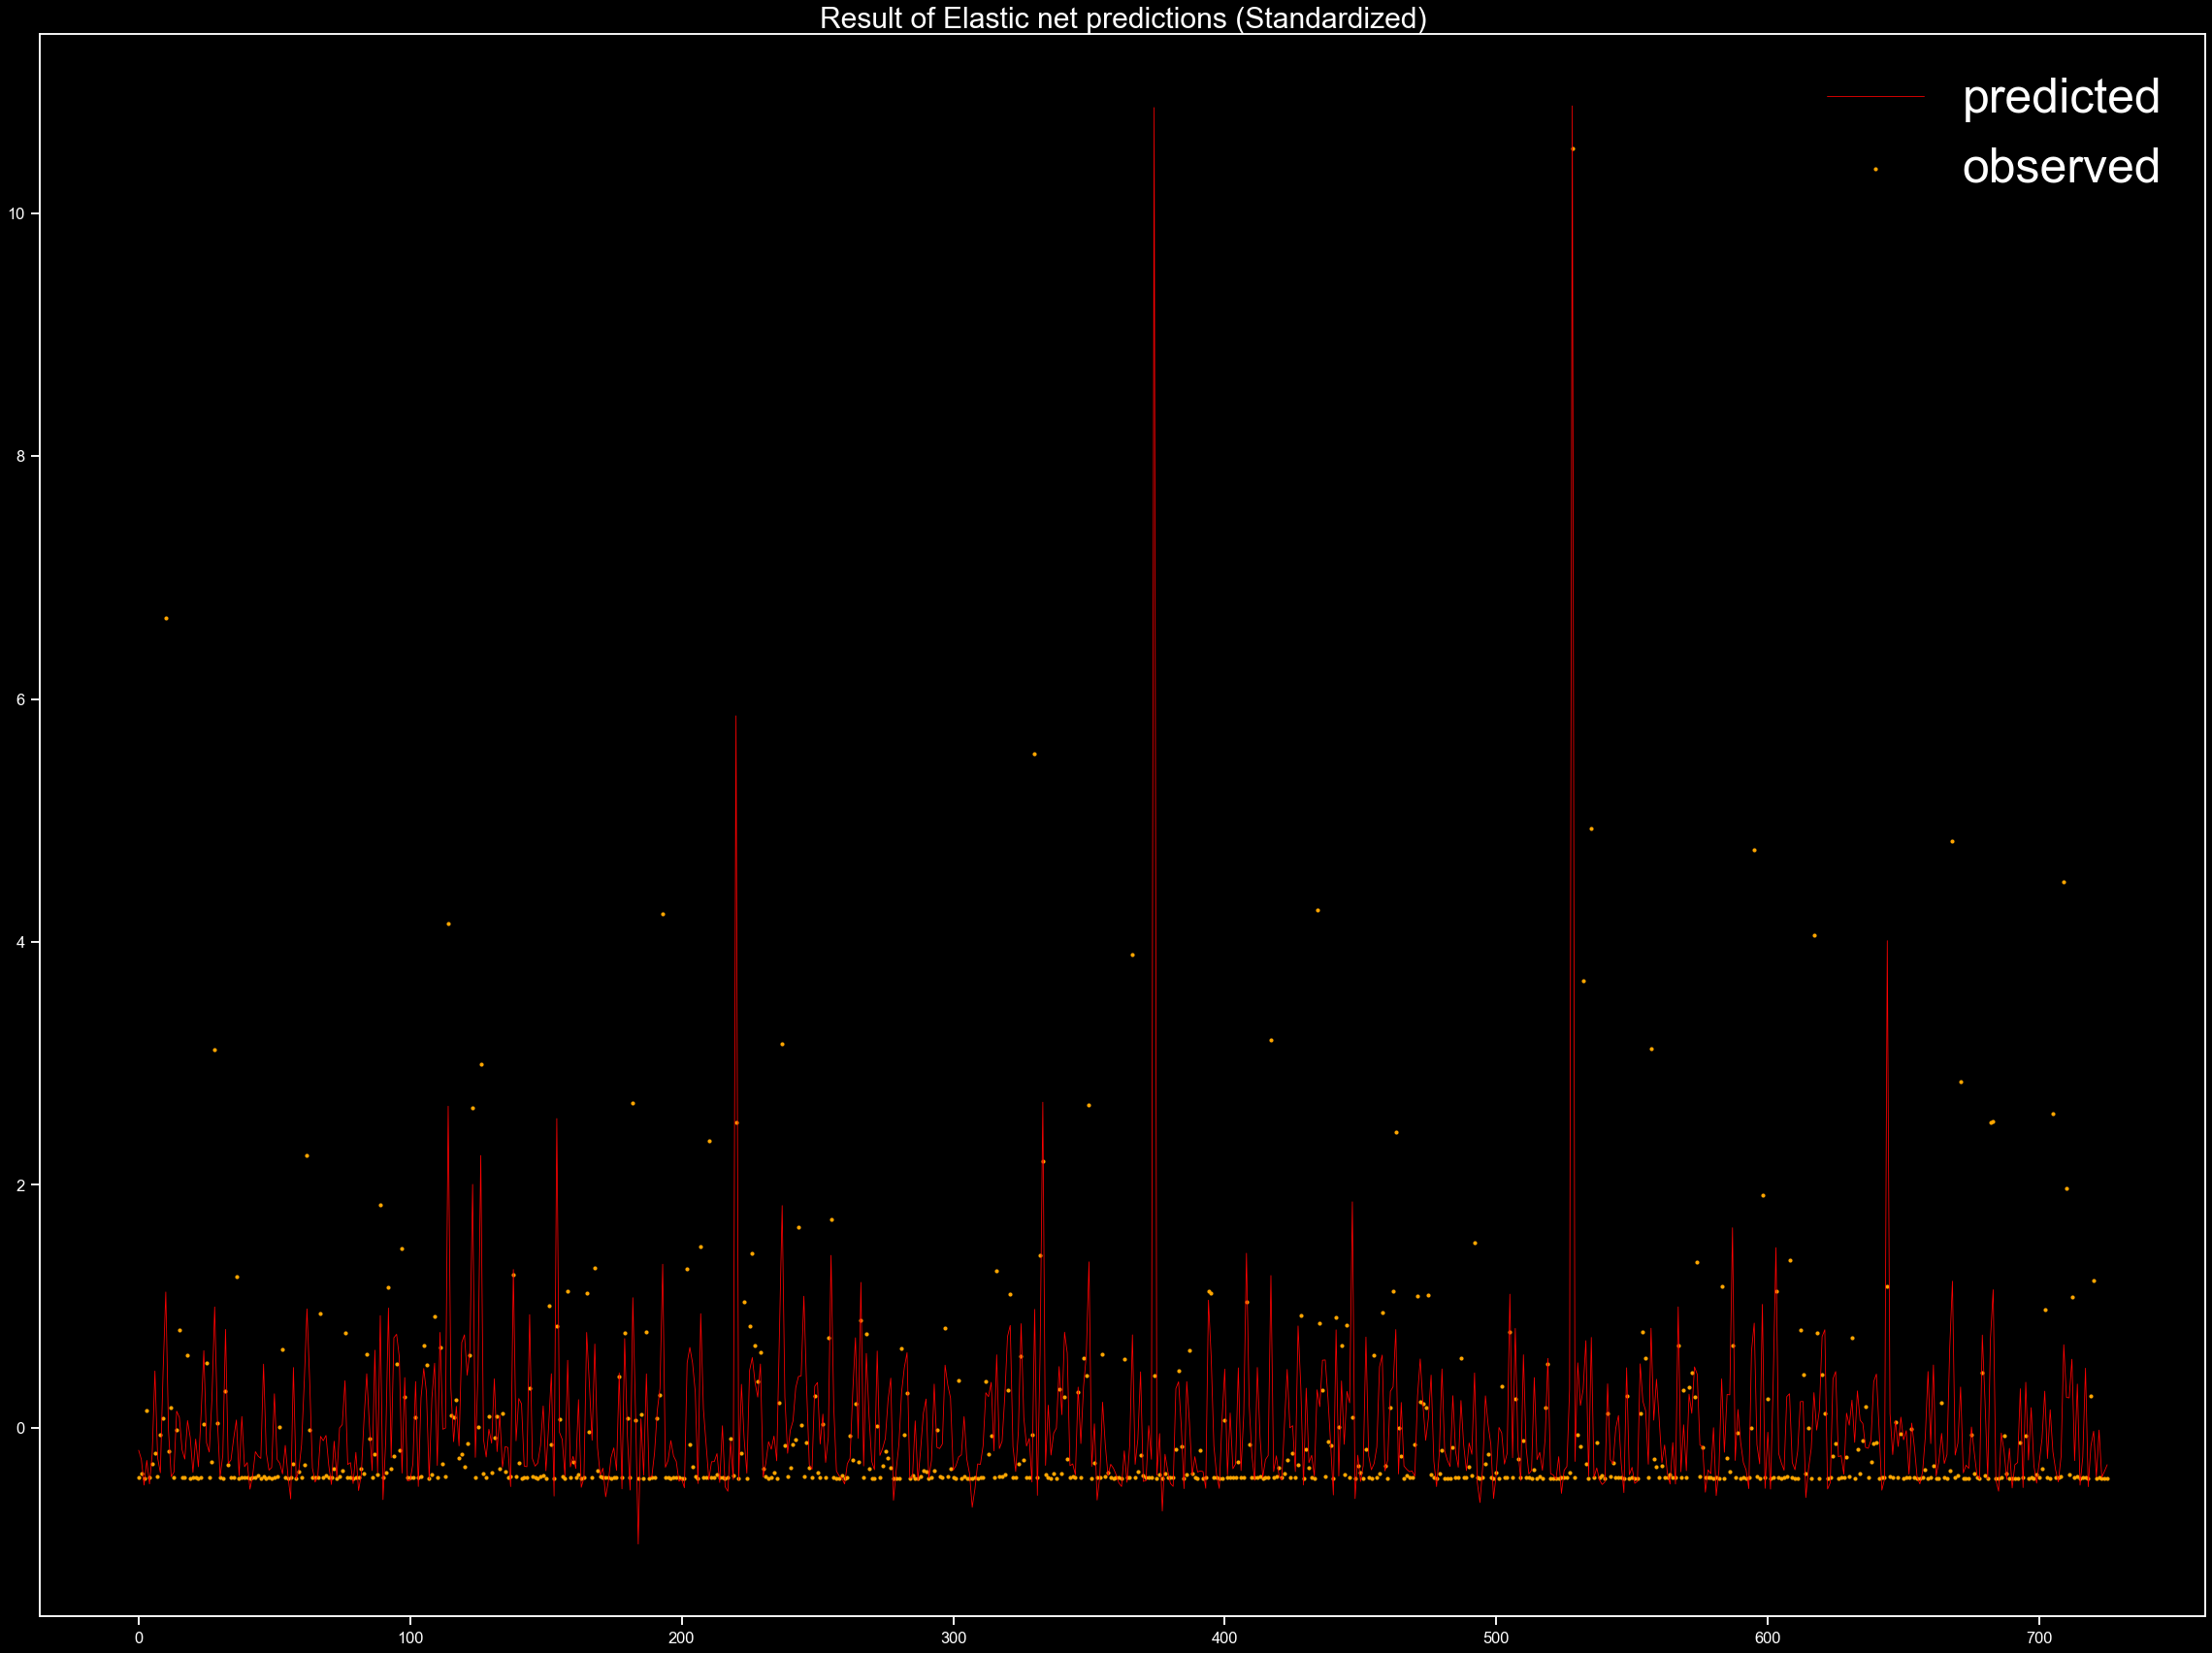

In [65]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model1 = ElasticNet(alpha=a).fit(X,Y)   
    score = model1.score(X, Y)
    pred_y = model1.predict(X)
    mse = mean_squared_error(Y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=model.alpha_).fit(Xtrain, Ytrain)
ypred = elastic.predict(Xtest)
score = elastic.score(Xtest, Ytest)
mse = mean_squared_error(Ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
fig=plt.figure(figsize=(40, 30))
x_ax = range(len(Xtest))
plt.scatter(x_ax, Ytest, s=7, color="orange", label="observed")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title('Result of Elastic net predictions (Standardized)',fontsize=30)
plt.legend(fontsize=50)
plt.show()


## Target feature transformation and glm

### Recode 'n_votes' with log

In [66]:
dataindependent2 = dataindependent
dataindependent2['Log_n_votes'] = [np.log(x) for x in dataindependent2['n_votes']]
dataindependent2['Log_Revenue'] = [np.log(x) for x in dataindependent2['Revenue']]
del dataindependent2["n_votes"]
del dataindependent2["Revenue"]
dataindependent2

Unnamed: 0  ratings  production_year  runtime  release_year  Time  \
0           2512      6.2             1991      104        1991.0   1.0   
1           5795      7.7             2005      118        2005.0   1.0   
2             38      5.8             2009      119        2009.0   1.0   
3           8056      7.7             1959       30        1993.0  35.0   
4           6753      7.3             1988       94        1988.0   1.0   
...          ...      ...              ...      ...           ...   ...   
3623         668      7.1             2006      135        2006.0   1.0   
3624         223      5.1             1997       82        1997.0   1.0   
3625        4459      6.8             2007      100        2007.0   1.0   
3626        1517      4.5             1995      100        1995.0   1.0   
3627        5439      6.5             2006      100        2006.0   1.0   

      Comedy  Drama  Romance  Documentary  ...  News  Film-Noir  Game-Show  \
0          1      1        1            0  ...     0          0          0   
1          0      0        0            1  ...     0          0          0   
2          0      0        0            0  ...     0          0          0   
3          0      0        0            0  ...     0          0          0   
4          0      0        0            0  ...     0          0          0   
...      ...    ...      ...          ...  ...   ...        ...        ...   
3623       0      1        0            0  ...     0          0          0   
3624       1      0        0            0  ...     0          0          0   
3625       0      1        1            0  ...     0          0          0   
3626       1      0        1            0  ...     0          0          0   
3627       0      1        0            0  ...     0          0          0   

      Talk-Show  Leader  Small  Middle  Independent  Log_n_votes  Log_Revenue  
0             0       1      0       0            0    10.419868    18.590577  
1             0       0      1       0            0     6.472346    14.022386  
2             0       1      0       0            0    10.680447    16.761833  
3             0       0      1       0            0     2.772589    10.530080  
4             0       1      0       0            0    11.622676    17.292862  
...         ...     ...    ...     ...          ...          ...          ...  
3623          0       0      1       0            0    11.679533    17.708761  
3624          0       0      0       1            0     7.569412    11.845844  
3625          0       0      0       0            1     9.998980     8.146830  
3626          0       0      1       0            0     7.883446    15.490266  
3627          0       0      1       0            0     9.942179    14.710121  

[3628 rows x 39 columns]

<AxesSubplot:xlabel='Log_n_votes', ylabel='Density'>

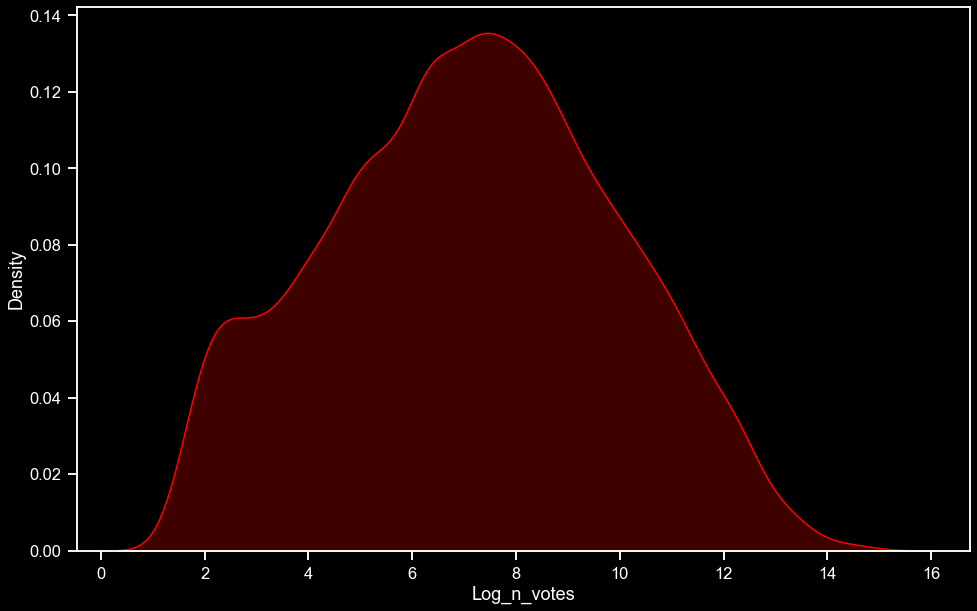

In [74]:
plt.figure(figsize=(16, 10))

sns.kdeplot(dataindependent2['Log_n_votes'], bw_adjust=0.8, color = 'Red', fill = True)

In [75]:
scaler = StandardScaler()
dataindependent3 = scaler.fit_transform(dataindependent2)
dataindependentScaled = pd.DataFrame(dataindependent3, columns = dataindependent.columns.values)
X = dataindependentScaled.drop("Log_Revenue", axis= 1)
Y = dataindependentScaled["Log_Revenue"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

0.653164506900707
0.5730622031077364
0.6492662222862272
0.5792709758746406


C:\Users\desktop\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".g" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\desktop\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".g" (-> color='g'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


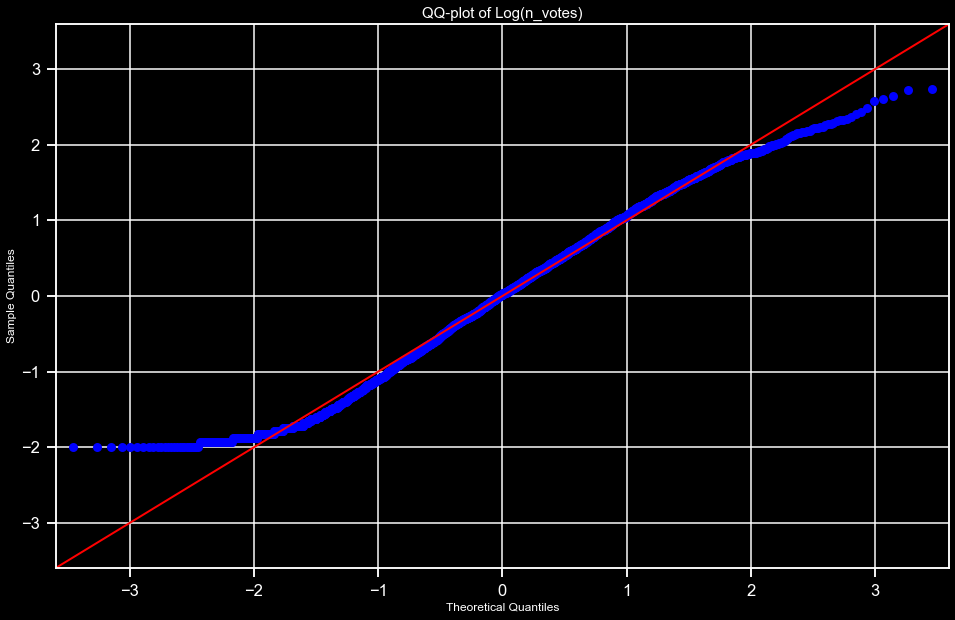

In [76]:
import scipy.stats as stats
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_train_lr= lr.predict(Xtrain)
print(np.sqrt(mean_squared_error(Ytrain,pred_train_lr)))
print(r2_score(Ytrain, pred_train_lr))

pred_test_lr= lr.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred_test_lr))) 
print(r2_score(Ytest, pred_test_lr))
fig, ax = plt.subplots(1, figsize=(16,10))

sm.qqplot(dataindependentScaled['Log_n_votes'],line='45',fit=True,dist=stats.norm, color='Orange',fmt='.g', ax=ax)

ax.grid()
ax.set_title('QQ-plot of Log(n_votes)',fontsize=15)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
ax.get_lines()[1].set_color("red")
ax.get_lines()[1].set_linewidth("2")
plt.show()

C:\Users\desktop\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".g" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


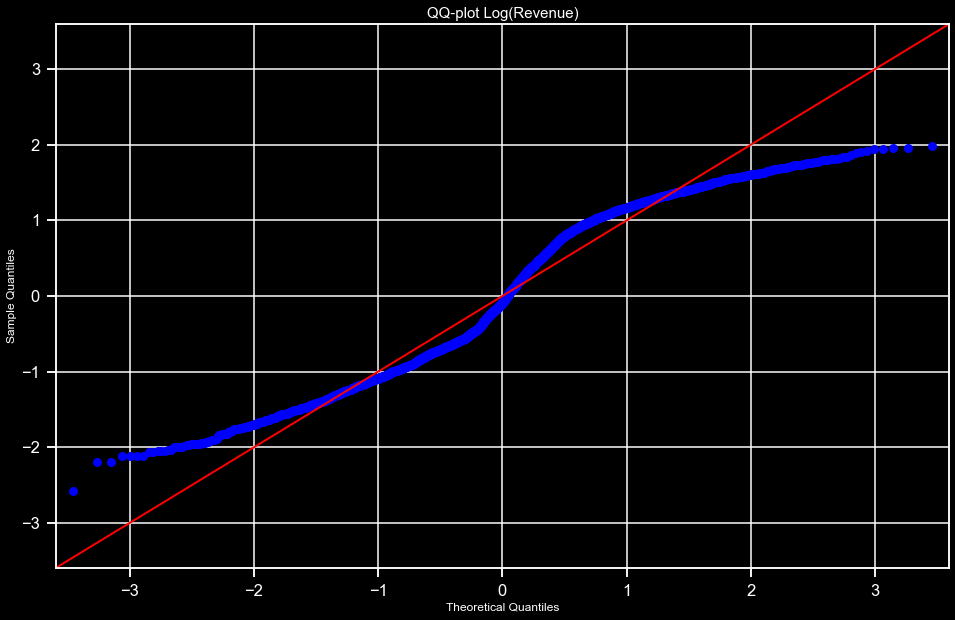

In [77]:
fig, ax = plt.subplots(1, figsize=(16,10))
sm.qqplot(dataindependentScaled['Log_Revenue'],line='45',fit=True,dist=stats.norm,fmt='.g', ax=ax)

ax.grid()
ax.set_title('QQ-plot Log(Revenue)',fontsize=15)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
ax.get_lines()[1].set_color("red")
ax.get_lines()[1].set_linewidth("2")
plt.show()

In [78]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_train_lr= lr.predict(Xtrain)
print(np.sqrt(mean_squared_error(Ytrain,pred_train_lr)))
print(r2_score(Ytrain, pred_train_lr))

pred_test_lr= lr.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred_test_lr))) 
print(r2_score(Ytest, pred_test_lr))


0.653164506900707
0.5730622031077364
0.6492662222862272
0.5792709758746406


In [79]:
model = ElasticNetCV(cv = 10).fit(Xtrain,Ytrain)
print(model.alpha_)

0.01566397018320853


In [80]:
Elasticfinal = ElasticNet(alpha = model.alpha_).fit(Xtrain,Ytrain)
Ypred = Elasticfinal.predict(Xtest)
mean_squared_error(Ytest,Ypred)
print('R squared training set', round(Elasticfinal.score(Xtrain, Ytrain)*100, 2))
print('R squared test set', round(Elasticfinal.score(Xtest, Ytest)*100, 2))

R squared training set 57.13
R squared test set 57.5


Alpha:0.0001, R2:0.58, MSE:0.42, RMSE:0.65
Alpha:0.0010, R2:0.58, MSE:0.42, RMSE:0.65
Alpha:0.0100, R2:0.57, MSE:0.43, RMSE:0.65
Alpha:0.1000, R2:0.54, MSE:0.46, RMSE:0.68
Alpha:0.3000, R2:0.44, MSE:0.56, RMSE:0.75
Alpha:0.5000, R2:0.32, MSE:0.68, RMSE:0.82
Alpha:0.7000, R2:0.18, MSE:0.82, RMSE:0.91
Alpha:1.0000, R2:0.03, MSE:0.97, RMSE:0.98
R2:0.575, MSE:0.43, RMSE:0.65


C:\Users\desktop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.774e+01, tolerance: 3.628e-01
  model = cd_fast.enet_coordinate_descent(


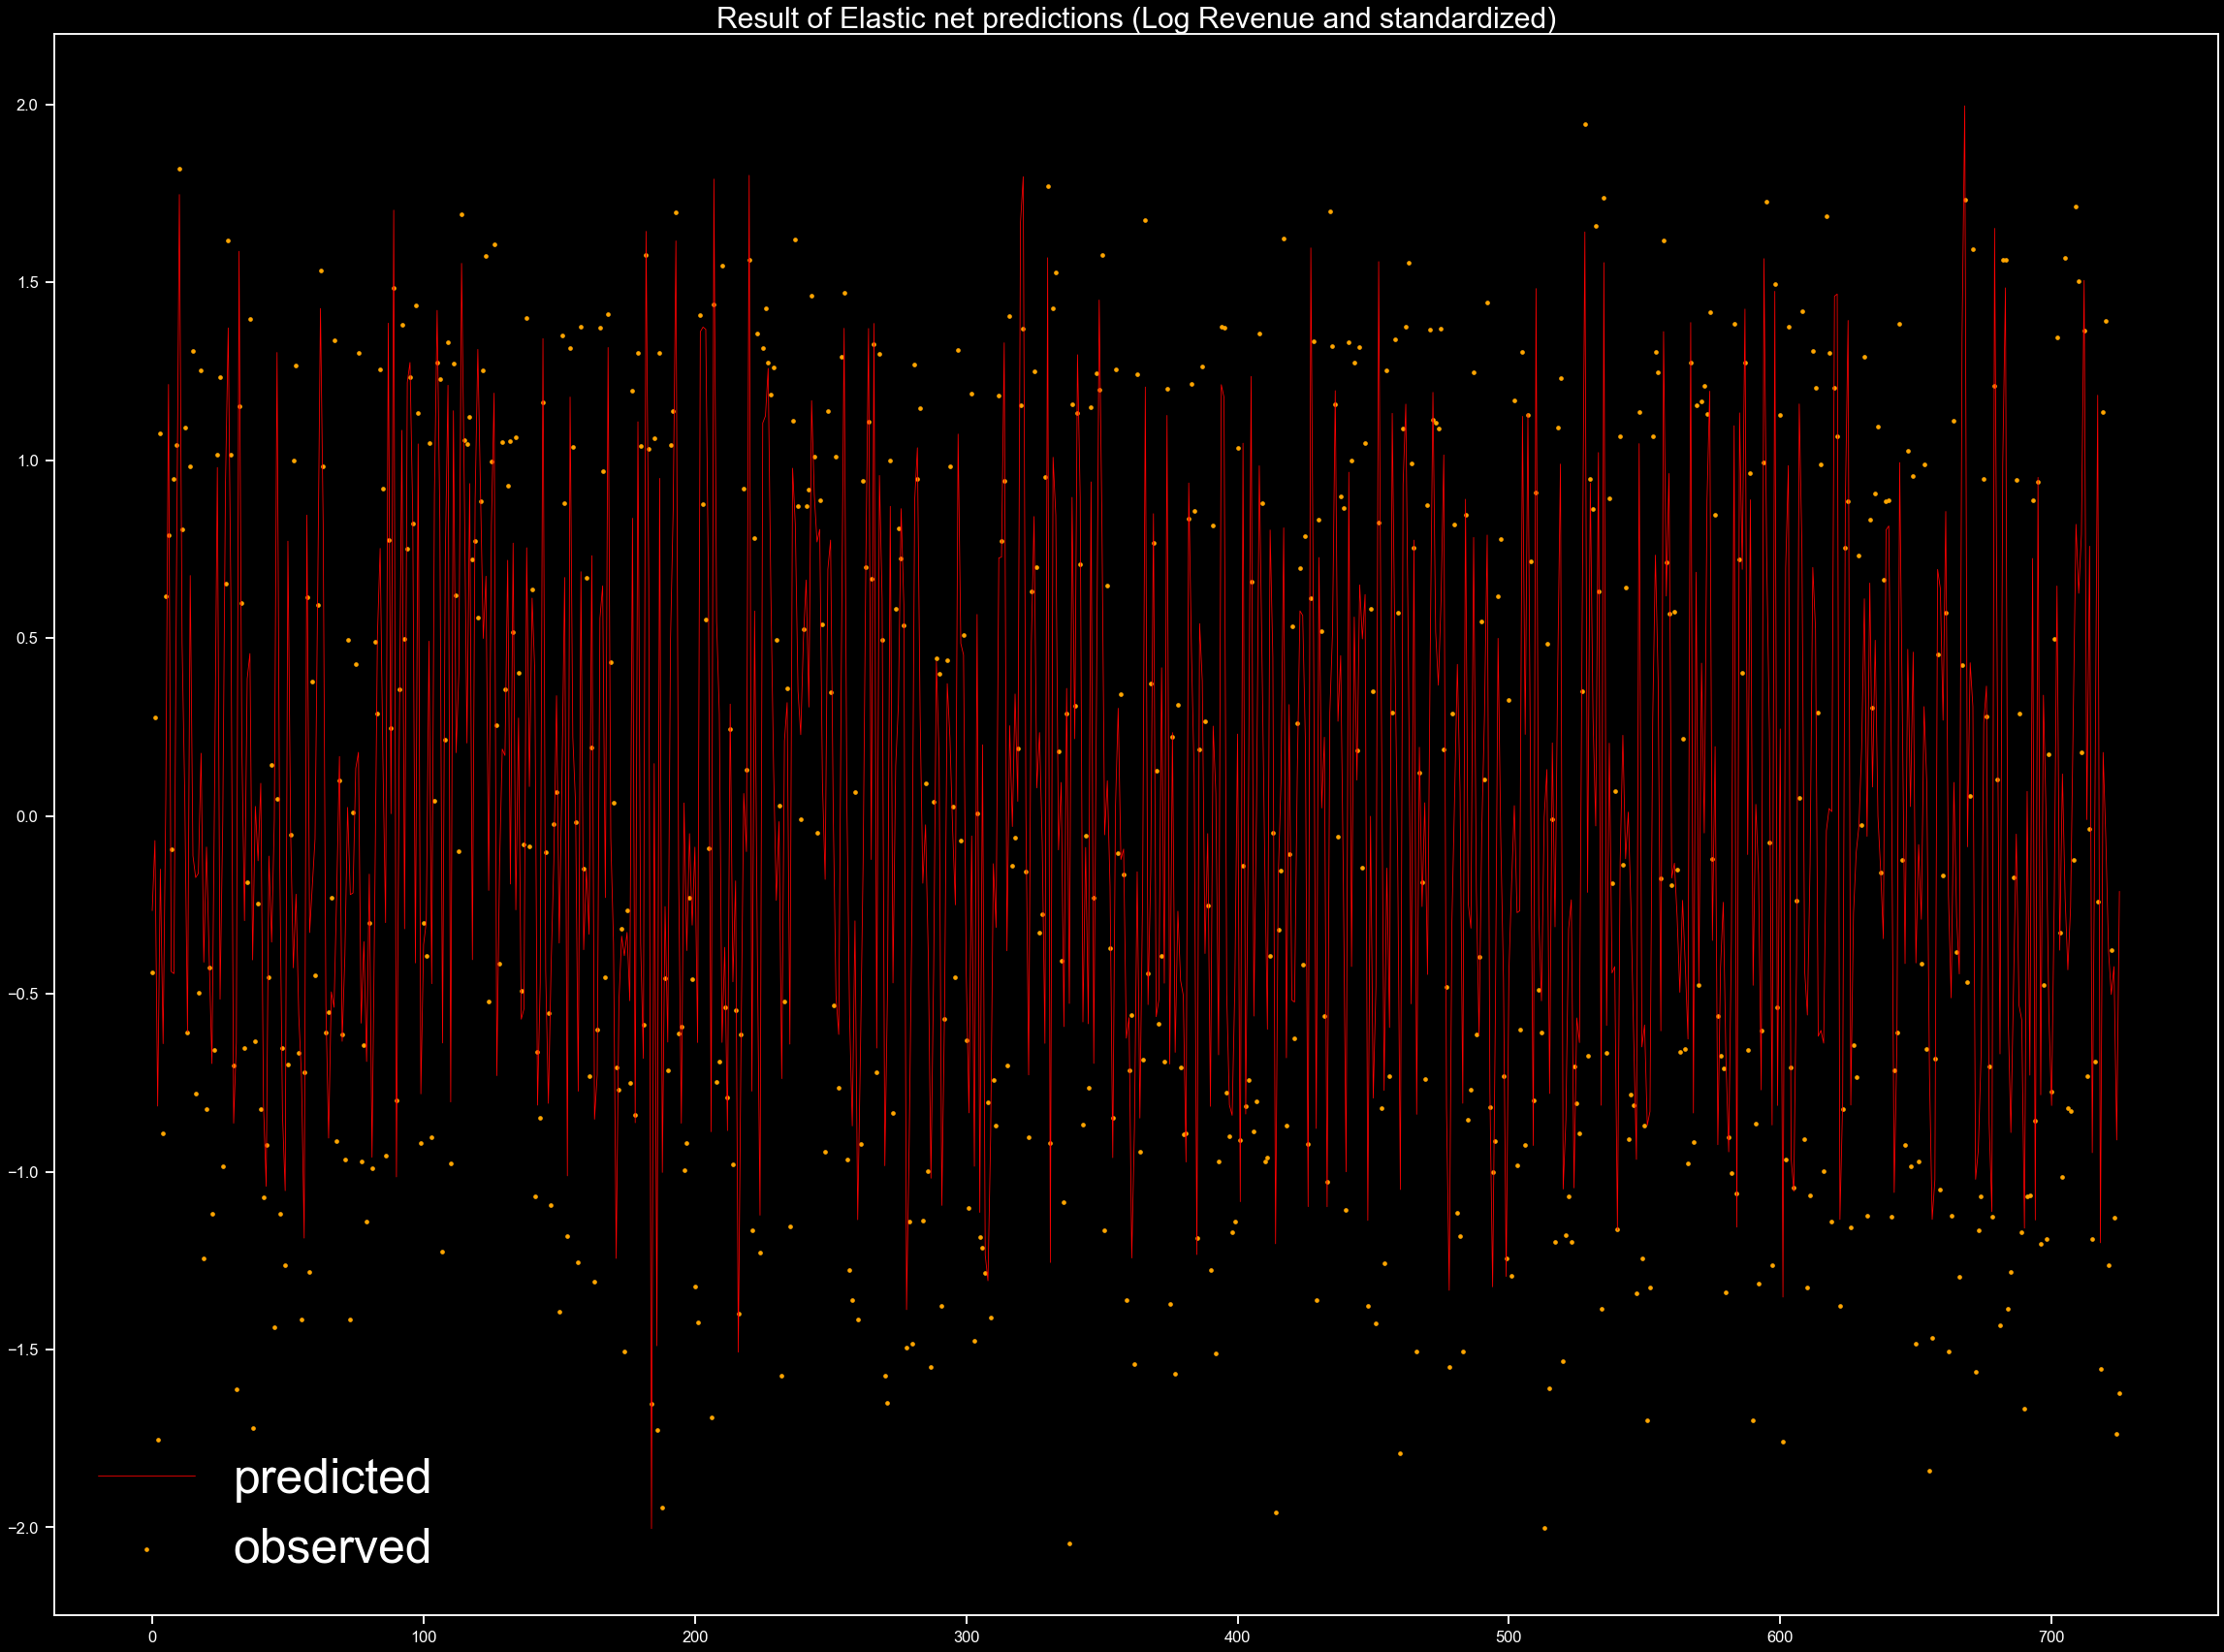

In [81]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model1 = ElasticNet(alpha=a).fit(X,Y)   
    score = model1.score(X, Y)
    pred_y = model1.predict(X)
    mse = mean_squared_error(Y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=model.alpha_).fit(Xtrain, Ytrain)
ypred = elastic.predict(Xtest)
score = elastic.score(Xtest, Ytest)
mse = mean_squared_error(Ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
fig=plt.figure(figsize=(40, 30))
x_ax = range(len(Xtest))
plt.scatter(x_ax, Ytest, s=10, color="orange", label="observed")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.title('Result of Elastic net predictions (Log Revenue and standardized)',fontsize=30)
plt.legend(fontsize=50)
plt.show()

### Mixed GLM witht the studio feature that explain quantile bimodality

In [82]:
datamixed
del datamixed["Small"]

In [83]:
del datamixed["Middle"]
del datamixed["Leader"]
del datamixed["Independent"]

In [84]:
datamixed['Log_n_votes'] = [np.log(x) for x in datamixed['n_votes']]
datamixed['Log_Revenue'] = [np.log(x) for x in datamixed['Revenue']]

Text(0, 0.5, 'Log of the Revenue')

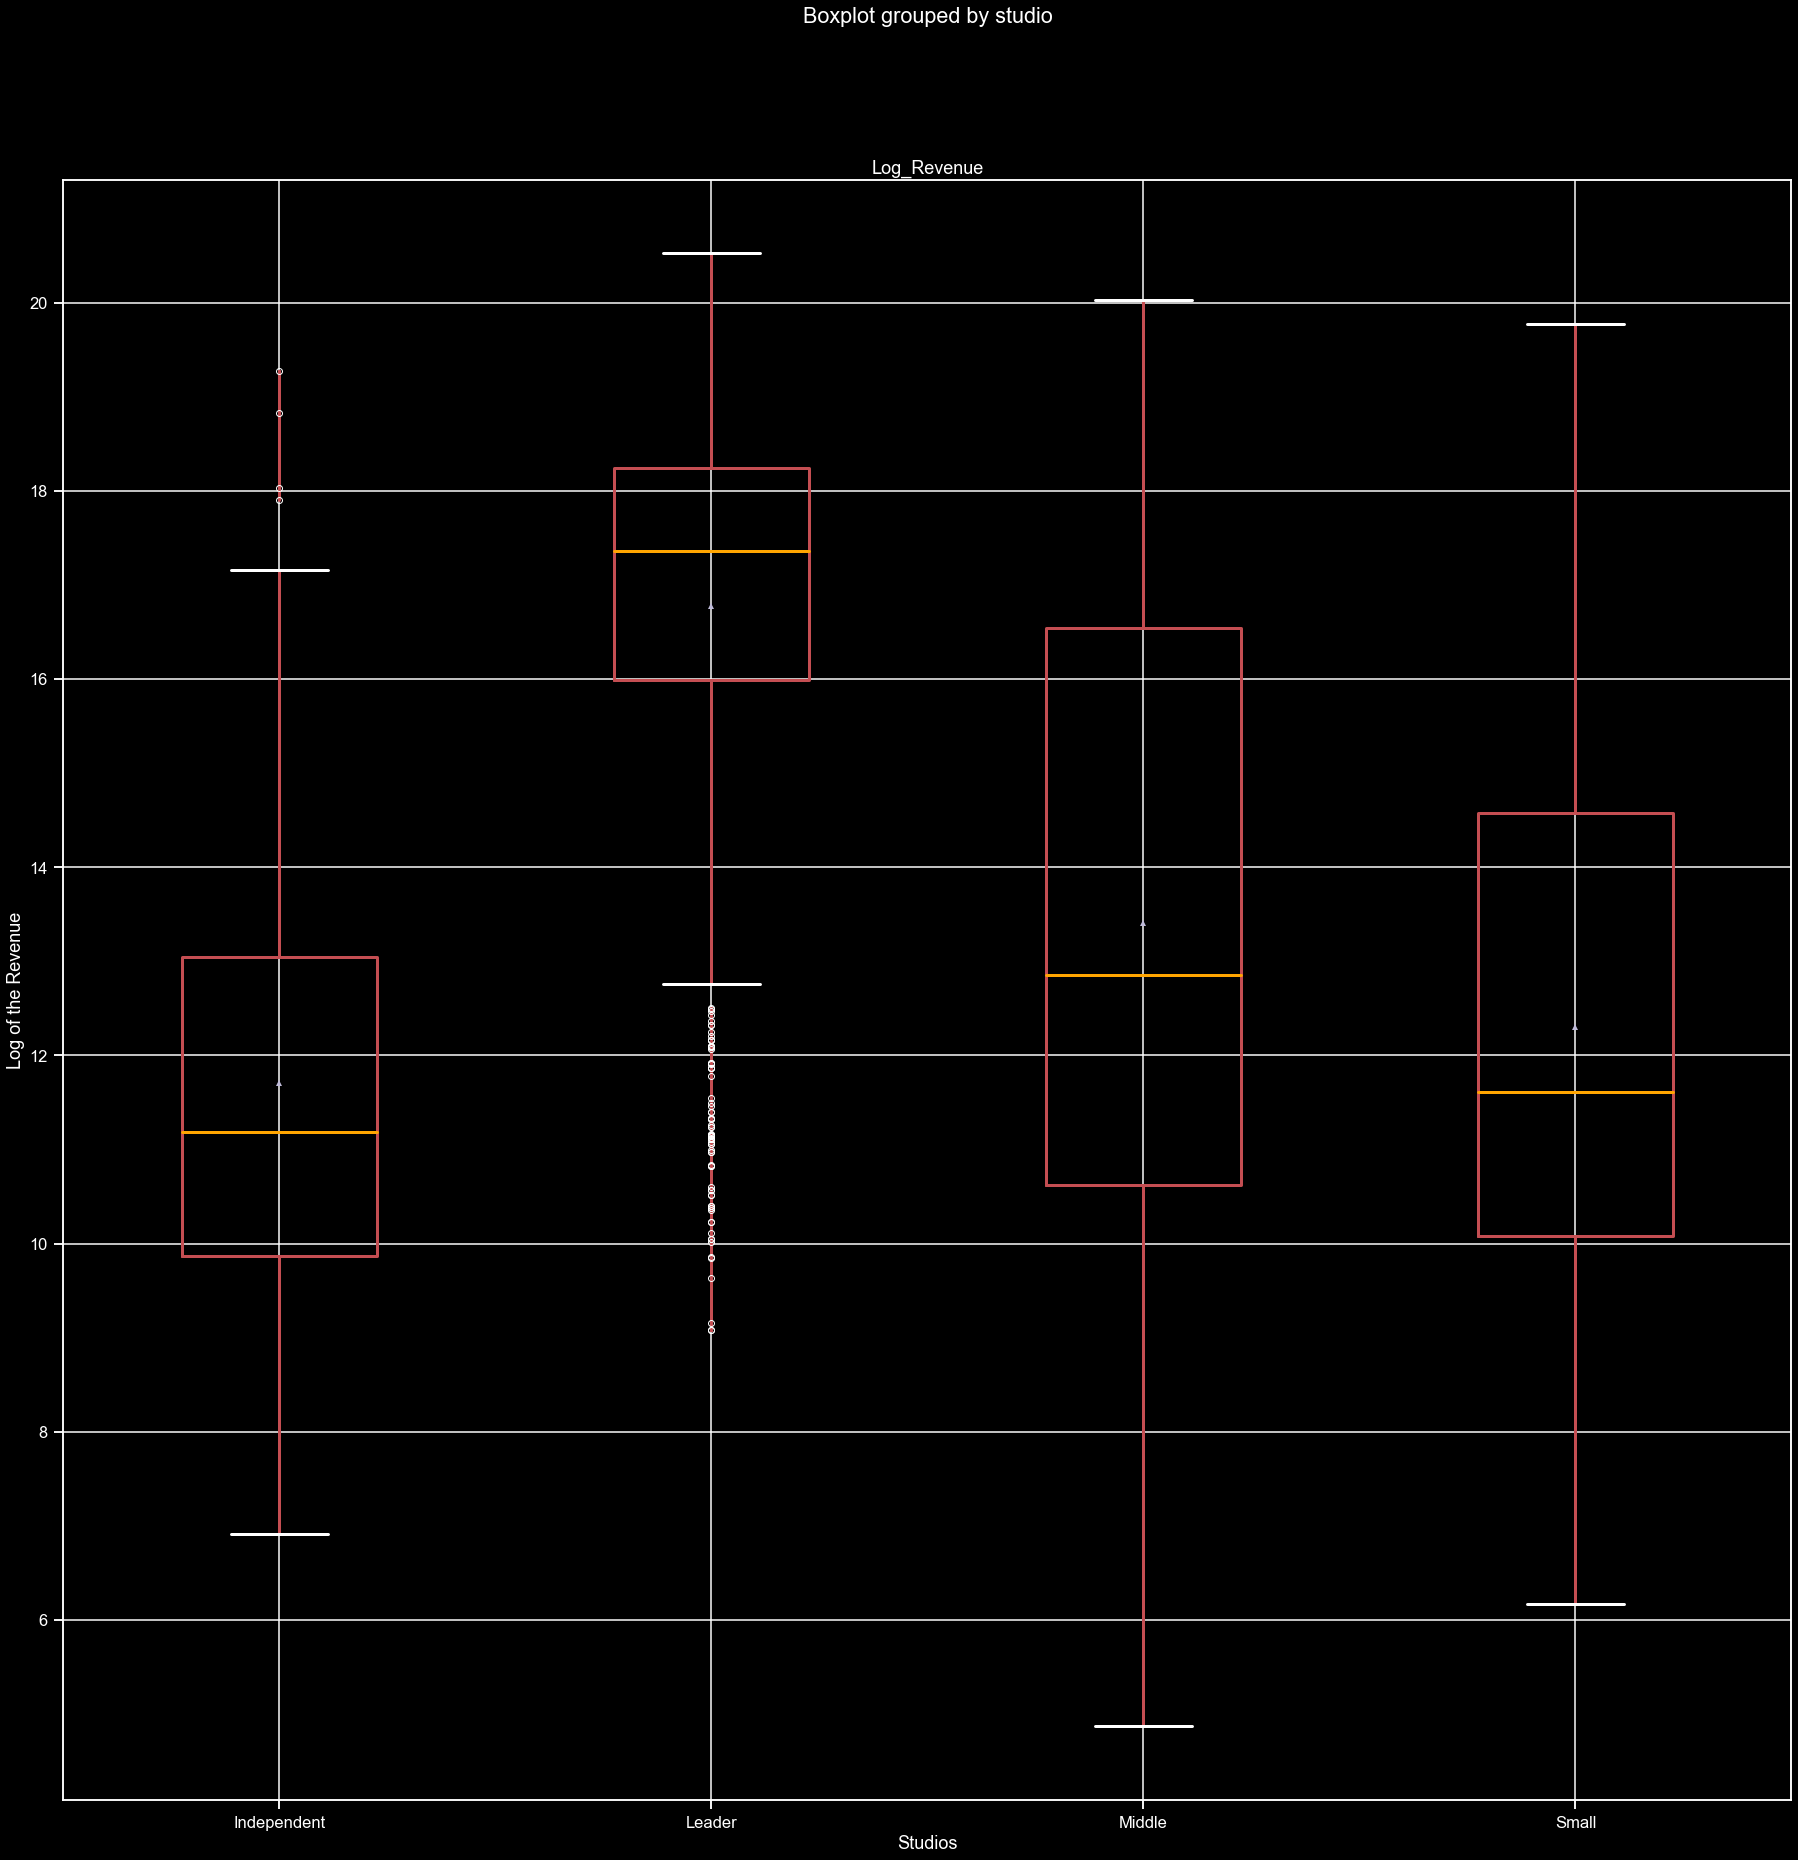

In [85]:
boxplot = datamixed.boxplot(["Log_Revenue"], by = ["studio"],
                                  boxprops=dict(linestyle='-', linewidth=3, color="r"),
                                  flierprops=dict(linestyle='-', linewidth=3,color="r"),
                                  medianprops=dict(linestyle='-', linewidth=3,color="orange"),
                                  whiskerprops=dict(linestyle='-', linewidth=3,color="r"),
                                  capprops=dict(linestyle='-', linewidth=3),
                     figsize = (30, 30),
                     showmeans = True,
                     notch = False)

boxplot.set_xlabel("Studios")
boxplot.set_ylabel("Log of the Revenue")

In [86]:
del datamixed["n_votes"]
del datamixed["Revenue"]

In [87]:
import statsmodels.formula.api as smf
model = smf.mixedlm("Log_Revenue ~ Unnamed: 0 + ratings + production_year + runtime + release_year + Log_n_votes + Adventure + Comedy + Drama + Family + Sport + Biography + Crime + Action +Thriller + Romance + Fantasy + Documentary +  Music + Animation +  Horror + Musical +  Mystery + History + War + Western + Short", datamixed, groups= "studio").fit() 
model.summary()    

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:               MixedLM  Dependent Variable:  Log_Revenue
No. Observations:    3628     Method:              REML       
No. Groups:          4        Scale:               5.8377     
Min. group size:     188      Log-Likelihood:      -8382.4903 
Max. group size:     1732     Converged:           Yes        
Mean group size:     907.0                                    
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept       202.909    9.768  20.772 0.000 183.763 222.054
ratings           0.314    0.038   8.319 0.000   0.240   0.388
production_year  -0.015    0.004  -3.796 0.000  -0.023  -0.007
runtime          -0.011    0.001  -7.996 0.000  -0.014  -0.009
release_year     -0.082    0.005 -17.746 0.000  -0.091  -0.073
Log_n_votes       0.475    0.020  24.341 0.000   0.437   0.513
Adventure         0.348    0.145   2.408 0.016   0.065   0.632
Comedy            0.268    0.110   2.437 0.015   0.052   0.483
Drama            -0.240    0.111  -2.175 0.030  -0.457  -0.024
Family            0.887    0.171   5.201 0.000   0.553   1.222
Sport             0.659    0.271   2.427 0.015   0.127   1.190
Biography         0.425    0.201   2.113 0.035   0.031   0.819
Crime             0.229    0.122   1.883 0.060  -0.009   0.468
Action            0.789    0.132   5.978 0.000   0.530   1.048
Thriller         -0.026    0.159  -0.167 0.868  -0.338   0.285
Romance           0.004    0.117   0.032 0.974  -0.226   0.234
Fantasy           0.235    0.189   1.238 0.216  -0.137   0.606
Documentary      -0.630    0.185  -3.407 0.001  -0.992  -0.267
Music             0.195    0.211   0.922 0.357  -0.219   0.608
Animation         0.072    0.207   0.346 0.729  -0.334   0.477
Horror           -0.008    0.201  -0.042 0.967  -0.403   0.386
Musical          -0.296    0.348  -0.850 0.395  -0.978   0.386
Mystery           0.213    0.179   1.186 0.236  -0.139   0.564
History           0.784    0.260   3.013 0.003   0.274   1.294
War              -0.168    0.289  -0.581 0.561  -0.736   0.399
Western           0.850    0.351   2.420 0.016   0.162   1.539
Short             1.704    0.306   5.569 0.000   1.104   2.304
studio Var        1.953    0.662                              
==============================================================

"""

## KNN and Wrapper method 

Here we enter the enter in the world of the non parametric regression, as it's common to carry on the distribution of our target feature, we will pursue the previous analyzis done in the **description** section.  In fact as for the non parametric reggression, the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set (i.e regression model with metaparameter $K$ that predicts the output of a sample as the mean of output of the $K$ nearest neighbours in the features space.
)

Therefore we will fix a number $k$ of observations which are the nearest to a given x:


$$\hat{m}_{NN}(x) = \sum_{i=1}^n \boldsymbol{W}_{ik}(x) Y_i $$

with 

$$\boldsymbol{W}_{ik}(x) = \frac{1}{k}\boldsymbol{I}(X_i \in J_k(x))$$

where $J_k(x)$ is the set of k observations nearest to x. In this case, the smoothing parameter is $k$ with conditions for consistency that $k = k_n \rightarrow \infty$ and that $\frac{k}{n} \rightarrow 0$ for $n \rightarrow \infty$. IN pratice, we can choose the right $k$ by choosing the bandwidth $h$ setting $k = nh$.


Moreover, this is a special case of the **GNN** where for the k-NN the kernel chosen is the following one:

$$K(u) = \frac{1}{2} \boldsymbol{I}(|u| \leq 1)$$

The **KNN** algorithm uses **feature similarity** to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. The algorithm works in 3 steps:

- First, the distance between the new point and each training point is calculated. **Euclidian** for continuous, **Manhattan** for real vectors and **Hamming** Distance for categorical.
- The closest $k$ data points are selected (based on the distance).
- The average of these data points is the final prediction for the new point.


We notice that based on the $k$ value, the final result tends to change. Then how can we figure out the optimum value of $k$? 

In [88]:
dataindependent

Unnamed: 0  ratings  production_year  runtime  release_year  Time  \
0           2512      6.2             1991      104        1991.0   1.0   
1           5795      7.7             2005      118        2005.0   1.0   
2             38      5.8             2009      119        2009.0   1.0   
3           8056      7.7             1959       30        1993.0  35.0   
4           6753      7.3             1988       94        1988.0   1.0   
...          ...      ...              ...      ...           ...   ...   
3623         668      7.1             2006      135        2006.0   1.0   
3624         223      5.1             1997       82        1997.0   1.0   
3625        4459      6.8             2007      100        2007.0   1.0   
3626        1517      4.5             1995      100        1995.0   1.0   
3627        5439      6.5             2006      100        2006.0   1.0   

      Comedy  Drama  Romance  Documentary  ...  News  Film-Noir  Game-Show  \
0          1      1        1            0  ...     0          0          0   
1          0      0        0            1  ...     0          0          0   
2          0      0        0            0  ...     0          0          0   
3          0      0        0            0  ...     0          0          0   
4          0      0        0            0  ...     0          0          0   
...      ...    ...      ...          ...  ...   ...        ...        ...   
3623       0      1        0            0  ...     0          0          0   
3624       1      0        0            0  ...     0          0          0   
3625       0      1        1            0  ...     0          0          0   
3626       1      0        1            0  ...     0          0          0   
3627       0      1        0            0  ...     0          0          0   

      Talk-Show  Leader  Small  Middle  Independent  Log_n_votes  Log_Revenue  
0             0       1      0       0            0    10.419868    18.590577  
1             0       0      1       0            0     6.472346    14.022386  
2             0       1      0       0            0    10.680447    16.761833  
3             0       0      1       0            0     2.772589    10.530080  
4             0       1      0       0            0    11.622676    17.292862  
...         ...     ...    ...     ...          ...          ...          ...  
3623          0       0      1       0            0    11.679533    17.708761  
3624          0       0      0       1            0     7.569412    11.845844  
3625          0       0      0       0            1     9.998980     8.146830  
3626          0       0      1       0            0     7.883446    15.490266  
3627          0       0      1       0            0     9.942179    14.710121  

[3628 rows x 39 columns]

In [186]:
X = dataindependent.drop("Log_Revenue", axis= 1)
Y = dataindependent["Log_Revenue"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(Xtrain)
x_train = pd.DataFrame(x_train_scaled,columns = Xtrain.columns.values)
print(x_train)

x_test_scaled = scaler.fit_transform(Xtest)
x_test = pd.DataFrame(x_test_scaled, columns = Xtest.columns.values)

      Unnamed: 0  ratings  production_year   runtime  release_year      Time  \
0       0.307507   0.6375         0.809524  0.120567      0.814433  0.438596   
1       0.009289   0.4000         0.857143  0.147163      0.876289  0.444444   
2       0.123156   0.6000         0.790476  0.221631      0.804124  0.444444   
3       0.294613   0.6125         0.800000  0.193262      0.824742  0.450292   
4       0.216807   0.5125         0.609524  0.200355      0.608247  0.444444   
...          ...      ...              ...       ...           ...       ...   
2897    0.819145   0.4625         0.695238  0.161348      0.701031  0.444444   
2898    0.489345   0.4750         0.847619  0.019504      0.865979  0.444444   
2899    0.447929   0.6500         0.838095  0.193262      0.855670  0.444444   
2900    0.522457   0.5000         0.847619  0.150709      0.865979  0.444444   
2901    0.157797   0.5375         0.847619  0.014184      0.938144  0.485380   

      Comedy  Drama  Romance  Documenta

In [91]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
rmse_val = []
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, Ytrain)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(Ytest,pred))
    rmse_val.append(error)

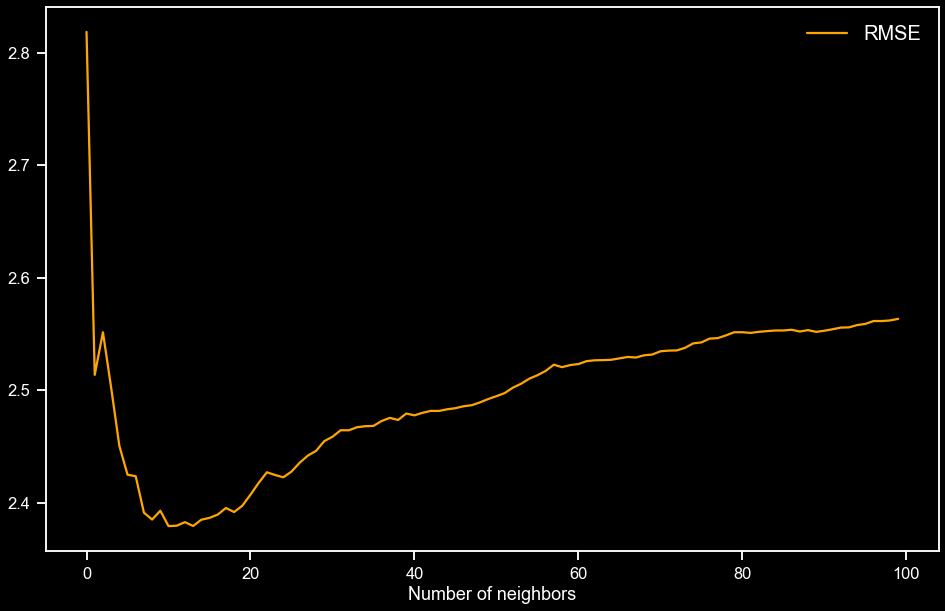

In [92]:
curve = pd.DataFrame(rmse_val)  
curve.plot(figsize=(16,10), color="orange", xlabel = "Number of neighbors")
plt.legend(['RMSE'],fontsize=20)

In [93]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,Ytrain)
model.best_params_

{'n_neighbors': 9}

In [94]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 9)
knn.fit(x_train, Ytrain)
pred=knn.predict(x_test)
estimation = pd.DataFrame({'pred':exp(pred), 'test':exp(Ytest)})
compute_rmse(pred, Ytest)

2.3912724080436973

In [95]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

rmse_val = []
for k in range(30):
    k = k+1
    sfs1 = sfs(knn,
           k_features=k,
           forward=True,
           scoring="max_error",
           cv=10)
    sfs1 = sfs1.fit(x_train, Ytrain)
    feat_cols = list(sfs1.k_feature_idx_)
    knn.fit(x_train.iloc[:, feat_cols], Ytrain)
    pred=knn.predict(x_test.iloc[:, feat_cols])
    error = compute_rmse(pred, Ytest)
    rmse_val.append(error)
    print(k)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


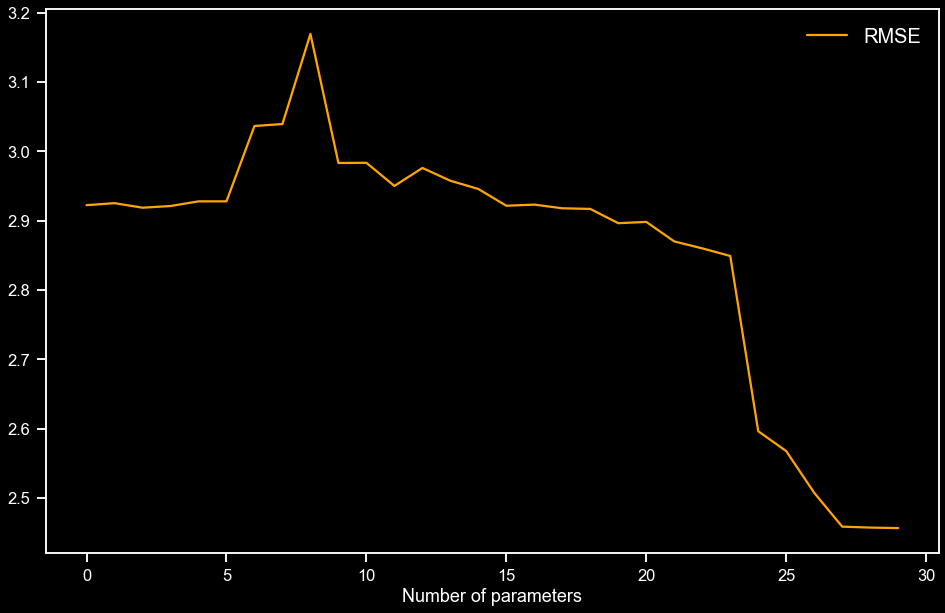

In [96]:
curve = pd.DataFrame(rmse_val)  
curve.plot(figsize=(16,10), color="orange", xlabel = "Number of parameters")
plt.legend(['RMSE'],fontsize=20)

# MLP processes

The reason why **ReLU** became more adopted is that it allows better optimization using Stochastic Gradient Descent, more efficient computation and is scale-invariant, meaning, its characteristics are not affected by the scale of the input. **BERT** is a method of pretraining language representations that was used to create models that **NLP** practicioners can then download and use for free. You can either use these models to extract high quality language features from your text data, or you can fine-tune these models on a specific task (classification, entity recognition, question answering, etc.) with your own data to produce state of the art predictions. These vectors are used as high-quality feature inputs to downstream models. **BERT** produces word representations that are dynamically informed by the words around them.

In [309]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [365]:
var0 = np.concatenate((x_train_scaled,x_test_scaled),axis=0)
len(var0)

3628

In [366]:
dataNN = dataindependent2.copy()
target = dataNN.Log_Revenue.to_numpy()

In [367]:
emb1 = []
text = pd.DataFrame(data["text_embeddings"])
for i in range(3628):
    emb1.append(literal_eval(text["text_embeddings"].iloc[i]))
emb1 = np.array(emb1)
emb2 = []
img = pd.DataFrame(data["img_embeddings"])
for i in range(3628):
    emb2.append(literal_eval(img  ["img_embeddings"].iloc[i]))
emb2 = np.array(emb2)

In [368]:
def reduce_dimensions_pca(vectors, dimensions=50):
    reduced_vectors = PCA(n_components=dimensions).fit_transform(vectors)
    return reduced_vectors
emb1 = reduce_dimensions_pca(emb1)
emb2 = reduce_dimensions_pca(emb2)

In [373]:
inp_emb_data1 = keras.layers.Input(shape=(emb1.shape[1],), name='Input_embedding_text')
inp_emb_data2 = keras.layers.Input(shape=(emb2.shape[1],), name='Input_embedding_img')
inp_num_data = keras.layers.Input(shape=(var0.shape[1],), name = 'Input_var')

In [381]:
flatten = keras.layers.Flatten(name = 'flatten_text')(inp_emb_data1)
flatten2 = keras.layers.Flatten(name = 'flatten_img')(inp_emb_data2)
densevar = keras.layers.Dense(20,activation=tf.nn.relu, name = 'ReLu1')(inp_num_data)
conc = keras.layers.Concatenate()([flatten, densevar])
conc2 = keras.layers.Concatenate()([flatten2, conc])
dense1 = keras.layers.Dense(50, activation=tf.nn.relu, name = 'ReLu2')(conc2)
out = keras.layers.Dense(1, activation=tf.nn.relu, name = 'ReLu3')(dense1)
model = keras.Model(inputs=[inp_emb_data1,inp_emb_data2, inp_num_data], outputs=out)
model.compile(optimizer=tf.optimizers.Adam(0.01),
              loss=keras.losses.mean_squared_error,
              metrics=[keras.metrics.mean_squared_error])
print(model.summary())

Model: "model_56"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_embedding_text (InputLay  [(None, 50)]        0           []                               
 er)                                                                                              
                                                                                                  
 Input_var (InputLayer)         [(None, 38)]         0           []                               
                                                                                                  
 Input_embedding_img (InputLaye  [(None, 50)]        0           []                               
 r)                                                                                               
                                                                                           

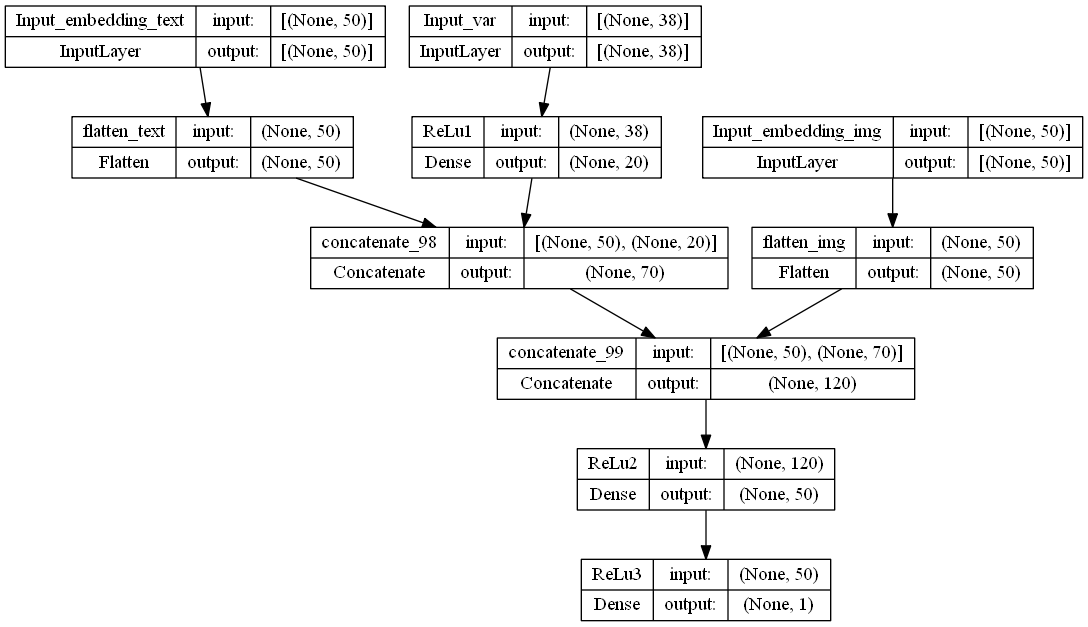

In [382]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TR",
    expand_nested=False,
    dpi=96, 
    layer_range=None,
    show_layer_activations=False,
)


In [327]:
pip install plot_model

Note: you may need to restart the kernel to use updated packages.


In [383]:
history = model.fit([emb1,emb2, var0], target,validation_split=0.1, epochs=200, batch_size=20000,shuffle=True, verbose=1)

Epoch 1/200
1/1 [==============================] - 1s 569ms/step - loss: 190.4717 - mean_squared_error: 190.4717 - val_loss: 177.6034 - val_mean_squared_error: 177.6034
Epoch 2/200
1/1 [==============================] - 0s 26ms/step - loss: 177.1787 - mean_squared_error: 177.1787 - val_loss: 162.0310 - val_mean_squared_error: 162.0310
Epoch 3/200
1/1 [==============================] - 0s 25ms/step - loss: 160.9765 - mean_squared_error: 160.9765 - val_loss: 144.6761 - val_mean_squared_error: 144.6761
Epoch 4/200
1/1 [==============================] - 0s 27ms/step - loss: 143.0808 - mean_squared_error: 143.0808 - val_loss: 126.1074 - val_mean_squared_error: 126.1074
Epoch 5/200
1/1 [==============================] - 0s 27ms/step - loss: 124.0485 - mean_squared_error: 124.0485 - val_loss: 107.0588 - val_mean_squared_error: 107.0588
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 104.4026 - mean_squared_error: 104.4026 - val_loss: 87.8120 - val_mean_squared_error: 8

Epoch 51/200
1/1 [==============================] - 0s 23ms/step - loss: 9.4586 - mean_squared_error: 9.4586 - val_loss: 11.2159 - val_mean_squared_error: 11.2159
Epoch 52/200
1/1 [==============================] - 0s 24ms/step - loss: 9.4000 - mean_squared_error: 9.4000 - val_loss: 11.2109 - val_mean_squared_error: 11.2109
Epoch 53/200
1/1 [==============================] - 0s 23ms/step - loss: 9.3152 - mean_squared_error: 9.3152 - val_loss: 11.1806 - val_mean_squared_error: 11.1806
Epoch 54/200
1/1 [==============================] - 0s 23ms/step - loss: 9.2073 - mean_squared_error: 9.2073 - val_loss: 11.1333 - val_mean_squared_error: 11.1333
Epoch 55/200
1/1 [==============================] - 0s 23ms/step - loss: 9.0841 - mean_squared_error: 9.0841 - val_loss: 11.0799 - val_mean_squared_error: 11.0799
Epoch 56/200
1/1 [==============================] - 0s 23ms/step - loss: 8.9572 - mean_squared_error: 8.9572 - val_loss: 11.0310 - val_mean_squared_error: 11.0310
Epoch 57/200
1/1 [====

1/1 [==============================] - 0s 24ms/step - loss: 6.8445 - mean_squared_error: 6.8445 - val_loss: 10.6366 - val_mean_squared_error: 10.6366
Epoch 102/200
1/1 [==============================] - 0s 25ms/step - loss: 6.8113 - mean_squared_error: 6.8113 - val_loss: 10.6380 - val_mean_squared_error: 10.6380
Epoch 103/200
1/1 [==============================] - 0s 24ms/step - loss: 6.7786 - mean_squared_error: 6.7786 - val_loss: 10.6379 - val_mean_squared_error: 10.6379
Epoch 104/200
1/1 [==============================] - 0s 24ms/step - loss: 6.7460 - mean_squared_error: 6.7460 - val_loss: 10.6360 - val_mean_squared_error: 10.6360
Epoch 105/200
1/1 [==============================] - 0s 24ms/step - loss: 6.7133 - mean_squared_error: 6.7133 - val_loss: 10.6320 - val_mean_squared_error: 10.6320
Epoch 106/200
1/1 [==============================] - 0s 25ms/step - loss: 6.6810 - mean_squared_error: 6.6810 - val_loss: 10.6274 - val_mean_squared_error: 10.6274
Epoch 107/200
1/1 [===========

1/1 [==============================] - 0s 25ms/step - loss: 5.4396 - mean_squared_error: 5.4396 - val_loss: 10.5620 - val_mean_squared_error: 10.5620
Epoch 152/200
1/1 [==============================] - 0s 24ms/step - loss: 5.4151 - mean_squared_error: 5.4151 - val_loss: 10.5653 - val_mean_squared_error: 10.5653
Epoch 153/200
1/1 [==============================] - 0s 26ms/step - loss: 5.3911 - mean_squared_error: 5.3911 - val_loss: 10.5687 - val_mean_squared_error: 10.5687
Epoch 154/200
1/1 [==============================] - 0s 23ms/step - loss: 5.3666 - mean_squared_error: 5.3666 - val_loss: 10.5723 - val_mean_squared_error: 10.5723
Epoch 155/200
1/1 [==============================] - 0s 24ms/step - loss: 5.3420 - mean_squared_error: 5.3420 - val_loss: 10.5752 - val_mean_squared_error: 10.5752
Epoch 156/200
1/1 [==============================] - 0s 23ms/step - loss: 5.3174 - mean_squared_error: 5.3174 - val_loss: 10.5786 - val_mean_squared_error: 10.5786
Epoch 157/200
1/1 [===========

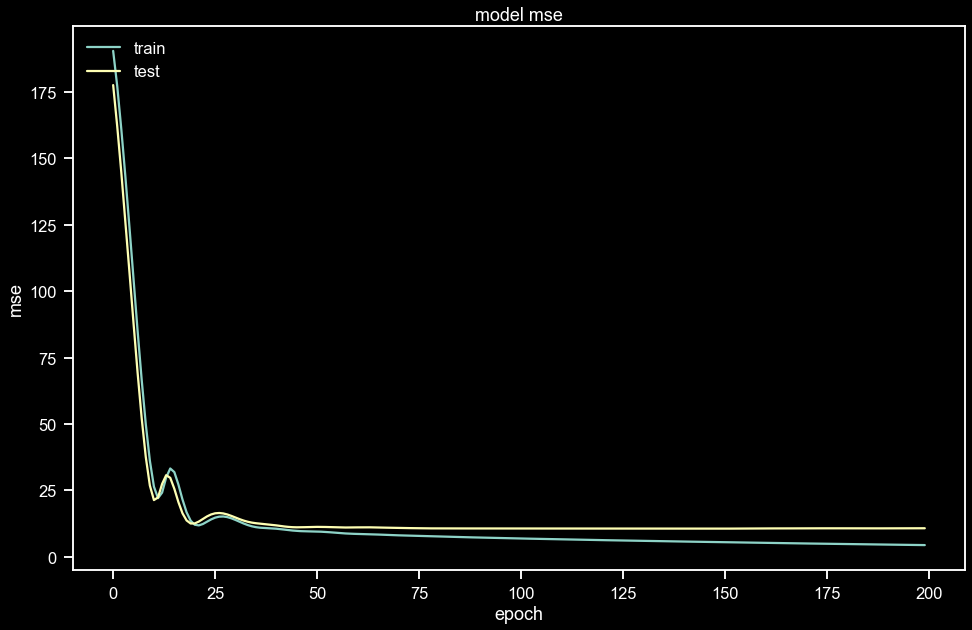

In [384]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





## As the NN does'nt fit well we try to recode categorical features with embedding layers


In [354]:
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) == 1:
         group.append(i)
dataNN = data.replace(group, "Independent")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 40:
         group.append(i)
dataNN = dataNN.replace(group, "Small")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 100:
         group.append(i)
dataNN = dataNN.replace(group, "Middle")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 200:
         group.append(i)
dataNN = dataNN.replace(group, "Leader")
print(dataNN.groupby('studio').apply(len))


studio
Independent     188
Leader         1000
Middle          708
Small          1732
dtype: int64


In [359]:
del dataNN["img_url"]
del dataNN["description"]

In [361]:
dataNN['Revenue'] = np.log(dataNN['Revenue'])
dataNN['n_votes'] = np.log(dataNN['n_votes'])

In [363]:
emb1 = []
text = pd.DataFrame(data["text_embeddings"])
for i in range(3628):
    emb1.append(literal_eval(text["text_embeddings"].iloc[i]))
emb1 = np.array(emb1)
emb2 = []
img = pd.DataFrame(data["img_embeddings"])
for i in range(3628):
    emb2.append(literal_eval(img  ["img_embeddings"].iloc[i]))
emb2 = np.array(emb2)
def reduce_dimensions_pca(vectors, dimensions=50):
    reduced_vectors = PCA(n_components=dimensions).fit_transform(vectors)
    return reduced_vectors
emb1 = reduce_dimensions_pca(emb1)
emb2 = reduce_dimensions_pca(emb2)

In [386]:
x_train_scaled

array([[0.30750738, 0.6375    , 0.80952381, ..., 1.        , 0.        ,
        0.18279036],
       [0.0092886 , 0.4       , 0.85714286, ..., 0.        , 0.        ,
        0.68054812],
       [0.12315594, 0.6       , 0.79047619, ..., 0.        , 0.        ,
        0.61768085],
       ...,
       [0.44792919, 0.65      , 0.83809524, ..., 1.        , 0.        ,
        0.58851913],
       [0.52245656, 0.5       , 0.84761905, ..., 0.        , 0.        ,
        0.33206234],
       [0.15779696, 0.5375    , 0.84761905, ..., 0.        , 0.        ,
        0.13721013]])

# HGBM with reencoding categorical variables comparison

In [387]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

## Gradient boosting estimator with dropped categorical features

In [388]:
dropper = make_column_transformer(
    ("drop", make_column_selector(dtype_include="category")), remainder="passthrough"
)
hist_dropped = make_pipeline(dropper, HistGradientBoostingRegressor(random_state=42))

## Gradient boosting estimator with one-hot encoding


In [390]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist_one_hot = make_pipeline(
    one_hot_encoder, HistGradientBoostingRegressor(random_state=42)
)

## Gradient boosting estimator with ordinal encoding

In [392]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
    # Use short feature names to make it easier to specify the categorical
    # variables in the HistGradientBoostingRegressor in the next step
    # of the pipeline.
    verbose_feature_names_out=False,
)

hist_ordinal = make_pipeline(
    ordinal_encoder, HistGradientBoostingRegressor(random_state=42)
)

## Gradient boosting estimator with native categorical support

In [393]:
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) == 1:
         group.append(i)
dataHGB = data.replace(group, "Independent")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 40:
         group.append(i)
dataHGB = dataHGB.replace(group, "Small")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 100:
         group.append(i)
dataHGB = dataHGB.replace(group, "Middle")
group = []
groups = data.groupby('studio').apply(len)
for i in groups.keys().values:
    if groups.get(i) <= 200:
         group.append(i)
dataHGB = dataHGB.replace(group, "Leader")
print(dataHGB.groupby('studio').apply(len))


NameError: name 'categorical_columns' is not defined

In [402]:
dataHGB['Revenue'] = np.log(dataHGB['Revenue'])
dataHGB['n_votes'] = np.log(dataHGB['n_votes'])

In [407]:
categorical_columns_subset = [
    "production_year",
    "genres",
    "release_year",
    "studio"
]
numerical_columns_subset = [
    "Unnamed: 0",
    "ratings",
    "n_votes",
    "runtime"
]
X = dataHGB[categorical_columns_subset + numerical_columns_subset]

TypeError: unhashable type: 'list'

In [ ]:
hist_native = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42,
        categorical_features=categorical_columns,
    ),
).set_output(transform="pandas")